In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm

%matplotlib inline

import torch
import torchvision

import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
from sklearn import datasets as toy_data
from torch.utils.data import Dataset, DataLoader


In [2]:

true_data = 30
true_class_size = int(true_data/2)
corruption_size = 240
corrupted_class_size = int(corruption_size/8)
noise = 0.0
x1,y1 = toy_data.make_moons(n_samples=true_data,noise =noise)

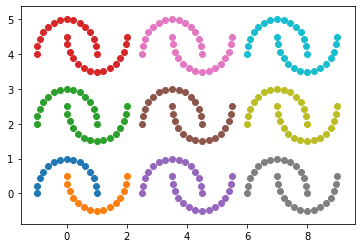

In [3]:
# x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
# x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )




# x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
# x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

# x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

# x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

# x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

# x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

# x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

# x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))



x2,_ = toy_data.make_moons(n_samples=corrupted_class_size) 
x2[:,1] = x2[:,1] + 2

x3,_ = toy_data.make_moons(n_samples=corrupted_class_size) 

x3[:,1] = x3[:,1] + 4


x4,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x4[:,0] = x4[:,0] + 3.5

x5,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x5[:,0] = x5[:,0] + 3.5
x5[:,1] = x5[:,1] + 2

x6,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x6[:,0] = x6[:,0] + 3.5
x6[:,1] = x6[:,1] + 4

x7,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x7[:,0] = x7[:,0] +7

x8,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x8[:,0] = x8[:,0] + 7
x8[:,1] = x8[:,1] + 2

x9,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x9[:,0] = x9[:,0] + 7
x9[:,1] = x9[:,1] + 4

plt.scatter(x1[y1==0,0],x1[y1==0,1])
plt.scatter(x1[y1==1,0],x1[y1==1,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])



In [4]:
# y11  = np.zeros(15)
# y12 = np.ones(15)

Y2_ = []
for i in range(8):
    idx = np.random.randint(0,corrupted_class_size, size = int(corrupted_class_size/2))
    y2 = np.ones(corrupted_class_size)
    y2[idx] = 0 
    Y2_.append(y2)

Y2_ = np.concatenate(Y2_,axis=0)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
X_train = np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9))

Y_train = np.concatenate((y1,Y2_))



In [6]:
X_train.shape,Y_train.shape

((270, 2), (270,))

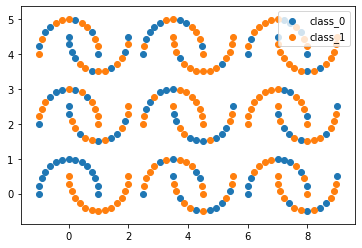

In [7]:
plt.scatter(X_train[Y_train==0,0],X_train[Y_train==0,1],label = "class_0")
plt.scatter(X_train[Y_train==1,0],X_train[Y_train==1,1],label = "class_1")
plt.legend()


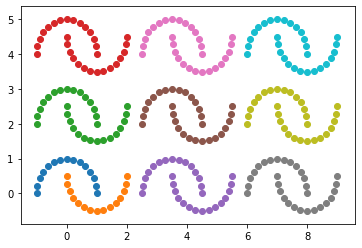

In [8]:
# x11 = np.random.uniform(low=[0,0], high = [0.5,0.5],size =(15,2) )
# x12 = np.random.uniform(low=[0.5,0.5], high = [1,1],size =(15,2) )
xt1,yt1 = toy_data.make_moons(n_samples=true_data)

# x2 = np.random.uniform(low = [0,1.5] , high = [1,2.5],size=(30,2))
# x3 = np.random.uniform(low = [0,3] , high = [1,4],size=(30,2))

# x4 = np.random.uniform(low = [2,0] , high = [3,1],size=(30,2))

# x5 = np.random.uniform(low = [2,1.5] , high = [3,2.5],size=(30,2))

# x6 = np.random.uniform(low = [2,3] , high = [3,4],size=(30,2))

# x7 = np.random.uniform(low = [4,0] , high = [5,1],size=(30,2))

# x8 = np.random.uniform(low = [4,1.5] , high = [5,2.5],size=(30,2))

# x9 = np.random.uniform(low = [4,3] , high = [5,4],size=(30,2))



x2,_ = toy_data.make_moons(n_samples=corrupted_class_size) 
x2[:,1] = x2[:,1] + 2

x3,_ = toy_data.make_moons(n_samples=corrupted_class_size) 

x3[:,1] = x3[:,1] + 4


x4,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x4[:,0] = x4[:,0] + 3.5

x5,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x5[:,0] = x5[:,0] + 3.5
x5[:,1] = x5[:,1] + 2

x6,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x6[:,0] = x6[:,0] + 3.5
x6[:,1] = x6[:,1] + 4

x7,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x7[:,0] = x7[:,0] +7

x8,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x8[:,0] = x8[:,0] + 7
x8[:,1] = x8[:,1] + 2

x9,_ = toy_data.make_moons(n_samples=corrupted_class_size)
x9[:,0] = x9[:,0] + 7
x9[:,1] = x9[:,1] + 4
plt.scatter(xt1[yt1==0,0],xt1[yt1==0,1])
plt.scatter(xt1[yt1==1,0],xt1[yt1==1,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])

plt.scatter(x4[:,0],x4[:,1])
plt.scatter(x5[:,0],x5[:,1])
plt.scatter(x6[:,0],x6[:,1])


plt.scatter(x7[:,0],x7[:,1])
plt.scatter(x8[:,0],x8[:,1])
plt.scatter(x9[:,0],x9[:,1])

# yt11  = np.zeros(15)
# yt12 = np.ones(15)

Yt2_ = []
for i in range(8):
    idx = np.random.randint(0,30,size=15)
    yt2 = np.ones(30)
    yt2[idx] = 0 
    Yt2_.append(yt2)

Yt2_ = np.concatenate(Yt2_,axis=0)
Y_test = np.concatenate((yt1,Yt2_))
X_test = np.concatenate((xt1,x2,x3,x4,x5,x6,x7,x8,x9))

In [9]:
X_test.shape,Y_test.shape

((270, 2), (270,))

In [10]:
class Grid_data(Dataset):
    def __init__(self,x,y):
        self.x = torch.Tensor(x)
        self.y = torch.Tensor(y).type(torch.LongTensor)
    
    def __len__(self):
        
        return len(self.x)
    
    
    def __getitem__(self,idx):
        self.dx = self.x[idx,:]
        self.dy = self.y[idx]
        
        self.dx = self.dx
        self.dy = self.dy
        return self.dx, self.dy
        

In [11]:
trainset = Grid_data(X_train,Y_train)


In [12]:
trainloader = DataLoader(trainset,batch_size=10,shuffle = True)

In [13]:
inputs,label = iter(trainloader).next()

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.linear1 = nn.Linear(2,100)
        self.linear2 = nn.Linear(100,100)
        self.linear3 = nn.Linear(100,200)
        self.linear4 = nn.Linear(200,200)
        self.linear5 = nn.Linear(200,400)
#         self.linear6 = nn.Linear(400,600)
#         self.linear7 = nn.Linear(200,200)
#         self.linear8 = nn.Linear(200,100)
        self.linear9 = nn.Linear(400,2)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        x = F.relu(self.linear5(x))
        #x = F.relu(self.linear6(x))
#         x = F.relu(self.linear7(x))
#         x = F.relu(self.linear8(x))
        x = self.linear9(x)
        
        
        return x

In [15]:
net = Net()
# net(inputs)


In [16]:
net = net.to("cuda")

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)#, momentum=0.9)

In [18]:
loss_curi = []
epochs_nos = 10000
for epoch in range(epochs_nos): # loop over the dataset multiple times
    ep_lossi = []
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to("cuda"),labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/2 ))
            ep_lossi.append(running_loss/2) # loss per minibatch
            running_loss = 0.0
    if(np.mean(ep_lossi) <= 0.05):
        break
    loss_curi.append(np.mean(ep_lossi))   #loss per epoch
#     if (epoch%5 == 0):
#         _,actis= inc(inputs)
#         acti.append(actis)
    
            

print('Finished Training')

[1,     2] loss: 0.714
[1,     4] loss: 0.683
[1,     6] loss: 0.672
[1,     8] loss: 0.702
[1,    10] loss: 0.713
[1,    12] loss: 0.711
[1,    14] loss: 0.690
[1,    16] loss: 0.689
[1,    18] loss: 0.680
[1,    20] loss: 0.698
[1,    22] loss: 0.675
[1,    24] loss: 0.672
[1,    26] loss: 0.591
[2,     2] loss: 0.485
[2,     4] loss: 0.724
[2,     6] loss: 0.711
[2,     8] loss: 0.800
[2,    10] loss: 0.635
[2,    12] loss: 0.662
[2,    14] loss: 0.698
[2,    16] loss: 0.681
[2,    18] loss: 0.693
[2,    20] loss: 0.666
[2,    22] loss: 0.673
[2,    24] loss: 0.702
[2,    26] loss: 0.673
[3,     2] loss: 0.694
[3,     4] loss: 0.660
[3,     6] loss: 0.716
[3,     8] loss: 0.686
[3,    10] loss: 0.637
[3,    12] loss: 0.693
[3,    14] loss: 0.664
[3,    16] loss: 0.680
[3,    18] loss: 0.698
[3,    20] loss: 0.642
[3,    22] loss: 0.635
[3,    24] loss: 0.638
[3,    26] loss: 0.541
[4,     2] loss: 0.749
[4,     4] loss: 0.744
[4,     6] loss: 0.700
[4,     8] loss: 0.731
[4,    10] 

[28,    10] loss: 0.571
[28,    12] loss: 0.636
[28,    14] loss: 0.508
[28,    16] loss: 0.533
[28,    18] loss: 0.620
[28,    20] loss: 0.518
[28,    22] loss: 0.670
[28,    24] loss: 0.742
[28,    26] loss: 0.555
[29,     2] loss: 0.585
[29,     4] loss: 0.552
[29,     6] loss: 0.737
[29,     8] loss: 0.459
[29,    10] loss: 0.662
[29,    12] loss: 0.496
[29,    14] loss: 0.674
[29,    16] loss: 0.537
[29,    18] loss: 0.676
[29,    20] loss: 0.477
[29,    22] loss: 0.637
[29,    24] loss: 0.692
[29,    26] loss: 0.545
[30,     2] loss: 0.559
[30,     4] loss: 0.612
[30,     6] loss: 0.650
[30,     8] loss: 0.571
[30,    10] loss: 0.532
[30,    12] loss: 0.606
[30,    14] loss: 0.625
[30,    16] loss: 0.472
[30,    18] loss: 0.678
[30,    20] loss: 0.676
[30,    22] loss: 0.507
[30,    24] loss: 0.590
[30,    26] loss: 0.609
[31,     2] loss: 0.715
[31,     4] loss: 0.589
[31,     6] loss: 0.625
[31,     8] loss: 0.537
[31,    10] loss: 0.558
[31,    12] loss: 0.566
[31,    14] loss

[55,    22] loss: 0.784
[55,    24] loss: 0.639
[55,    26] loss: 0.572
[56,     2] loss: 0.477
[56,     4] loss: 0.601
[56,     6] loss: 0.581
[56,     8] loss: 0.510
[56,    10] loss: 0.527
[56,    12] loss: 0.638
[56,    14] loss: 0.482
[56,    16] loss: 0.804
[56,    18] loss: 0.612
[56,    20] loss: 0.693
[56,    22] loss: 0.524
[56,    24] loss: 0.570
[56,    26] loss: 0.582
[57,     2] loss: 0.599
[57,     4] loss: 0.514
[57,     6] loss: 0.565
[57,     8] loss: 0.473
[57,    10] loss: 0.518
[57,    12] loss: 0.431
[57,    14] loss: 0.613
[57,    16] loss: 0.833
[57,    18] loss: 0.551
[57,    20] loss: 0.632
[57,    22] loss: 0.650
[57,    24] loss: 0.609
[57,    26] loss: 0.663
[58,     2] loss: 0.601
[58,     4] loss: 0.579
[58,     6] loss: 0.670
[58,     8] loss: 0.547
[58,    10] loss: 0.501
[58,    12] loss: 0.636
[58,    14] loss: 0.627
[58,    16] loss: 0.629
[58,    18] loss: 0.542
[58,    20] loss: 0.579
[58,    22] loss: 0.559
[58,    24] loss: 0.582
[58,    26] loss

[84,    24] loss: 0.575
[84,    26] loss: 0.516
[85,     2] loss: 0.618
[85,     4] loss: 0.560
[85,     6] loss: 0.507
[85,     8] loss: 0.605
[85,    10] loss: 0.465
[85,    12] loss: 0.519
[85,    14] loss: 0.496
[85,    16] loss: 0.670
[85,    18] loss: 0.664
[85,    20] loss: 0.455
[85,    22] loss: 0.498
[85,    24] loss: 0.822
[85,    26] loss: 0.619
[86,     2] loss: 0.517
[86,     4] loss: 0.544
[86,     6] loss: 0.677
[86,     8] loss: 0.615
[86,    10] loss: 0.475
[86,    12] loss: 0.683
[86,    14] loss: 0.684
[86,    16] loss: 0.526
[86,    18] loss: 0.490
[86,    20] loss: 0.515
[86,    22] loss: 0.540
[86,    24] loss: 0.661
[86,    26] loss: 0.552
[87,     2] loss: 0.634
[87,     4] loss: 0.675
[87,     6] loss: 0.562
[87,     8] loss: 0.608
[87,    10] loss: 0.570
[87,    12] loss: 0.572
[87,    14] loss: 0.457
[87,    16] loss: 0.602
[87,    18] loss: 0.446
[87,    20] loss: 0.617
[87,    22] loss: 0.716
[87,    24] loss: 0.692
[87,    26] loss: 0.631
[88,     2] loss

[112,    22] loss: 0.563
[112,    24] loss: 0.497
[112,    26] loss: 0.686
[113,     2] loss: 0.603
[113,     4] loss: 0.699
[113,     6] loss: 0.578
[113,     8] loss: 0.669
[113,    10] loss: 0.403
[113,    12] loss: 0.484
[113,    14] loss: 0.589
[113,    16] loss: 0.551
[113,    18] loss: 0.669
[113,    20] loss: 0.577
[113,    22] loss: 0.450
[113,    24] loss: 0.609
[113,    26] loss: 0.493
[114,     2] loss: 0.543
[114,     4] loss: 0.597
[114,     6] loss: 0.590
[114,     8] loss: 0.473
[114,    10] loss: 0.638
[114,    12] loss: 0.645
[114,    14] loss: 0.573
[114,    16] loss: 0.538
[114,    18] loss: 0.484
[114,    20] loss: 0.614
[114,    22] loss: 0.652
[114,    24] loss: 0.519
[114,    26] loss: 0.535
[115,     2] loss: 0.477
[115,     4] loss: 0.608
[115,     6] loss: 0.625
[115,     8] loss: 0.506
[115,    10] loss: 0.690
[115,    12] loss: 0.556
[115,    14] loss: 0.618
[115,    16] loss: 0.530
[115,    18] loss: 0.484
[115,    20] loss: 0.445
[115,    22] loss: 0.620


[140,    14] loss: 0.533
[140,    16] loss: 0.587
[140,    18] loss: 0.742
[140,    20] loss: 0.482
[140,    22] loss: 0.552
[140,    24] loss: 0.461
[140,    26] loss: 0.592
[141,     2] loss: 0.479
[141,     4] loss: 0.605
[141,     6] loss: 0.552
[141,     8] loss: 0.528
[141,    10] loss: 0.540
[141,    12] loss: 0.693
[141,    14] loss: 0.610
[141,    16] loss: 0.594
[141,    18] loss: 0.523
[141,    20] loss: 0.622
[141,    22] loss: 0.503
[141,    24] loss: 0.573
[141,    26] loss: 0.619
[142,     2] loss: 0.592
[142,     4] loss: 0.555
[142,     6] loss: 0.577
[142,     8] loss: 0.555
[142,    10] loss: 0.603
[142,    12] loss: 0.648
[142,    14] loss: 0.439
[142,    16] loss: 0.527
[142,    18] loss: 0.513
[142,    20] loss: 0.613
[142,    22] loss: 0.512
[142,    24] loss: 0.665
[142,    26] loss: 0.538
[143,     2] loss: 0.553
[143,     4] loss: 0.599
[143,     6] loss: 0.590
[143,     8] loss: 0.544
[143,    10] loss: 0.655
[143,    12] loss: 0.525
[143,    14] loss: 0.543


[167,    22] loss: 0.777
[167,    24] loss: 0.565
[167,    26] loss: 0.383
[168,     2] loss: 0.606
[168,     4] loss: 0.689
[168,     6] loss: 0.498
[168,     8] loss: 0.507
[168,    10] loss: 0.420
[168,    12] loss: 0.586
[168,    14] loss: 0.512
[168,    16] loss: 0.646
[168,    18] loss: 0.598
[168,    20] loss: 0.449
[168,    22] loss: 0.608
[168,    24] loss: 0.613
[168,    26] loss: 0.441
[169,     2] loss: 0.597
[169,     4] loss: 0.646
[169,     6] loss: 0.459
[169,     8] loss: 0.501
[169,    10] loss: 0.546
[169,    12] loss: 0.562
[169,    14] loss: 0.513
[169,    16] loss: 0.549
[169,    18] loss: 0.555
[169,    20] loss: 0.683
[169,    22] loss: 0.450
[169,    24] loss: 0.572
[169,    26] loss: 0.560
[170,     2] loss: 0.667
[170,     4] loss: 0.565
[170,     6] loss: 0.681
[170,     8] loss: 0.522
[170,    10] loss: 0.602
[170,    12] loss: 0.483
[170,    14] loss: 0.646
[170,    16] loss: 0.437
[170,    18] loss: 0.566
[170,    20] loss: 0.476
[170,    22] loss: 0.589


[195,    12] loss: 0.499
[195,    14] loss: 0.573
[195,    16] loss: 0.598
[195,    18] loss: 0.625
[195,    20] loss: 0.462
[195,    22] loss: 0.753
[195,    24] loss: 0.461
[195,    26] loss: 0.735
[196,     2] loss: 0.583
[196,     4] loss: 0.547
[196,     6] loss: 1.056
[196,     8] loss: 0.459
[196,    10] loss: 0.544
[196,    12] loss: 0.605
[196,    14] loss: 0.556
[196,    16] loss: 0.613
[196,    18] loss: 1.062
[196,    20] loss: 1.255
[196,    22] loss: 0.564
[196,    24] loss: 0.568
[196,    26] loss: 0.699
[197,     2] loss: 0.613
[197,     4] loss: 0.668
[197,     6] loss: 0.435
[197,     8] loss: 0.476
[197,    10] loss: 0.548
[197,    12] loss: 0.523
[197,    14] loss: 0.800
[197,    16] loss: 0.541
[197,    18] loss: 0.430
[197,    20] loss: 0.527
[197,    22] loss: 0.581
[197,    24] loss: 0.586
[197,    26] loss: 0.636
[198,     2] loss: 0.842
[198,     4] loss: 0.615
[198,     6] loss: 0.553
[198,     8] loss: 0.516
[198,    10] loss: 0.543
[198,    12] loss: 0.530


[222,    24] loss: 0.592
[222,    26] loss: 0.479
[223,     2] loss: 0.478
[223,     4] loss: 0.475
[223,     6] loss: 0.522
[223,     8] loss: 0.524
[223,    10] loss: 0.535
[223,    12] loss: 0.574
[223,    14] loss: 0.602
[223,    16] loss: 0.669
[223,    18] loss: 0.431
[223,    20] loss: 0.960
[223,    22] loss: 0.520
[223,    24] loss: 0.519
[223,    26] loss: 0.546
[224,     2] loss: 0.543
[224,     4] loss: 0.415
[224,     6] loss: 0.568
[224,     8] loss: 0.634
[224,    10] loss: 0.769
[224,    12] loss: 0.524
[224,    14] loss: 0.485
[224,    16] loss: 0.647
[224,    18] loss: 0.447
[224,    20] loss: 0.612
[224,    22] loss: 0.753
[224,    24] loss: 0.621
[224,    26] loss: 0.615
[225,     2] loss: 0.595
[225,     4] loss: 0.517
[225,     6] loss: 0.477
[225,     8] loss: 0.579
[225,    10] loss: 0.645
[225,    12] loss: 0.561
[225,    14] loss: 0.655
[225,    16] loss: 0.527
[225,    18] loss: 0.546
[225,    20] loss: 0.650
[225,    22] loss: 0.381
[225,    24] loss: 0.554


[249,    26] loss: 0.639
[250,     2] loss: 0.467
[250,     4] loss: 0.553
[250,     6] loss: 0.482
[250,     8] loss: 0.546
[250,    10] loss: 0.551
[250,    12] loss: 0.703
[250,    14] loss: 0.635
[250,    16] loss: 0.516
[250,    18] loss: 0.380
[250,    20] loss: 0.560
[250,    22] loss: 0.652
[250,    24] loss: 0.494
[250,    26] loss: 0.567
[251,     2] loss: 0.399
[251,     4] loss: 0.454
[251,     6] loss: 0.563
[251,     8] loss: 0.569
[251,    10] loss: 0.575
[251,    12] loss: 0.572
[251,    14] loss: 0.464
[251,    16] loss: 0.572
[251,    18] loss: 0.641
[251,    20] loss: 0.509
[251,    22] loss: 0.611
[251,    24] loss: 0.630
[251,    26] loss: 0.481
[252,     2] loss: 0.423
[252,     4] loss: 0.532
[252,     6] loss: 0.611
[252,     8] loss: 0.553
[252,    10] loss: 0.591
[252,    12] loss: 0.398
[252,    14] loss: 0.468
[252,    16] loss: 0.517
[252,    18] loss: 0.588
[252,    20] loss: 0.636
[252,    22] loss: 0.543
[252,    24] loss: 0.573
[252,    26] loss: 0.577


[276,    26] loss: 0.478
[277,     2] loss: 0.550
[277,     4] loss: 0.548
[277,     6] loss: 0.433
[277,     8] loss: 0.609
[277,    10] loss: 0.710
[277,    12] loss: 0.476
[277,    14] loss: 0.431
[277,    16] loss: 0.428
[277,    18] loss: 0.544
[277,    20] loss: 0.440
[277,    22] loss: 0.395
[277,    24] loss: 0.652
[277,    26] loss: 0.619
[278,     2] loss: 0.543
[278,     4] loss: 0.490
[278,     6] loss: 0.438
[278,     8] loss: 0.585
[278,    10] loss: 0.658
[278,    12] loss: 0.581
[278,    14] loss: 0.551
[278,    16] loss: 0.674
[278,    18] loss: 0.454
[278,    20] loss: 0.635
[278,    22] loss: 0.505
[278,    24] loss: 0.646
[278,    26] loss: 0.621
[279,     2] loss: 0.532
[279,     4] loss: 0.558
[279,     6] loss: 0.539
[279,     8] loss: 0.590
[279,    10] loss: 0.505
[279,    12] loss: 0.714
[279,    14] loss: 0.496
[279,    16] loss: 0.607
[279,    18] loss: 0.418
[279,    20] loss: 0.629
[279,    22] loss: 0.491
[279,    24] loss: 0.501
[279,    26] loss: 0.554


[303,    26] loss: 0.506
[304,     2] loss: 0.500
[304,     4] loss: 0.417
[304,     6] loss: 0.717
[304,     8] loss: 0.537
[304,    10] loss: 0.573
[304,    12] loss: 0.446
[304,    14] loss: 0.526
[304,    16] loss: 0.636
[304,    18] loss: 0.537
[304,    20] loss: 0.398
[304,    22] loss: 0.514
[304,    24] loss: 0.396
[304,    26] loss: 0.605
[305,     2] loss: 0.399
[305,     4] loss: 0.545
[305,     6] loss: 0.564
[305,     8] loss: 0.647
[305,    10] loss: 0.754
[305,    12] loss: 0.457
[305,    14] loss: 0.476
[305,    16] loss: 0.534
[305,    18] loss: 0.519
[305,    20] loss: 0.452
[305,    22] loss: 0.440
[305,    24] loss: 0.456
[305,    26] loss: 0.581
[306,     2] loss: 0.570
[306,     4] loss: 0.388
[306,     6] loss: 0.466
[306,     8] loss: 0.634
[306,    10] loss: 0.564
[306,    12] loss: 0.614
[306,    14] loss: 0.428
[306,    16] loss: 0.620
[306,    18] loss: 0.445
[306,    20] loss: 0.375
[306,    22] loss: 0.483
[306,    24] loss: 0.676
[306,    26] loss: 0.566


[330,    22] loss: 0.440
[330,    24] loss: 0.597
[330,    26] loss: 0.437
[331,     2] loss: 0.433
[331,     4] loss: 0.391
[331,     6] loss: 0.491
[331,     8] loss: 0.630
[331,    10] loss: 0.353
[331,    12] loss: 0.404
[331,    14] loss: 0.446
[331,    16] loss: 0.752
[331,    18] loss: 0.647
[331,    20] loss: 0.594
[331,    22] loss: 0.535
[331,    24] loss: 0.438
[331,    26] loss: 0.585
[332,     2] loss: 0.477
[332,     4] loss: 0.553
[332,     6] loss: 0.511
[332,     8] loss: 0.572
[332,    10] loss: 0.594
[332,    12] loss: 0.631
[332,    14] loss: 0.603
[332,    16] loss: 0.472
[332,    18] loss: 0.620
[332,    20] loss: 0.404
[332,    22] loss: 0.551
[332,    24] loss: 0.516
[332,    26] loss: 0.463
[333,     2] loss: 0.823
[333,     4] loss: 0.467
[333,     6] loss: 0.536
[333,     8] loss: 0.410
[333,    10] loss: 0.311
[333,    12] loss: 0.618
[333,    14] loss: 0.479
[333,    16] loss: 0.479
[333,    18] loss: 0.557
[333,    20] loss: 0.641
[333,    22] loss: 0.575


[358,     6] loss: 0.483
[358,     8] loss: 0.495
[358,    10] loss: 0.497
[358,    12] loss: 0.589
[358,    14] loss: 0.556
[358,    16] loss: 0.473
[358,    18] loss: 0.634
[358,    20] loss: 0.513
[358,    22] loss: 0.635
[358,    24] loss: 0.390
[358,    26] loss: 0.506
[359,     2] loss: 0.429
[359,     4] loss: 0.491
[359,     6] loss: 0.562
[359,     8] loss: 0.469
[359,    10] loss: 0.562
[359,    12] loss: 0.495
[359,    14] loss: 0.500
[359,    16] loss: 0.500
[359,    18] loss: 0.466
[359,    20] loss: 0.621
[359,    22] loss: 0.533
[359,    24] loss: 0.472
[359,    26] loss: 0.595
[360,     2] loss: 0.475
[360,     4] loss: 0.469
[360,     6] loss: 0.586
[360,     8] loss: 0.506
[360,    10] loss: 0.586
[360,    12] loss: 0.569
[360,    14] loss: 0.429
[360,    16] loss: 0.500
[360,    18] loss: 0.498
[360,    20] loss: 0.491
[360,    22] loss: 0.486
[360,    24] loss: 0.450
[360,    26] loss: 0.569
[361,     2] loss: 0.431
[361,     4] loss: 0.496
[361,     6] loss: 0.631


[385,    24] loss: 0.533
[385,    26] loss: 0.538
[386,     2] loss: 0.644
[386,     4] loss: 0.419
[386,     6] loss: 0.750
[386,     8] loss: 0.500
[386,    10] loss: 0.736
[386,    12] loss: 0.540
[386,    14] loss: 0.567
[386,    16] loss: 0.549
[386,    18] loss: 0.479
[386,    20] loss: 0.639
[386,    22] loss: 0.550
[386,    24] loss: 0.506
[386,    26] loss: 0.433
[387,     2] loss: 0.415
[387,     4] loss: 0.527
[387,     6] loss: 0.624
[387,     8] loss: 0.423
[387,    10] loss: 0.509
[387,    12] loss: 0.685
[387,    14] loss: 0.531
[387,    16] loss: 0.451
[387,    18] loss: 0.582
[387,    20] loss: 0.561
[387,    22] loss: 0.531
[387,    24] loss: 0.479
[387,    26] loss: 0.502
[388,     2] loss: 0.448
[388,     4] loss: 0.527
[388,     6] loss: 0.577
[388,     8] loss: 0.545
[388,    10] loss: 0.438
[388,    12] loss: 0.621
[388,    14] loss: 0.438
[388,    16] loss: 0.594
[388,    18] loss: 0.560
[388,    20] loss: 0.510
[388,    22] loss: 0.461
[388,    24] loss: 0.496


[412,    18] loss: 0.580
[412,    20] loss: 0.595
[412,    22] loss: 0.623
[412,    24] loss: 0.552
[412,    26] loss: 0.377
[413,     2] loss: 0.568
[413,     4] loss: 0.407
[413,     6] loss: 0.632
[413,     8] loss: 0.535
[413,    10] loss: 0.520
[413,    12] loss: 0.468
[413,    14] loss: 0.376
[413,    16] loss: 0.528
[413,    18] loss: 0.503
[413,    20] loss: 0.564
[413,    22] loss: 0.498
[413,    24] loss: 0.451
[413,    26] loss: 0.606
[414,     2] loss: 0.597
[414,     4] loss: 0.593
[414,     6] loss: 0.475
[414,     8] loss: 0.296
[414,    10] loss: 0.526
[414,    12] loss: 0.535
[414,    14] loss: 0.500
[414,    16] loss: 0.592
[414,    18] loss: 0.556
[414,    20] loss: 0.611
[414,    22] loss: 0.296
[414,    24] loss: 0.770
[414,    26] loss: 0.579
[415,     2] loss: 0.626
[415,     4] loss: 0.577
[415,     6] loss: 0.535
[415,     8] loss: 0.416
[415,    10] loss: 0.475
[415,    12] loss: 0.620
[415,    14] loss: 0.452
[415,    16] loss: 0.483
[415,    18] loss: 0.453


[439,    26] loss: 0.557
[440,     2] loss: 0.342
[440,     4] loss: 0.358
[440,     6] loss: 0.397
[440,     8] loss: 0.443
[440,    10] loss: 0.379
[440,    12] loss: 0.358
[440,    14] loss: 0.683
[440,    16] loss: 0.417
[440,    18] loss: 0.769
[440,    20] loss: 0.371
[440,    22] loss: 0.627
[440,    24] loss: 0.405
[440,    26] loss: 0.667
[441,     2] loss: 0.474
[441,     4] loss: 0.518
[441,     6] loss: 0.428
[441,     8] loss: 0.591
[441,    10] loss: 0.406
[441,    12] loss: 0.374
[441,    14] loss: 0.552
[441,    16] loss: 0.477
[441,    18] loss: 0.432
[441,    20] loss: 0.527
[441,    22] loss: 0.459
[441,    24] loss: 0.490
[441,    26] loss: 0.512
[442,     2] loss: 0.442
[442,     4] loss: 0.409
[442,     6] loss: 0.383
[442,     8] loss: 0.493
[442,    10] loss: 0.516
[442,    12] loss: 0.657
[442,    14] loss: 0.545
[442,    16] loss: 0.512
[442,    18] loss: 0.377
[442,    20] loss: 0.525
[442,    22] loss: 0.449
[442,    24] loss: 0.474
[442,    26] loss: 0.382


[466,    22] loss: 0.383
[466,    24] loss: 0.482
[466,    26] loss: 0.491
[467,     2] loss: 0.530
[467,     4] loss: 0.389
[467,     6] loss: 0.617
[467,     8] loss: 0.172
[467,    10] loss: 0.460
[467,    12] loss: 0.418
[467,    14] loss: 0.408
[467,    16] loss: 0.404
[467,    18] loss: 0.468
[467,    20] loss: 0.550
[467,    22] loss: 0.470
[467,    24] loss: 0.459
[467,    26] loss: 0.471
[468,     2] loss: 0.356
[468,     4] loss: 0.571
[468,     6] loss: 0.396
[468,     8] loss: 0.379
[468,    10] loss: 0.339
[468,    12] loss: 0.451
[468,    14] loss: 0.515
[468,    16] loss: 0.351
[468,    18] loss: 0.589
[468,    20] loss: 0.744
[468,    22] loss: 0.285
[468,    24] loss: 0.391
[468,    26] loss: 0.570
[469,     2] loss: 0.526
[469,     4] loss: 0.389
[469,     6] loss: 0.383
[469,     8] loss: 0.543
[469,    10] loss: 0.328
[469,    12] loss: 0.410
[469,    14] loss: 0.347
[469,    16] loss: 0.442
[469,    18] loss: 0.503
[469,    20] loss: 0.402
[469,    22] loss: 0.464


[494,    10] loss: 0.366
[494,    12] loss: 0.444
[494,    14] loss: 0.465
[494,    16] loss: 0.530
[494,    18] loss: 0.512
[494,    20] loss: 0.495
[494,    22] loss: 0.363
[494,    24] loss: 0.661
[494,    26] loss: 0.391
[495,     2] loss: 0.333
[495,     4] loss: 0.358
[495,     6] loss: 0.648
[495,     8] loss: 0.295
[495,    10] loss: 0.463
[495,    12] loss: 0.410
[495,    14] loss: 0.381
[495,    16] loss: 0.422
[495,    18] loss: 0.588
[495,    20] loss: 0.351
[495,    22] loss: 0.464
[495,    24] loss: 0.574
[495,    26] loss: 0.476
[496,     2] loss: 0.322
[496,     4] loss: 0.569
[496,     6] loss: 0.462
[496,     8] loss: 0.493
[496,    10] loss: 0.558
[496,    12] loss: 0.444
[496,    14] loss: 0.545
[496,    16] loss: 0.349
[496,    18] loss: 0.431
[496,    20] loss: 0.556
[496,    22] loss: 0.438
[496,    24] loss: 0.503
[496,    26] loss: 0.453
[497,     2] loss: 0.625
[497,     4] loss: 0.505
[497,     6] loss: 0.572
[497,     8] loss: 0.449
[497,    10] loss: 0.243


[521,    20] loss: 0.478
[521,    22] loss: 0.365
[521,    24] loss: 0.467
[521,    26] loss: 0.558
[522,     2] loss: 0.365
[522,     4] loss: 0.327
[522,     6] loss: 0.465
[522,     8] loss: 0.486
[522,    10] loss: 0.559
[522,    12] loss: 0.371
[522,    14] loss: 0.696
[522,    16] loss: 0.371
[522,    18] loss: 0.417
[522,    20] loss: 0.461
[522,    22] loss: 0.496
[522,    24] loss: 0.448
[522,    26] loss: 0.613
[523,     2] loss: 0.589
[523,     4] loss: 0.475
[523,     6] loss: 0.392
[523,     8] loss: 0.504
[523,    10] loss: 0.540
[523,    12] loss: 0.300
[523,    14] loss: 0.414
[523,    16] loss: 0.455
[523,    18] loss: 0.530
[523,    20] loss: 0.254
[523,    22] loss: 0.602
[523,    24] loss: 0.321
[523,    26] loss: 0.449
[524,     2] loss: 0.634
[524,     4] loss: 0.454
[524,     6] loss: 0.338
[524,     8] loss: 0.487
[524,    10] loss: 0.359
[524,    12] loss: 0.401
[524,    14] loss: 0.404
[524,    16] loss: 0.476
[524,    18] loss: 0.309
[524,    20] loss: 0.466


[549,    10] loss: 0.435
[549,    12] loss: 0.408
[549,    14] loss: 0.654
[549,    16] loss: 0.260
[549,    18] loss: 0.332
[549,    20] loss: 0.613
[549,    22] loss: 0.492
[549,    24] loss: 0.315
[549,    26] loss: 0.393
[550,     2] loss: 0.339
[550,     4] loss: 0.297
[550,     6] loss: 0.447
[550,     8] loss: 0.438
[550,    10] loss: 0.212
[550,    12] loss: 0.397
[550,    14] loss: 0.455
[550,    16] loss: 0.533
[550,    18] loss: 0.581
[550,    20] loss: 0.577
[550,    22] loss: 0.596
[550,    24] loss: 0.507
[550,    26] loss: 0.589
[551,     2] loss: 0.473
[551,     4] loss: 0.361
[551,     6] loss: 0.583
[551,     8] loss: 0.447
[551,    10] loss: 0.566
[551,    12] loss: 0.336
[551,    14] loss: 0.404
[551,    16] loss: 0.377
[551,    18] loss: 0.474
[551,    20] loss: 0.572
[551,    22] loss: 0.432
[551,    24] loss: 0.910
[551,    26] loss: 0.485
[552,     2] loss: 0.460
[552,     4] loss: 0.537
[552,     6] loss: 0.496
[552,     8] loss: 0.668
[552,    10] loss: 0.364


[576,    24] loss: 0.487
[576,    26] loss: 0.329
[577,     2] loss: 0.468
[577,     4] loss: 0.402
[577,     6] loss: 0.342
[577,     8] loss: 0.472
[577,    10] loss: 0.332
[577,    12] loss: 0.287
[577,    14] loss: 0.478
[577,    16] loss: 0.658
[577,    18] loss: 0.372
[577,    20] loss: 0.494
[577,    22] loss: 0.269
[577,    24] loss: 0.330
[577,    26] loss: 0.596
[578,     2] loss: 0.373
[578,     4] loss: 0.405
[578,     6] loss: 0.398
[578,     8] loss: 0.551
[578,    10] loss: 0.391
[578,    12] loss: 0.335
[578,    14] loss: 0.290
[578,    16] loss: 0.390
[578,    18] loss: 0.401
[578,    20] loss: 0.374
[578,    22] loss: 0.484
[578,    24] loss: 0.515
[578,    26] loss: 0.425
[579,     2] loss: 0.336
[579,     4] loss: 0.279
[579,     6] loss: 0.463
[579,     8] loss: 0.470
[579,    10] loss: 0.382
[579,    12] loss: 0.473
[579,    14] loss: 0.576
[579,    16] loss: 0.327
[579,    18] loss: 0.388
[579,    20] loss: 0.480
[579,    22] loss: 0.275
[579,    24] loss: 0.442


[604,     2] loss: 0.381
[604,     4] loss: 0.373
[604,     6] loss: 0.486
[604,     8] loss: 0.468
[604,    10] loss: 0.430
[604,    12] loss: 0.528
[604,    14] loss: 0.439
[604,    16] loss: 0.421
[604,    18] loss: 0.421
[604,    20] loss: 0.505
[604,    22] loss: 0.405
[604,    24] loss: 0.382
[604,    26] loss: 0.374
[605,     2] loss: 0.422
[605,     4] loss: 0.353
[605,     6] loss: 0.403
[605,     8] loss: 0.466
[605,    10] loss: 0.415
[605,    12] loss: 0.457
[605,    14] loss: 0.649
[605,    16] loss: 0.437
[605,    18] loss: 0.552
[605,    20] loss: 0.477
[605,    22] loss: 0.476
[605,    24] loss: 0.323
[605,    26] loss: 0.407
[606,     2] loss: 0.401
[606,     4] loss: 0.468
[606,     6] loss: 0.276
[606,     8] loss: 0.441
[606,    10] loss: 0.473
[606,    12] loss: 0.302
[606,    14] loss: 0.396
[606,    16] loss: 0.337
[606,    18] loss: 0.471
[606,    20] loss: 0.466
[606,    22] loss: 0.608
[606,    24] loss: 0.652
[606,    26] loss: 0.573
[607,     2] loss: 0.457


[631,    14] loss: 0.455
[631,    16] loss: 0.436
[631,    18] loss: 0.495
[631,    20] loss: 0.440
[631,    22] loss: 0.597
[631,    24] loss: 0.360
[631,    26] loss: 0.563
[632,     2] loss: 0.405
[632,     4] loss: 0.423
[632,     6] loss: 0.372
[632,     8] loss: 0.555
[632,    10] loss: 0.331
[632,    12] loss: 0.457
[632,    14] loss: 0.431
[632,    16] loss: 0.431
[632,    18] loss: 0.396
[632,    20] loss: 0.438
[632,    22] loss: 0.383
[632,    24] loss: 0.413
[632,    26] loss: 0.282
[633,     2] loss: 0.464
[633,     4] loss: 0.202
[633,     6] loss: 0.320
[633,     8] loss: 0.403
[633,    10] loss: 0.359
[633,    12] loss: 0.413
[633,    14] loss: 0.471
[633,    16] loss: 0.292
[633,    18] loss: 0.520
[633,    20] loss: 0.436
[633,    22] loss: 0.307
[633,    24] loss: 0.569
[633,    26] loss: 0.557
[634,     2] loss: 0.408
[634,     4] loss: 0.404
[634,     6] loss: 0.271
[634,     8] loss: 0.324
[634,    10] loss: 0.294
[634,    12] loss: 0.558
[634,    14] loss: 0.382


[659,    12] loss: 0.373
[659,    14] loss: 0.411
[659,    16] loss: 0.504
[659,    18] loss: 0.441
[659,    20] loss: 0.370
[659,    22] loss: 0.602
[659,    24] loss: 0.373
[659,    26] loss: 0.395
[660,     2] loss: 0.343
[660,     4] loss: 0.448
[660,     6] loss: 0.594
[660,     8] loss: 0.333
[660,    10] loss: 0.377
[660,    12] loss: 0.356
[660,    14] loss: 0.493
[660,    16] loss: 0.307
[660,    18] loss: 0.434
[660,    20] loss: 0.381
[660,    22] loss: 0.530
[660,    24] loss: 0.407
[660,    26] loss: 0.329
[661,     2] loss: 0.296
[661,     4] loss: 0.570
[661,     6] loss: 0.397
[661,     8] loss: 0.416
[661,    10] loss: 0.400
[661,    12] loss: 0.443
[661,    14] loss: 0.525
[661,    16] loss: 0.271
[661,    18] loss: 0.239
[661,    20] loss: 0.445
[661,    22] loss: 0.645
[661,    24] loss: 0.149
[661,    26] loss: 0.519
[662,     2] loss: 0.474
[662,     4] loss: 0.405
[662,     6] loss: 0.405
[662,     8] loss: 0.368
[662,    10] loss: 0.444
[662,    12] loss: 0.515


[687,     2] loss: 0.353
[687,     4] loss: 0.425
[687,     6] loss: 0.510
[687,     8] loss: 0.509
[687,    10] loss: 0.460
[687,    12] loss: 0.332
[687,    14] loss: 0.470
[687,    16] loss: 0.431
[687,    18] loss: 0.515
[687,    20] loss: 0.526
[687,    22] loss: 0.328
[687,    24] loss: 0.360
[687,    26] loss: 0.418
[688,     2] loss: 0.399
[688,     4] loss: 0.498
[688,     6] loss: 0.409
[688,     8] loss: 0.356
[688,    10] loss: 0.527
[688,    12] loss: 0.326
[688,    14] loss: 0.227
[688,    16] loss: 0.481
[688,    18] loss: 0.418
[688,    20] loss: 0.473
[688,    22] loss: 0.540
[688,    24] loss: 0.443
[688,    26] loss: 0.333
[689,     2] loss: 0.457
[689,     4] loss: 0.487
[689,     6] loss: 0.491
[689,     8] loss: 0.358
[689,    10] loss: 0.306
[689,    12] loss: 0.381
[689,    14] loss: 0.522
[689,    16] loss: 0.557
[689,    18] loss: 0.344
[689,    20] loss: 0.353
[689,    22] loss: 0.393
[689,    24] loss: 0.422
[689,    26] loss: 0.465
[690,     2] loss: 0.321


[714,     4] loss: 0.701
[714,     6] loss: 0.521
[714,     8] loss: 0.673
[714,    10] loss: 0.415
[714,    12] loss: 0.464
[714,    14] loss: 0.393
[714,    16] loss: 0.534
[714,    18] loss: 0.988
[714,    20] loss: 0.460
[714,    22] loss: 0.301
[714,    24] loss: 0.404
[714,    26] loss: 0.468
[715,     2] loss: 0.444
[715,     4] loss: 0.614
[715,     6] loss: 0.470
[715,     8] loss: 0.531
[715,    10] loss: 0.371
[715,    12] loss: 0.403
[715,    14] loss: 0.450
[715,    16] loss: 1.136
[715,    18] loss: 0.423
[715,    20] loss: 0.488
[715,    22] loss: 0.542
[715,    24] loss: 0.332
[715,    26] loss: 0.398
[716,     2] loss: 0.530
[716,     4] loss: 0.529
[716,     6] loss: 0.481
[716,     8] loss: 0.357
[716,    10] loss: 0.369
[716,    12] loss: 0.549
[716,    14] loss: 0.392
[716,    16] loss: 0.429
[716,    18] loss: 0.597
[716,    20] loss: 0.458
[716,    22] loss: 0.393
[716,    24] loss: 0.384
[716,    26] loss: 0.415
[717,     2] loss: 0.393
[717,     4] loss: 0.492


[740,    26] loss: 0.236
[741,     2] loss: 0.469
[741,     4] loss: 0.368
[741,     6] loss: 0.486
[741,     8] loss: 0.445
[741,    10] loss: 0.420
[741,    12] loss: 0.376
[741,    14] loss: 0.511
[741,    16] loss: 0.242
[741,    18] loss: 0.409
[741,    20] loss: 0.397
[741,    22] loss: 0.451
[741,    24] loss: 0.446
[741,    26] loss: 0.306
[742,     2] loss: 0.329
[742,     4] loss: 0.335
[742,     6] loss: 0.511
[742,     8] loss: 0.512
[742,    10] loss: 0.437
[742,    12] loss: 0.463
[742,    14] loss: 0.322
[742,    16] loss: 0.366
[742,    18] loss: 0.319
[742,    20] loss: 0.187
[742,    22] loss: 0.427
[742,    24] loss: 0.510
[742,    26] loss: 0.446
[743,     2] loss: 0.306
[743,     4] loss: 0.489
[743,     6] loss: 0.327
[743,     8] loss: 0.355
[743,    10] loss: 0.392
[743,    12] loss: 0.283
[743,    14] loss: 0.449
[743,    16] loss: 0.431
[743,    18] loss: 0.481
[743,    20] loss: 0.514
[743,    22] loss: 0.430
[743,    24] loss: 0.216
[743,    26] loss: 0.522


[766,    26] loss: 0.438
[767,     2] loss: 0.372
[767,     4] loss: 0.234
[767,     6] loss: 0.483
[767,     8] loss: 0.289
[767,    10] loss: 0.384
[767,    12] loss: 0.371
[767,    14] loss: 0.418
[767,    16] loss: 0.421
[767,    18] loss: 0.378
[767,    20] loss: 0.250
[767,    22] loss: 0.352
[767,    24] loss: 0.520
[767,    26] loss: 0.540
[768,     2] loss: 0.346
[768,     4] loss: 0.301
[768,     6] loss: 0.489
[768,     8] loss: 0.451
[768,    10] loss: 0.332
[768,    12] loss: 0.437
[768,    14] loss: 0.331
[768,    16] loss: 0.341
[768,    18] loss: 0.387
[768,    20] loss: 0.486
[768,    22] loss: 0.406
[768,    24] loss: 0.375
[768,    26] loss: 0.350
[769,     2] loss: 0.499
[769,     4] loss: 0.251
[769,     6] loss: 0.308
[769,     8] loss: 0.383
[769,    10] loss: 0.254
[769,    12] loss: 0.453
[769,    14] loss: 0.624
[769,    16] loss: 0.275
[769,    18] loss: 0.338
[769,    20] loss: 0.435
[769,    22] loss: 0.439
[769,    24] loss: 0.350
[769,    26] loss: 0.253


[792,    24] loss: 0.475
[792,    26] loss: 0.474
[793,     2] loss: 0.498
[793,     4] loss: 0.207
[793,     6] loss: 0.311
[793,     8] loss: 0.467
[793,    10] loss: 0.400
[793,    12] loss: 0.557
[793,    14] loss: 0.538
[793,    16] loss: 0.374
[793,    18] loss: 0.220
[793,    20] loss: 0.332
[793,    22] loss: 0.345
[793,    24] loss: 0.554
[793,    26] loss: 0.356
[794,     2] loss: 0.339
[794,     4] loss: 0.464
[794,     6] loss: 0.269
[794,     8] loss: 0.453
[794,    10] loss: 0.489
[794,    12] loss: 0.400
[794,    14] loss: 0.338
[794,    16] loss: 0.296
[794,    18] loss: 0.371
[794,    20] loss: 0.492
[794,    22] loss: 0.550
[794,    24] loss: 0.350
[794,    26] loss: 0.391
[795,     2] loss: 0.223
[795,     4] loss: 0.279
[795,     6] loss: 0.496
[795,     8] loss: 0.533
[795,    10] loss: 0.489
[795,    12] loss: 0.437
[795,    14] loss: 0.429
[795,    16] loss: 0.321
[795,    18] loss: 0.318
[795,    20] loss: 0.319
[795,    22] loss: 0.249
[795,    24] loss: 0.371


[820,    12] loss: 0.527
[820,    14] loss: 0.575
[820,    16] loss: 0.248
[820,    18] loss: 0.467
[820,    20] loss: 0.371
[820,    22] loss: 0.524
[820,    24] loss: 0.465
[820,    26] loss: 0.368
[821,     2] loss: 0.382
[821,     4] loss: 0.281
[821,     6] loss: 0.337
[821,     8] loss: 0.476
[821,    10] loss: 0.317
[821,    12] loss: 0.372
[821,    14] loss: 0.344
[821,    16] loss: 0.320
[821,    18] loss: 0.316
[821,    20] loss: 0.531
[821,    22] loss: 0.351
[821,    24] loss: 0.446
[821,    26] loss: 0.624
[822,     2] loss: 0.378
[822,     4] loss: 0.330
[822,     6] loss: 0.423
[822,     8] loss: 0.519
[822,    10] loss: 0.478
[822,    12] loss: 0.269
[822,    14] loss: 0.423
[822,    16] loss: 0.320
[822,    18] loss: 0.369
[822,    20] loss: 0.303
[822,    22] loss: 0.312
[822,    24] loss: 0.411
[822,    26] loss: 0.321
[823,     2] loss: 0.218
[823,     4] loss: 0.443
[823,     6] loss: 0.296
[823,     8] loss: 0.398
[823,    10] loss: 0.278
[823,    12] loss: 0.663


[847,    26] loss: 0.359
[848,     2] loss: 0.417
[848,     4] loss: 0.280
[848,     6] loss: 0.327
[848,     8] loss: 0.410
[848,    10] loss: 0.315
[848,    12] loss: 0.497
[848,    14] loss: 0.360
[848,    16] loss: 0.469
[848,    18] loss: 0.096
[848,    20] loss: 0.267
[848,    22] loss: 0.219
[848,    24] loss: 0.338
[848,    26] loss: 0.322
[849,     2] loss: 0.362
[849,     4] loss: 0.354
[849,     6] loss: 0.516
[849,     8] loss: 0.467
[849,    10] loss: 0.193
[849,    12] loss: 0.198
[849,    14] loss: 0.347
[849,    16] loss: 0.318
[849,    18] loss: 0.151
[849,    20] loss: 0.189
[849,    22] loss: 0.404
[849,    24] loss: 0.469
[849,    26] loss: 0.236
[850,     2] loss: 0.326
[850,     4] loss: 0.241
[850,     6] loss: 0.239
[850,     8] loss: 0.259
[850,    10] loss: 0.253
[850,    12] loss: 0.301
[850,    14] loss: 0.442
[850,    16] loss: 0.336
[850,    18] loss: 0.305
[850,    20] loss: 0.275
[850,    22] loss: 0.279
[850,    24] loss: 0.459
[850,    26] loss: 0.524


[874,    12] loss: 0.439
[874,    14] loss: 0.431
[874,    16] loss: 0.309
[874,    18] loss: 0.268
[874,    20] loss: 0.227
[874,    22] loss: 0.503
[874,    24] loss: 0.318
[874,    26] loss: 0.287
[875,     2] loss: 0.225
[875,     4] loss: 0.266
[875,     6] loss: 0.499
[875,     8] loss: 0.246
[875,    10] loss: 0.354
[875,    12] loss: 0.211
[875,    14] loss: 0.299
[875,    16] loss: 0.229
[875,    18] loss: 0.273
[875,    20] loss: 0.388
[875,    22] loss: 0.412
[875,    24] loss: 0.390
[875,    26] loss: 0.388
[876,     2] loss: 0.398
[876,     4] loss: 0.343
[876,     6] loss: 0.258
[876,     8] loss: 0.220
[876,    10] loss: 0.365
[876,    12] loss: 0.432
[876,    14] loss: 0.219
[876,    16] loss: 0.191
[876,    18] loss: 0.416
[876,    20] loss: 0.418
[876,    22] loss: 0.265
[876,    24] loss: 0.360
[876,    26] loss: 0.501
[877,     2] loss: 0.224
[877,     4] loss: 0.379
[877,     6] loss: 0.265
[877,     8] loss: 0.269
[877,    10] loss: 0.346
[877,    12] loss: 0.246


[900,    22] loss: 0.424
[900,    24] loss: 0.187
[900,    26] loss: 0.571
[901,     2] loss: 0.221
[901,     4] loss: 0.370
[901,     6] loss: 0.357
[901,     8] loss: 0.269
[901,    10] loss: 0.238
[901,    12] loss: 0.374
[901,    14] loss: 0.307
[901,    16] loss: 0.187
[901,    18] loss: 0.332
[901,    20] loss: 0.307
[901,    22] loss: 0.288
[901,    24] loss: 0.309
[901,    26] loss: 0.454
[902,     2] loss: 0.306
[902,     4] loss: 0.428
[902,     6] loss: 0.201
[902,     8] loss: 0.238
[902,    10] loss: 0.116
[902,    12] loss: 0.271
[902,    14] loss: 0.481
[902,    16] loss: 0.498
[902,    18] loss: 0.547
[902,    20] loss: 0.356
[902,    22] loss: 0.298
[902,    24] loss: 0.317
[902,    26] loss: 0.346
[903,     2] loss: 0.209
[903,     4] loss: 0.302
[903,     6] loss: 0.278
[903,     8] loss: 0.364
[903,    10] loss: 0.363
[903,    12] loss: 0.382
[903,    14] loss: 0.189
[903,    16] loss: 0.418
[903,    18] loss: 0.288
[903,    20] loss: 0.475
[903,    22] loss: 0.366


[927,     2] loss: 0.303
[927,     4] loss: 0.322
[927,     6] loss: 0.216
[927,     8] loss: 0.326
[927,    10] loss: 0.268
[927,    12] loss: 0.373
[927,    14] loss: 0.466
[927,    16] loss: 0.442
[927,    18] loss: 0.303
[927,    20] loss: 0.332
[927,    22] loss: 0.309
[927,    24] loss: 0.215
[927,    26] loss: 0.323
[928,     2] loss: 0.292
[928,     4] loss: 0.285
[928,     6] loss: 0.288
[928,     8] loss: 0.338
[928,    10] loss: 0.337
[928,    12] loss: 0.340
[928,    14] loss: 0.326
[928,    16] loss: 0.298
[928,    18] loss: 0.429
[928,    20] loss: 0.368
[928,    22] loss: 0.471
[928,    24] loss: 0.246
[928,    26] loss: 0.373
[929,     2] loss: 0.252
[929,     4] loss: 0.317
[929,     6] loss: 0.240
[929,     8] loss: 0.413
[929,    10] loss: 0.246
[929,    12] loss: 0.345
[929,    14] loss: 0.308
[929,    16] loss: 0.349
[929,    18] loss: 0.414
[929,    20] loss: 0.366
[929,    22] loss: 0.361
[929,    24] loss: 0.299
[929,    26] loss: 0.435
[930,     2] loss: 0.105


[954,    10] loss: 0.294
[954,    12] loss: 0.341
[954,    14] loss: 0.232
[954,    16] loss: 0.414
[954,    18] loss: 0.385
[954,    20] loss: 0.402
[954,    22] loss: 0.271
[954,    24] loss: 0.343
[954,    26] loss: 0.301
[955,     2] loss: 0.240
[955,     4] loss: 0.332
[955,     6] loss: 0.414
[955,     8] loss: 0.311
[955,    10] loss: 0.417
[955,    12] loss: 0.257
[955,    14] loss: 0.293
[955,    16] loss: 0.454
[955,    18] loss: 0.165
[955,    20] loss: 0.209
[955,    22] loss: 0.450
[955,    24] loss: 0.265
[955,    26] loss: 0.314
[956,     2] loss: 0.355
[956,     4] loss: 0.349
[956,     6] loss: 0.447
[956,     8] loss: 0.231
[956,    10] loss: 0.299
[956,    12] loss: 0.191
[956,    14] loss: 0.225
[956,    16] loss: 0.335
[956,    18] loss: 0.388
[956,    20] loss: 0.244
[956,    22] loss: 0.214
[956,    24] loss: 0.331
[956,    26] loss: 0.283
[957,     2] loss: 0.401
[957,     4] loss: 0.320
[957,     6] loss: 0.341
[957,     8] loss: 0.355
[957,    10] loss: 0.248


[982,     8] loss: 0.321
[982,    10] loss: 0.294
[982,    12] loss: 0.317
[982,    14] loss: 0.353
[982,    16] loss: 0.371
[982,    18] loss: 0.255
[982,    20] loss: 0.188
[982,    22] loss: 0.441
[982,    24] loss: 0.389
[982,    26] loss: 0.150
[983,     2] loss: 0.174
[983,     4] loss: 0.343
[983,     6] loss: 0.226
[983,     8] loss: 0.377
[983,    10] loss: 0.300
[983,    12] loss: 0.492
[983,    14] loss: 0.268
[983,    16] loss: 0.338
[983,    18] loss: 0.458
[983,    20] loss: 0.374
[983,    22] loss: 0.367
[983,    24] loss: 0.456
[983,    26] loss: 0.273
[984,     2] loss: 0.470
[984,     4] loss: 0.217
[984,     6] loss: 0.230
[984,     8] loss: 0.304
[984,    10] loss: 0.261
[984,    12] loss: 0.377
[984,    14] loss: 0.314
[984,    16] loss: 0.364
[984,    18] loss: 0.417
[984,    20] loss: 0.251
[984,    22] loss: 0.356
[984,    24] loss: 0.339
[984,    26] loss: 0.289
[985,     2] loss: 0.201
[985,     4] loss: 0.308
[985,     6] loss: 0.282
[985,     8] loss: 0.506


[1009,    10] loss: 0.254
[1009,    12] loss: 0.428
[1009,    14] loss: 0.192
[1009,    16] loss: 0.431
[1009,    18] loss: 0.464
[1009,    20] loss: 0.384
[1009,    22] loss: 0.400
[1009,    24] loss: 0.394
[1009,    26] loss: 0.256
[1010,     2] loss: 0.293
[1010,     4] loss: 0.293
[1010,     6] loss: 0.385
[1010,     8] loss: 0.234
[1010,    10] loss: 0.360
[1010,    12] loss: 0.628
[1010,    14] loss: 0.480
[1010,    16] loss: 0.344
[1010,    18] loss: 0.228
[1010,    20] loss: 0.218
[1010,    22] loss: 0.169
[1010,    24] loss: 0.347
[1010,    26] loss: 0.216
[1011,     2] loss: 0.255
[1011,     4] loss: 0.311
[1011,     6] loss: 0.387
[1011,     8] loss: 0.392
[1011,    10] loss: 0.345
[1011,    12] loss: 0.173
[1011,    14] loss: 0.388
[1011,    16] loss: 0.398
[1011,    18] loss: 0.415
[1011,    20] loss: 0.202
[1011,    22] loss: 0.341
[1011,    24] loss: 0.203
[1011,    26] loss: 0.382
[1012,     2] loss: 0.355
[1012,     4] loss: 0.352
[1012,     6] loss: 0.263
[1012,     8

[1036,    16] loss: 0.275
[1036,    18] loss: 0.345
[1036,    20] loss: 0.193
[1036,    22] loss: 0.163
[1036,    24] loss: 0.254
[1036,    26] loss: 0.339
[1037,     2] loss: 0.231
[1037,     4] loss: 0.360
[1037,     6] loss: 0.310
[1037,     8] loss: 0.160
[1037,    10] loss: 0.484
[1037,    12] loss: 0.364
[1037,    14] loss: 0.252
[1037,    16] loss: 0.328
[1037,    18] loss: 0.425
[1037,    20] loss: 0.181
[1037,    22] loss: 0.274
[1037,    24] loss: 0.236
[1037,    26] loss: 0.214
[1038,     2] loss: 0.304
[1038,     4] loss: 0.373
[1038,     6] loss: 0.338
[1038,     8] loss: 0.410
[1038,    10] loss: 0.393
[1038,    12] loss: 0.411
[1038,    14] loss: 0.127
[1038,    16] loss: 0.240
[1038,    18] loss: 0.153
[1038,    20] loss: 0.342
[1038,    22] loss: 0.343
[1038,    24] loss: 0.256
[1038,    26] loss: 0.368
[1039,     2] loss: 0.188
[1039,     4] loss: 0.336
[1039,     6] loss: 0.354
[1039,     8] loss: 0.407
[1039,    10] loss: 0.245
[1039,    12] loss: 0.198
[1039,    14

[1063,    24] loss: 0.191
[1063,    26] loss: 0.193
[1064,     2] loss: 0.212
[1064,     4] loss: 0.286
[1064,     6] loss: 0.388
[1064,     8] loss: 0.294
[1064,    10] loss: 0.296
[1064,    12] loss: 0.198
[1064,    14] loss: 0.377
[1064,    16] loss: 0.222
[1064,    18] loss: 0.309
[1064,    20] loss: 0.247
[1064,    22] loss: 0.388
[1064,    24] loss: 0.297
[1064,    26] loss: 0.379
[1065,     2] loss: 0.493
[1065,     4] loss: 0.215
[1065,     6] loss: 0.347
[1065,     8] loss: 0.248
[1065,    10] loss: 0.399
[1065,    12] loss: 0.385
[1065,    14] loss: 0.172
[1065,    16] loss: 0.396
[1065,    18] loss: 0.221
[1065,    20] loss: 0.456
[1065,    22] loss: 0.273
[1065,    24] loss: 0.189
[1065,    26] loss: 0.224
[1066,     2] loss: 0.298
[1066,     4] loss: 0.251
[1066,     6] loss: 0.286
[1066,     8] loss: 0.426
[1066,    10] loss: 0.234
[1066,    12] loss: 0.436
[1066,    14] loss: 0.205
[1066,    16] loss: 0.337
[1066,    18] loss: 0.355
[1066,    20] loss: 0.342
[1066,    22

[1091,     4] loss: 0.195
[1091,     6] loss: 0.336
[1091,     8] loss: 0.375
[1091,    10] loss: 0.443
[1091,    12] loss: 0.339
[1091,    14] loss: 0.288
[1091,    16] loss: 0.314
[1091,    18] loss: 0.330
[1091,    20] loss: 0.256
[1091,    22] loss: 0.312
[1091,    24] loss: 0.159
[1091,    26] loss: 0.349
[1092,     2] loss: 0.225
[1092,     4] loss: 0.350
[1092,     6] loss: 0.356
[1092,     8] loss: 0.242
[1092,    10] loss: 0.348
[1092,    12] loss: 0.414
[1092,    14] loss: 0.446
[1092,    16] loss: 0.363
[1092,    18] loss: 0.355
[1092,    20] loss: 0.233
[1092,    22] loss: 0.140
[1092,    24] loss: 0.401
[1092,    26] loss: 0.380
[1093,     2] loss: 0.337
[1093,     4] loss: 0.297
[1093,     6] loss: 0.265
[1093,     8] loss: 0.259
[1093,    10] loss: 0.489
[1093,    12] loss: 0.214
[1093,    14] loss: 0.240
[1093,    16] loss: 0.217
[1093,    18] loss: 0.375
[1093,    20] loss: 0.332
[1093,    22] loss: 0.341
[1093,    24] loss: 0.321
[1093,    26] loss: 0.349
[1094,     2

[1118,     6] loss: 0.182
[1118,     8] loss: 0.336
[1118,    10] loss: 0.323
[1118,    12] loss: 0.364
[1118,    14] loss: 0.288
[1118,    16] loss: 0.387
[1118,    18] loss: 0.273
[1118,    20] loss: 0.249
[1118,    22] loss: 0.412
[1118,    24] loss: 0.166
[1118,    26] loss: 0.331
[1119,     2] loss: 0.357
[1119,     4] loss: 0.130
[1119,     6] loss: 0.340
[1119,     8] loss: 0.447
[1119,    10] loss: 0.182
[1119,    12] loss: 0.446
[1119,    14] loss: 0.091
[1119,    16] loss: 0.393
[1119,    18] loss: 0.414
[1119,    20] loss: 0.360
[1119,    22] loss: 0.398
[1119,    24] loss: 0.197
[1119,    26] loss: 0.163
[1120,     2] loss: 0.273
[1120,     4] loss: 0.410
[1120,     6] loss: 0.253
[1120,     8] loss: 0.361
[1120,    10] loss: 0.311
[1120,    12] loss: 0.323
[1120,    14] loss: 0.193
[1120,    16] loss: 0.210
[1120,    18] loss: 0.306
[1120,    20] loss: 0.311
[1120,    22] loss: 0.379
[1120,    24] loss: 0.240
[1120,    26] loss: 0.293
[1121,     2] loss: 0.225
[1121,     4

[1145,    18] loss: 0.456
[1145,    20] loss: 0.109
[1145,    22] loss: 0.322
[1145,    24] loss: 0.289
[1145,    26] loss: 0.289
[1146,     2] loss: 0.193
[1146,     4] loss: 0.243
[1146,     6] loss: 0.278
[1146,     8] loss: 0.159
[1146,    10] loss: 0.344
[1146,    12] loss: 0.292
[1146,    14] loss: 0.220
[1146,    16] loss: 0.410
[1146,    18] loss: 0.254
[1146,    20] loss: 0.198
[1146,    22] loss: 0.186
[1146,    24] loss: 0.189
[1146,    26] loss: 0.451
[1147,     2] loss: 0.325
[1147,     4] loss: 0.221
[1147,     6] loss: 0.189
[1147,     8] loss: 0.251
[1147,    10] loss: 0.046
[1147,    12] loss: 0.199
[1147,    14] loss: 0.283
[1147,    16] loss: 0.332
[1147,    18] loss: 0.211
[1147,    20] loss: 0.347
[1147,    22] loss: 0.234
[1147,    24] loss: 0.360
[1147,    26] loss: 0.320
[1148,     2] loss: 0.278
[1148,     4] loss: 0.136
[1148,     6] loss: 0.258
[1148,     8] loss: 0.205
[1148,    10] loss: 0.381
[1148,    12] loss: 0.341
[1148,    14] loss: 0.086
[1148,    16

[1173,     2] loss: 0.339
[1173,     4] loss: 0.108
[1173,     6] loss: 0.223
[1173,     8] loss: 0.448
[1173,    10] loss: 0.190
[1173,    12] loss: 0.360
[1173,    14] loss: 0.329
[1173,    16] loss: 0.169
[1173,    18] loss: 0.217
[1173,    20] loss: 0.377
[1173,    22] loss: 0.178
[1173,    24] loss: 0.306
[1173,    26] loss: 0.263
[1174,     2] loss: 0.251
[1174,     4] loss: 0.281
[1174,     6] loss: 0.279
[1174,     8] loss: 0.167
[1174,    10] loss: 0.150
[1174,    12] loss: 0.235
[1174,    14] loss: 0.227
[1174,    16] loss: 0.310
[1174,    18] loss: 0.425
[1174,    20] loss: 0.326
[1174,    22] loss: 0.239
[1174,    24] loss: 0.432
[1174,    26] loss: 0.189
[1175,     2] loss: 0.365
[1175,     4] loss: 0.360
[1175,     6] loss: 0.188
[1175,     8] loss: 0.161
[1175,    10] loss: 0.494
[1175,    12] loss: 0.175
[1175,    14] loss: 0.363
[1175,    16] loss: 0.249
[1175,    18] loss: 0.431
[1175,    20] loss: 0.297
[1175,    22] loss: 0.237
[1175,    24] loss: 0.254
[1175,    26

[1200,     4] loss: 0.156
[1200,     6] loss: 0.314
[1200,     8] loss: 0.423
[1200,    10] loss: 0.197
[1200,    12] loss: 0.397
[1200,    14] loss: 0.260
[1200,    16] loss: 0.261
[1200,    18] loss: 0.269
[1200,    20] loss: 0.357
[1200,    22] loss: 0.186
[1200,    24] loss: 0.378
[1200,    26] loss: 0.159
[1201,     2] loss: 0.334
[1201,     4] loss: 0.148
[1201,     6] loss: 0.228
[1201,     8] loss: 0.329
[1201,    10] loss: 0.441
[1201,    12] loss: 0.126
[1201,    14] loss: 0.283
[1201,    16] loss: 0.262
[1201,    18] loss: 0.528
[1201,    20] loss: 0.153
[1201,    22] loss: 0.252
[1201,    24] loss: 0.408
[1201,    26] loss: 0.242
[1202,     2] loss: 0.359
[1202,     4] loss: 0.282
[1202,     6] loss: 0.272
[1202,     8] loss: 0.259
[1202,    10] loss: 0.238
[1202,    12] loss: 0.233
[1202,    14] loss: 0.270
[1202,    16] loss: 0.105
[1202,    18] loss: 0.311
[1202,    20] loss: 0.156
[1202,    22] loss: 0.434
[1202,    24] loss: 0.282
[1202,    26] loss: 0.335
[1203,     2

[1227,     2] loss: 0.184
[1227,     4] loss: 0.241
[1227,     6] loss: 0.174
[1227,     8] loss: 0.390
[1227,    10] loss: 0.241
[1227,    12] loss: 0.451
[1227,    14] loss: 0.548
[1227,    16] loss: 0.137
[1227,    18] loss: 0.356
[1227,    20] loss: 0.378
[1227,    22] loss: 0.242
[1227,    24] loss: 0.282
[1227,    26] loss: 0.156
[1228,     2] loss: 0.207
[1228,     4] loss: 0.363
[1228,     6] loss: 0.218
[1228,     8] loss: 0.402
[1228,    10] loss: 0.320
[1228,    12] loss: 0.215
[1228,    14] loss: 0.310
[1228,    16] loss: 0.188
[1228,    18] loss: 0.400
[1228,    20] loss: 0.397
[1228,    22] loss: 0.249
[1228,    24] loss: 0.336
[1228,    26] loss: 0.279
[1229,     2] loss: 0.208
[1229,     4] loss: 0.175
[1229,     6] loss: 0.317
[1229,     8] loss: 0.272
[1229,    10] loss: 0.441
[1229,    12] loss: 0.254
[1229,    14] loss: 1.035
[1229,    16] loss: 0.535
[1229,    18] loss: 0.253
[1229,    20] loss: 0.415
[1229,    22] loss: 0.473
[1229,    24] loss: 0.357
[1229,    26

[1253,    24] loss: 0.439
[1253,    26] loss: 0.477
[1254,     2] loss: 0.556
[1254,     4] loss: 0.174
[1254,     6] loss: 0.242
[1254,     8] loss: 0.282
[1254,    10] loss: 0.258
[1254,    12] loss: 0.333
[1254,    14] loss: 0.322
[1254,    16] loss: 0.448
[1254,    18] loss: 0.425
[1254,    20] loss: 0.524
[1254,    22] loss: 0.141
[1254,    24] loss: 0.299
[1254,    26] loss: 0.422
[1255,     2] loss: 0.280
[1255,     4] loss: 0.320
[1255,     6] loss: 0.317
[1255,     8] loss: 0.314
[1255,    10] loss: 0.328
[1255,    12] loss: 0.231
[1255,    14] loss: 0.366
[1255,    16] loss: 0.350
[1255,    18] loss: 0.391
[1255,    20] loss: 0.326
[1255,    22] loss: 0.431
[1255,    24] loss: 0.245
[1255,    26] loss: 0.574
[1256,     2] loss: 0.240
[1256,     4] loss: 0.337
[1256,     6] loss: 0.318
[1256,     8] loss: 0.105
[1256,    10] loss: 0.723
[1256,    12] loss: 0.325
[1256,    14] loss: 0.326
[1256,    16] loss: 0.219
[1256,    18] loss: 0.390
[1256,    20] loss: 0.446
[1256,    22

[1280,    20] loss: 0.477
[1280,    22] loss: 0.223
[1280,    24] loss: 0.226
[1280,    26] loss: 0.252
[1281,     2] loss: 0.221
[1281,     4] loss: 0.299
[1281,     6] loss: 0.274
[1281,     8] loss: 0.328
[1281,    10] loss: 0.358
[1281,    12] loss: 0.349
[1281,    14] loss: 0.410
[1281,    16] loss: 0.082
[1281,    18] loss: 0.283
[1281,    20] loss: 0.406
[1281,    22] loss: 0.168
[1281,    24] loss: 0.214
[1281,    26] loss: 0.263
[1282,     2] loss: 0.313
[1282,     4] loss: 0.215
[1282,     6] loss: 0.351
[1282,     8] loss: 0.263
[1282,    10] loss: 0.311
[1282,    12] loss: 0.320
[1282,    14] loss: 0.344
[1282,    16] loss: 0.334
[1282,    18] loss: 0.349
[1282,    20] loss: 0.234
[1282,    22] loss: 0.135
[1282,    24] loss: 0.325
[1282,    26] loss: 0.429
[1283,     2] loss: 0.226
[1283,     4] loss: 0.282
[1283,     6] loss: 0.461
[1283,     8] loss: 0.262
[1283,    10] loss: 0.254
[1283,    12] loss: 0.187
[1283,    14] loss: 0.253
[1283,    16] loss: 0.280
[1283,    18

[1307,    18] loss: 0.356
[1307,    20] loss: 0.260
[1307,    22] loss: 0.353
[1307,    24] loss: 0.193
[1307,    26] loss: 0.358
[1308,     2] loss: 0.422
[1308,     4] loss: 0.312
[1308,     6] loss: 0.250
[1308,     8] loss: 0.255
[1308,    10] loss: 0.111
[1308,    12] loss: 0.345
[1308,    14] loss: 0.352
[1308,    16] loss: 0.220
[1308,    18] loss: 0.276
[1308,    20] loss: 0.331
[1308,    22] loss: 0.276
[1308,    24] loss: 0.242
[1308,    26] loss: 0.204
[1309,     2] loss: 0.225
[1309,     4] loss: 0.177
[1309,     6] loss: 0.261
[1309,     8] loss: 0.282
[1309,    10] loss: 0.192
[1309,    12] loss: 0.179
[1309,    14] loss: 0.348
[1309,    16] loss: 0.311
[1309,    18] loss: 0.159
[1309,    20] loss: 0.290
[1309,    22] loss: 0.298
[1309,    24] loss: 0.313
[1309,    26] loss: 0.176
[1310,     2] loss: 0.478
[1310,     4] loss: 0.128
[1310,     6] loss: 0.201
[1310,     8] loss: 0.199
[1310,    10] loss: 0.472
[1310,    12] loss: 0.358
[1310,    14] loss: 0.096
[1310,    16

[1335,     4] loss: 0.204
[1335,     6] loss: 0.342
[1335,     8] loss: 0.253
[1335,    10] loss: 0.246
[1335,    12] loss: 0.301
[1335,    14] loss: 0.197
[1335,    16] loss: 0.130
[1335,    18] loss: 0.138
[1335,    20] loss: 0.187
[1335,    22] loss: 0.314
[1335,    24] loss: 0.343
[1335,    26] loss: 0.410
[1336,     2] loss: 0.157
[1336,     4] loss: 0.166
[1336,     6] loss: 0.294
[1336,     8] loss: 0.288
[1336,    10] loss: 0.277
[1336,    12] loss: 0.582
[1336,    14] loss: 0.059
[1336,    16] loss: 0.277
[1336,    18] loss: 0.312
[1336,    20] loss: 0.218
[1336,    22] loss: 0.220
[1336,    24] loss: 0.330
[1336,    26] loss: 0.292
[1337,     2] loss: 0.195
[1337,     4] loss: 0.351
[1337,     6] loss: 0.237
[1337,     8] loss: 0.098
[1337,    10] loss: 0.208
[1337,    12] loss: 0.258
[1337,    14] loss: 0.257
[1337,    16] loss: 0.383
[1337,    18] loss: 0.170
[1337,    20] loss: 0.249
[1337,    22] loss: 0.562
[1337,    24] loss: 0.335
[1337,    26] loss: 0.234
[1338,     2

[1362,     4] loss: 0.248
[1362,     6] loss: 0.560
[1362,     8] loss: 0.188
[1362,    10] loss: 0.140
[1362,    12] loss: 0.320
[1362,    14] loss: 0.305
[1362,    16] loss: 0.192
[1362,    18] loss: 0.359
[1362,    20] loss: 0.267
[1362,    22] loss: 0.308
[1362,    24] loss: 0.437
[1362,    26] loss: 0.472
[1363,     2] loss: 0.511
[1363,     4] loss: 0.114
[1363,     6] loss: 0.300
[1363,     8] loss: 0.185
[1363,    10] loss: 0.388
[1363,    12] loss: 0.271
[1363,    14] loss: 0.315
[1363,    16] loss: 0.223
[1363,    18] loss: 0.282
[1363,    20] loss: 0.233
[1363,    22] loss: 0.247
[1363,    24] loss: 0.356
[1363,    26] loss: 0.193
[1364,     2] loss: 0.374
[1364,     4] loss: 0.242
[1364,     6] loss: 0.325
[1364,     8] loss: 0.348
[1364,    10] loss: 0.229
[1364,    12] loss: 0.317
[1364,    14] loss: 0.168
[1364,    16] loss: 0.177
[1364,    18] loss: 0.250
[1364,    20] loss: 0.228
[1364,    22] loss: 0.361
[1364,    24] loss: 0.212
[1364,    26] loss: 0.216
[1365,     2

[1389,    20] loss: 0.190
[1389,    22] loss: 0.312
[1389,    24] loss: 0.242
[1389,    26] loss: 0.301
[1390,     2] loss: 0.213
[1390,     4] loss: 0.236
[1390,     6] loss: 0.344
[1390,     8] loss: 0.276
[1390,    10] loss: 0.200
[1390,    12] loss: 0.213
[1390,    14] loss: 0.451
[1390,    16] loss: 0.177
[1390,    18] loss: 0.291
[1390,    20] loss: 0.411
[1390,    22] loss: 0.293
[1390,    24] loss: 0.339
[1390,    26] loss: 0.228
[1391,     2] loss: 0.195
[1391,     4] loss: 0.393
[1391,     6] loss: 0.223
[1391,     8] loss: 0.437
[1391,    10] loss: 0.358
[1391,    12] loss: 0.252
[1391,    14] loss: 0.262
[1391,    16] loss: 0.264
[1391,    18] loss: 0.475
[1391,    20] loss: 0.182
[1391,    22] loss: 0.302
[1391,    24] loss: 0.253
[1391,    26] loss: 0.343
[1392,     2] loss: 0.205
[1392,     4] loss: 0.213
[1392,     6] loss: 0.180
[1392,     8] loss: 0.298
[1392,    10] loss: 0.439
[1392,    12] loss: 0.327
[1392,    14] loss: 0.288
[1392,    16] loss: 0.328
[1392,    18

[1416,    24] loss: 0.456
[1416,    26] loss: 0.368
[1417,     2] loss: 0.229
[1417,     4] loss: 0.199
[1417,     6] loss: 0.200
[1417,     8] loss: 0.298
[1417,    10] loss: 0.166
[1417,    12] loss: 0.157
[1417,    14] loss: 0.162
[1417,    16] loss: 0.167
[1417,    18] loss: 0.469
[1417,    20] loss: 0.333
[1417,    22] loss: 0.384
[1417,    24] loss: 0.224
[1417,    26] loss: 0.147
[1418,     2] loss: 0.192
[1418,     4] loss: 0.145
[1418,     6] loss: 0.225
[1418,     8] loss: 0.253
[1418,    10] loss: 0.195
[1418,    12] loss: 0.470
[1418,    14] loss: 0.172
[1418,    16] loss: 0.144
[1418,    18] loss: 0.366
[1418,    20] loss: 0.210
[1418,    22] loss: 0.173
[1418,    24] loss: 0.149
[1418,    26] loss: 0.108
[1419,     2] loss: 0.214
[1419,     4] loss: 0.223
[1419,     6] loss: 0.160
[1419,     8] loss: 0.320
[1419,    10] loss: 0.159
[1419,    12] loss: 0.217
[1419,    14] loss: 0.193
[1419,    16] loss: 0.075
[1419,    18] loss: 0.169
[1419,    20] loss: 0.157
[1419,    22

[1444,    12] loss: 0.149
[1444,    14] loss: 0.322
[1444,    16] loss: 0.354
[1444,    18] loss: 0.125
[1444,    20] loss: 0.147
[1444,    22] loss: 0.145
[1444,    24] loss: 0.150
[1444,    26] loss: 0.074
[1445,     2] loss: 0.260
[1445,     4] loss: 0.170
[1445,     6] loss: 0.133
[1445,     8] loss: 0.191
[1445,    10] loss: 0.217
[1445,    12] loss: 0.231
[1445,    14] loss: 0.192
[1445,    16] loss: 0.170
[1445,    18] loss: 0.175
[1445,    20] loss: 0.239
[1445,    22] loss: 0.401
[1445,    24] loss: 0.142
[1445,    26] loss: 0.259
[1446,     2] loss: 0.241
[1446,     4] loss: 0.179
[1446,     6] loss: 0.114
[1446,     8] loss: 0.182
[1446,    10] loss: 0.157
[1446,    12] loss: 0.092
[1446,    14] loss: 0.233
[1446,    16] loss: 0.253
[1446,    18] loss: 0.240
[1446,    20] loss: 0.331
[1446,    22] loss: 0.199
[1446,    24] loss: 0.504
[1446,    26] loss: 0.178
[1447,     2] loss: 0.119
[1447,     4] loss: 0.292
[1447,     6] loss: 0.086
[1447,     8] loss: 0.265
[1447,    10

[1471,    24] loss: 0.224
[1471,    26] loss: 0.188
[1472,     2] loss: 0.137
[1472,     4] loss: 0.166
[1472,     6] loss: 0.128
[1472,     8] loss: 0.206
[1472,    10] loss: 0.098
[1472,    12] loss: 0.259
[1472,    14] loss: 0.204
[1472,    16] loss: 0.237
[1472,    18] loss: 0.236
[1472,    20] loss: 0.629
[1472,    22] loss: 0.099
[1472,    24] loss: 0.164
[1472,    26] loss: 0.223
[1473,     2] loss: 0.261
[1473,     4] loss: 0.132
[1473,     6] loss: 0.180
[1473,     8] loss: 0.148
[1473,    10] loss: 0.169
[1473,    12] loss: 0.098
[1473,    14] loss: 0.175
[1473,    16] loss: 0.284
[1473,    18] loss: 0.182
[1473,    20] loss: 0.203
[1473,    22] loss: 0.438
[1473,    24] loss: 0.427
[1473,    26] loss: 0.242
[1474,     2] loss: 0.189
[1474,     4] loss: 0.371
[1474,     6] loss: 0.180
[1474,     8] loss: 0.181
[1474,    10] loss: 0.142
[1474,    12] loss: 0.272
[1474,    14] loss: 0.204
[1474,    16] loss: 0.153
[1474,    18] loss: 0.126
[1474,    20] loss: 0.303
[1474,    22

[1498,    22] loss: 0.141
[1498,    24] loss: 0.554
[1498,    26] loss: 0.222
[1499,     2] loss: 0.220
[1499,     4] loss: 0.175
[1499,     6] loss: 0.372
[1499,     8] loss: 0.310
[1499,    10] loss: 0.110
[1499,    12] loss: 0.195
[1499,    14] loss: 0.336
[1499,    16] loss: 0.362
[1499,    18] loss: 0.229
[1499,    20] loss: 0.180
[1499,    22] loss: 0.106
[1499,    24] loss: 0.310
[1499,    26] loss: 0.126
[1500,     2] loss: 0.204
[1500,     4] loss: 0.123
[1500,     6] loss: 0.180
[1500,     8] loss: 0.232
[1500,    10] loss: 0.189
[1500,    12] loss: 0.214
[1500,    14] loss: 0.134
[1500,    16] loss: 0.265
[1500,    18] loss: 0.282
[1500,    20] loss: 0.244
[1500,    22] loss: 0.259
[1500,    24] loss: 0.232
[1500,    26] loss: 0.181
[1501,     2] loss: 0.139
[1501,     4] loss: 0.104
[1501,     6] loss: 0.233
[1501,     8] loss: 0.386
[1501,    10] loss: 0.187
[1501,    12] loss: 0.142
[1501,    14] loss: 0.157
[1501,    16] loss: 0.236
[1501,    18] loss: 0.232
[1501,    20

[1523,     4] loss: 0.222
[1523,     6] loss: 0.634
[1523,     8] loss: 0.347
[1523,    10] loss: 0.319
[1523,    12] loss: 0.279
[1523,    14] loss: 0.253
[1523,    16] loss: 0.640
[1523,    18] loss: 0.525
[1523,    20] loss: 0.857
[1523,    22] loss: 0.249
[1523,    24] loss: 0.388
[1523,    26] loss: 0.695
[1524,     2] loss: 0.450
[1524,     4] loss: 0.204
[1524,     6] loss: 0.148
[1524,     8] loss: 0.200
[1524,    10] loss: 0.390
[1524,    12] loss: 0.422
[1524,    14] loss: 0.301
[1524,    16] loss: 0.466
[1524,    18] loss: 0.733
[1524,    20] loss: 0.460
[1524,    22] loss: 0.414
[1524,    24] loss: 0.299
[1524,    26] loss: 0.404
[1525,     2] loss: 0.258
[1525,     4] loss: 0.232
[1525,     6] loss: 0.142
[1525,     8] loss: 0.212
[1525,    10] loss: 0.208
[1525,    12] loss: 0.470
[1525,    14] loss: 0.147
[1525,    16] loss: 0.200
[1525,    18] loss: 0.325
[1525,    20] loss: 0.287
[1525,    22] loss: 0.378
[1525,    24] loss: 0.258
[1525,    26] loss: 0.148
[1526,     2

[1547,    14] loss: 0.146
[1547,    16] loss: 0.259
[1547,    18] loss: 0.141
[1547,    20] loss: 0.234
[1547,    22] loss: 0.339
[1547,    24] loss: 0.121
[1547,    26] loss: 0.334
[1548,     2] loss: 0.090
[1548,     4] loss: 0.242
[1548,     6] loss: 0.281
[1548,     8] loss: 0.244
[1548,    10] loss: 0.282
[1548,    12] loss: 0.333
[1548,    14] loss: 0.358
[1548,    16] loss: 0.389
[1548,    18] loss: 0.297
[1548,    20] loss: 0.068
[1548,    22] loss: 0.125
[1548,    24] loss: 0.256
[1548,    26] loss: 0.147
[1549,     2] loss: 0.134
[1549,     4] loss: 0.185
[1549,     6] loss: 0.347
[1549,     8] loss: 0.179
[1549,    10] loss: 0.155
[1549,    12] loss: 0.278
[1549,    14] loss: 0.166
[1549,    16] loss: 0.247
[1549,    18] loss: 0.334
[1549,    20] loss: 0.167
[1549,    22] loss: 0.318
[1549,    24] loss: 0.120
[1549,    26] loss: 0.159
[1550,     2] loss: 0.205
[1550,     4] loss: 0.186
[1550,     6] loss: 0.308
[1550,     8] loss: 0.119
[1550,    10] loss: 0.142
[1550,    12

[1574,    18] loss: 0.322
[1574,    20] loss: 0.290
[1574,    22] loss: 0.177
[1574,    24] loss: 0.209
[1574,    26] loss: 0.302
[1575,     2] loss: 0.178
[1575,     4] loss: 0.162
[1575,     6] loss: 0.171
[1575,     8] loss: 0.293
[1575,    10] loss: 0.163
[1575,    12] loss: 0.190
[1575,    14] loss: 0.277
[1575,    16] loss: 0.186
[1575,    18] loss: 0.125
[1575,    20] loss: 0.361
[1575,    22] loss: 0.297
[1575,    24] loss: 0.231
[1575,    26] loss: 0.269
[1576,     2] loss: 0.205
[1576,     4] loss: 0.185
[1576,     6] loss: 0.226
[1576,     8] loss: 0.248
[1576,    10] loss: 0.046
[1576,    12] loss: 0.225
[1576,    14] loss: 0.165
[1576,    16] loss: 0.212
[1576,    18] loss: 0.371
[1576,    20] loss: 0.134
[1576,    22] loss: 0.185
[1576,    24] loss: 0.322
[1576,    26] loss: 0.270
[1577,     2] loss: 0.179
[1577,     4] loss: 0.242
[1577,     6] loss: 0.150
[1577,     8] loss: 0.317
[1577,    10] loss: 0.313
[1577,    12] loss: 0.263
[1577,    14] loss: 0.183
[1577,    16

[1601,    16] loss: 0.124
[1601,    18] loss: 0.336
[1601,    20] loss: 0.230
[1601,    22] loss: 0.364
[1601,    24] loss: 0.182
[1601,    26] loss: 0.293
[1602,     2] loss: 0.096
[1602,     4] loss: 0.119
[1602,     6] loss: 0.242
[1602,     8] loss: 0.189
[1602,    10] loss: 0.192
[1602,    12] loss: 0.215
[1602,    14] loss: 0.356
[1602,    16] loss: 0.160
[1602,    18] loss: 0.192
[1602,    20] loss: 0.228
[1602,    22] loss: 0.176
[1602,    24] loss: 0.238
[1602,    26] loss: 0.196
[1603,     2] loss: 0.170
[1603,     4] loss: 0.043
[1603,     6] loss: 0.262
[1603,     8] loss: 0.186
[1603,    10] loss: 0.304
[1603,    12] loss: 0.111
[1603,    14] loss: 0.047
[1603,    16] loss: 0.139
[1603,    18] loss: 0.157
[1603,    20] loss: 0.259
[1603,    22] loss: 0.226
[1603,    24] loss: 0.283
[1603,    26] loss: 0.142
[1604,     2] loss: 0.291
[1604,     4] loss: 0.263
[1604,     6] loss: 0.266
[1604,     8] loss: 0.185
[1604,    10] loss: 0.147
[1604,    12] loss: 0.114
[1604,    14

[1625,    24] loss: 0.254
[1625,    26] loss: 0.320
[1626,     2] loss: 0.142
[1626,     4] loss: 0.206
[1626,     6] loss: 0.251
[1626,     8] loss: 0.233
[1626,    10] loss: 0.305
[1626,    12] loss: 0.386
[1626,    14] loss: 0.205
[1626,    16] loss: 0.258
[1626,    18] loss: 0.185
[1626,    20] loss: 0.238
[1626,    22] loss: 0.075
[1626,    24] loss: 0.151
[1626,    26] loss: 0.186
[1627,     2] loss: 0.389
[1627,     4] loss: 0.329
[1627,     6] loss: 0.168
[1627,     8] loss: 0.154
[1627,    10] loss: 0.113
[1627,    12] loss: 0.113
[1627,    14] loss: 0.161
[1627,    16] loss: 0.176
[1627,    18] loss: 0.296
[1627,    20] loss: 0.394
[1627,    22] loss: 0.187
[1627,    24] loss: 0.212
[1627,    26] loss: 0.263
[1628,     2] loss: 0.365
[1628,     4] loss: 0.105
[1628,     6] loss: 0.146
[1628,     8] loss: 0.173
[1628,    10] loss: 0.391
[1628,    12] loss: 0.141
[1628,    14] loss: 0.226
[1628,    16] loss: 0.366
[1628,    18] loss: 0.259
[1628,    20] loss: 0.248
[1628,    22

[1653,     8] loss: 0.268
[1653,    10] loss: 0.162
[1653,    12] loss: 0.226
[1653,    14] loss: 0.193
[1653,    16] loss: 0.133
[1653,    18] loss: 0.157
[1653,    20] loss: 0.183
[1653,    22] loss: 0.096
[1653,    24] loss: 0.275
[1653,    26] loss: 0.224
[1654,     2] loss: 0.163
[1654,     4] loss: 0.151
[1654,     6] loss: 0.155
[1654,     8] loss: 0.139
[1654,    10] loss: 0.081
[1654,    12] loss: 0.337
[1654,    14] loss: 0.114
[1654,    16] loss: 0.173
[1654,    18] loss: 0.131
[1654,    20] loss: 0.137
[1654,    22] loss: 0.204
[1654,    24] loss: 0.414
[1654,    26] loss: 0.274
[1655,     2] loss: 0.223
[1655,     4] loss: 0.198
[1655,     6] loss: 0.145
[1655,     8] loss: 0.219
[1655,    10] loss: 0.150
[1655,    12] loss: 0.087
[1655,    14] loss: 0.161
[1655,    16] loss: 0.179
[1655,    18] loss: 0.138
[1655,    20] loss: 0.169
[1655,    22] loss: 0.218
[1655,    24] loss: 0.253
[1655,    26] loss: 0.124
[1656,     2] loss: 0.097
[1656,     4] loss: 0.086
[1656,     6

[1680,    14] loss: 0.531
[1680,    16] loss: 0.707
[1680,    18] loss: 0.332
[1680,    20] loss: 0.296
[1680,    22] loss: 0.711
[1680,    24] loss: 0.472
[1680,    26] loss: 0.447
[1681,     2] loss: 0.494
[1681,     4] loss: 0.699
[1681,     6] loss: 0.309
[1681,     8] loss: 0.220
[1681,    10] loss: 0.364
[1681,    12] loss: 0.142
[1681,    14] loss: 0.288
[1681,    16] loss: 0.513
[1681,    18] loss: 0.388
[1681,    20] loss: 0.448
[1681,    22] loss: 0.628
[1681,    24] loss: 0.304
[1681,    26] loss: 0.407
[1682,     2] loss: 0.589
[1682,     4] loss: 0.444
[1682,     6] loss: 0.448
[1682,     8] loss: 0.247
[1682,    10] loss: 0.384
[1682,    12] loss: 0.452
[1682,    14] loss: 0.368
[1682,    16] loss: 0.347
[1682,    18] loss: 0.373
[1682,    20] loss: 0.627
[1682,    22] loss: 0.600
[1682,    24] loss: 0.527
[1682,    26] loss: 0.338
[1683,     2] loss: 0.146
[1683,     4] loss: 0.260
[1683,     6] loss: 0.189
[1683,     8] loss: 0.358
[1683,    10] loss: 0.230
[1683,    12

[1707,    26] loss: 0.158
[1708,     2] loss: 0.249
[1708,     4] loss: 0.290
[1708,     6] loss: 0.295
[1708,     8] loss: 0.331
[1708,    10] loss: 0.378
[1708,    12] loss: 0.326
[1708,    14] loss: 0.137
[1708,    16] loss: 0.378
[1708,    18] loss: 0.182
[1708,    20] loss: 0.652
[1708,    22] loss: 0.213
[1708,    24] loss: 0.175
[1708,    26] loss: 0.123
[1709,     2] loss: 0.158
[1709,     4] loss: 0.091
[1709,     6] loss: 0.294
[1709,     8] loss: 0.170
[1709,    10] loss: 0.377
[1709,    12] loss: 0.107
[1709,    14] loss: 0.408
[1709,    16] loss: 0.391
[1709,    18] loss: 0.281
[1709,    20] loss: 0.193
[1709,    22] loss: 0.313
[1709,    24] loss: 0.308
[1709,    26] loss: 0.215
[1710,     2] loss: 0.256
[1710,     4] loss: 0.158
[1710,     6] loss: 0.250
[1710,     8] loss: 0.212
[1710,    10] loss: 0.116
[1710,    12] loss: 0.286
[1710,    14] loss: 0.115
[1710,    16] loss: 0.059
[1710,    18] loss: 0.498
[1710,    20] loss: 0.188
[1710,    22] loss: 0.422
[1710,    24

[1735,    14] loss: 0.121
[1735,    16] loss: 0.131
[1735,    18] loss: 0.164
[1735,    20] loss: 0.191
[1735,    22] loss: 0.135
[1735,    24] loss: 0.140
[1735,    26] loss: 0.086
[1736,     2] loss: 0.461
[1736,     4] loss: 0.248
[1736,     6] loss: 0.209
[1736,     8] loss: 0.282
[1736,    10] loss: 0.174
[1736,    12] loss: 0.034
[1736,    14] loss: 0.064
[1736,    16] loss: 0.141
[1736,    18] loss: 0.295
[1736,    20] loss: 0.253
[1736,    22] loss: 0.092
[1736,    24] loss: 0.150
[1736,    26] loss: 0.099
[1737,     2] loss: 0.062
[1737,     4] loss: 0.237
[1737,     6] loss: 0.203
[1737,     8] loss: 0.113
[1737,    10] loss: 0.111
[1737,    12] loss: 0.433
[1737,    14] loss: 0.206
[1737,    16] loss: 0.183
[1737,    18] loss: 0.208
[1737,    20] loss: 0.145
[1737,    22] loss: 0.124
[1737,    24] loss: 0.176
[1737,    26] loss: 0.096
[1738,     2] loss: 0.086
[1738,     4] loss: 0.131
[1738,     6] loss: 0.199
[1738,     8] loss: 0.081
[1738,    10] loss: 0.127
[1738,    12

[1762,    26] loss: 0.417
[1763,     2] loss: 0.118
[1763,     4] loss: 0.270
[1763,     6] loss: 0.215
[1763,     8] loss: 0.320
[1763,    10] loss: 0.128
[1763,    12] loss: 0.223
[1763,    14] loss: 0.231
[1763,    16] loss: 0.269
[1763,    18] loss: 0.183
[1763,    20] loss: 0.343
[1763,    22] loss: 0.227
[1763,    24] loss: 0.266
[1763,    26] loss: 0.441
[1764,     2] loss: 0.388
[1764,     4] loss: 0.119
[1764,     6] loss: 0.482
[1764,     8] loss: 0.306
[1764,    10] loss: 0.138
[1764,    12] loss: 0.271
[1764,    14] loss: 0.038
[1764,    16] loss: 0.241
[1764,    18] loss: 0.272
[1764,    20] loss: 0.200
[1764,    22] loss: 0.168
[1764,    24] loss: 0.263
[1764,    26] loss: 0.136
[1765,     2] loss: 0.201
[1765,     4] loss: 0.193
[1765,     6] loss: 0.157
[1765,     8] loss: 0.335
[1765,    10] loss: 0.214
[1765,    12] loss: 0.212
[1765,    14] loss: 0.130
[1765,    16] loss: 0.512
[1765,    18] loss: 0.207
[1765,    20] loss: 0.173
[1765,    22] loss: 0.334
[1765,    24

[1790,     8] loss: 0.294
[1790,    10] loss: 0.131
[1790,    12] loss: 0.112
[1790,    14] loss: 0.131
[1790,    16] loss: 0.069
[1790,    18] loss: 0.236
[1790,    20] loss: 0.063
[1790,    22] loss: 0.361
[1790,    24] loss: 0.287
[1790,    26] loss: 0.145
[1791,     2] loss: 0.197
[1791,     4] loss: 0.078
[1791,     6] loss: 0.116
[1791,     8] loss: 0.237
[1791,    10] loss: 0.163
[1791,    12] loss: 0.162
[1791,    14] loss: 0.196
[1791,    16] loss: 0.116
[1791,    18] loss: 0.248
[1791,    20] loss: 0.236
[1791,    22] loss: 0.285
[1791,    24] loss: 0.295
[1791,    26] loss: 0.175
[1792,     2] loss: 0.067
[1792,     4] loss: 0.060
[1792,     6] loss: 0.197
[1792,     8] loss: 0.202
[1792,    10] loss: 0.198
[1792,    12] loss: 0.207
[1792,    14] loss: 0.222
[1792,    16] loss: 0.235
[1792,    18] loss: 0.228
[1792,    20] loss: 0.213
[1792,    22] loss: 0.176
[1792,    24] loss: 0.053
[1792,    26] loss: 0.260
[1793,     2] loss: 0.230
[1793,     4] loss: 0.284
[1793,     6

[1817,    16] loss: 0.125
[1817,    18] loss: 0.175
[1817,    20] loss: 0.140
[1817,    22] loss: 0.167
[1817,    24] loss: 0.191
[1817,    26] loss: 0.162
[1818,     2] loss: 0.099
[1818,     4] loss: 0.193
[1818,     6] loss: 0.137
[1818,     8] loss: 0.172
[1818,    10] loss: 0.205
[1818,    12] loss: 0.208
[1818,    14] loss: 0.223
[1818,    16] loss: 0.229
[1818,    18] loss: 0.194
[1818,    20] loss: 0.141
[1818,    22] loss: 0.179
[1818,    24] loss: 0.202
[1818,    26] loss: 0.298
[1819,     2] loss: 0.225
[1819,     4] loss: 0.157
[1819,     6] loss: 0.172
[1819,     8] loss: 0.202
[1819,    10] loss: 0.265
[1819,    12] loss: 0.211
[1819,    14] loss: 0.188
[1819,    16] loss: 0.091
[1819,    18] loss: 0.170
[1819,    20] loss: 0.141
[1819,    22] loss: 0.146
[1819,    24] loss: 0.199
[1819,    26] loss: 0.142
[1820,     2] loss: 0.155
[1820,     4] loss: 0.100
[1820,     6] loss: 0.129
[1820,     8] loss: 0.218
[1820,    10] loss: 0.223
[1820,    12] loss: 0.088
[1820,    14

[1844,    24] loss: 0.202
[1844,    26] loss: 0.277
[1845,     2] loss: 0.184
[1845,     4] loss: 0.212
[1845,     6] loss: 0.220
[1845,     8] loss: 0.198
[1845,    10] loss: 0.059
[1845,    12] loss: 0.222
[1845,    14] loss: 0.118
[1845,    16] loss: 0.270
[1845,    18] loss: 0.475
[1845,    20] loss: 0.248
[1845,    22] loss: 0.061
[1845,    24] loss: 0.172
[1845,    26] loss: 0.165
[1846,     2] loss: 0.120
[1846,     4] loss: 0.095
[1846,     6] loss: 0.061
[1846,     8] loss: 0.156
[1846,    10] loss: 0.212
[1846,    12] loss: 0.414
[1846,    14] loss: 0.166
[1846,    16] loss: 0.337
[1846,    18] loss: 0.187
[1846,    20] loss: 0.098
[1846,    22] loss: 0.138
[1846,    24] loss: 0.296
[1846,    26] loss: 0.235
[1847,     2] loss: 0.110
[1847,     4] loss: 0.079
[1847,     6] loss: 0.166
[1847,     8] loss: 0.159
[1847,    10] loss: 0.203
[1847,    12] loss: 0.136
[1847,    14] loss: 0.231
[1847,    16] loss: 0.277
[1847,    18] loss: 0.254
[1847,    20] loss: 0.208
[1847,    22

[1872,    16] loss: 0.175
[1872,    18] loss: 0.101
[1872,    20] loss: 0.079
[1872,    22] loss: 0.232
[1872,    24] loss: 0.227
[1872,    26] loss: 0.174
[1873,     2] loss: 0.190
[1873,     4] loss: 0.138
[1873,     6] loss: 0.059
[1873,     8] loss: 0.241
[1873,    10] loss: 0.212
[1873,    12] loss: 0.093
[1873,    14] loss: 0.205
[1873,    16] loss: 0.114
[1873,    18] loss: 0.127
[1873,    20] loss: 0.190
[1873,    22] loss: 0.210
[1873,    24] loss: 0.172
[1873,    26] loss: 0.218
[1874,     2] loss: 0.103
[1874,     4] loss: 0.105
[1874,     6] loss: 0.297
[1874,     8] loss: 0.152
[1874,    10] loss: 0.066
[1874,    12] loss: 0.288
[1874,    14] loss: 0.159
[1874,    16] loss: 0.125
[1874,    18] loss: 0.158
[1874,    20] loss: 0.257
[1874,    22] loss: 0.177
[1874,    24] loss: 0.163
[1874,    26] loss: 0.347
[1875,     2] loss: 0.139
[1875,     4] loss: 0.214
[1875,     6] loss: 0.154
[1875,     8] loss: 0.225
[1875,    10] loss: 0.060
[1875,    12] loss: 0.183
[1875,    14

[1896,    26] loss: 0.289
[1897,     2] loss: 0.314
[1897,     4] loss: 0.602
[1897,     6] loss: 0.168
[1897,     8] loss: 0.306
[1897,    10] loss: 0.104
[1897,    12] loss: 0.407
[1897,    14] loss: 0.311
[1897,    16] loss: 0.451
[1897,    18] loss: 0.170
[1897,    20] loss: 0.782
[1897,    22] loss: 0.457
[1897,    24] loss: 0.476
[1897,    26] loss: 0.263
[1898,     2] loss: 0.411
[1898,     4] loss: 0.209
[1898,     6] loss: 0.173
[1898,     8] loss: 0.121
[1898,    10] loss: 1.581
[1898,    12] loss: 0.452
[1898,    14] loss: 0.679
[1898,    16] loss: 0.304
[1898,    18] loss: 0.264
[1898,    20] loss: 0.044
[1898,    22] loss: 0.719
[1898,    24] loss: 0.399
[1898,    26] loss: 0.323
[1899,     2] loss: 0.398
[1899,     4] loss: 0.129
[1899,     6] loss: 0.500
[1899,     8] loss: 0.052
[1899,    10] loss: 0.214
[1899,    12] loss: 0.158
[1899,    14] loss: 0.253
[1899,    16] loss: 0.064
[1899,    18] loss: 0.367
[1899,    20] loss: 0.415
[1899,    22] loss: 0.270
[1899,    24

[1924,    10] loss: 0.102
[1924,    12] loss: 0.082
[1924,    14] loss: 0.198
[1924,    16] loss: 0.190
[1924,    18] loss: 0.290
[1924,    20] loss: 0.175
[1924,    22] loss: 0.122
[1924,    24] loss: 0.547
[1924,    26] loss: 0.313
[1925,     2] loss: 0.122
[1925,     4] loss: 0.120
[1925,     6] loss: 0.150
[1925,     8] loss: 0.125
[1925,    10] loss: 0.141
[1925,    12] loss: 0.082
[1925,    14] loss: 0.063
[1925,    16] loss: 0.364
[1925,    18] loss: 0.096
[1925,    20] loss: 0.424
[1925,    22] loss: 0.299
[1925,    24] loss: 0.189
[1925,    26] loss: 0.126
[1926,     2] loss: 0.246
[1926,     4] loss: 0.145
[1926,     6] loss: 0.144
[1926,     8] loss: 0.150
[1926,    10] loss: 0.081
[1926,    12] loss: 0.255
[1926,    14] loss: 0.131
[1926,    16] loss: 0.278
[1926,    18] loss: 0.096
[1926,    20] loss: 0.051
[1926,    22] loss: 0.264
[1926,    24] loss: 0.059
[1926,    26] loss: 0.153
[1927,     2] loss: 0.185
[1927,     4] loss: 0.067
[1927,     6] loss: 0.296
[1927,     8

[1951,    18] loss: 0.224
[1951,    20] loss: 0.159
[1951,    22] loss: 0.172
[1951,    24] loss: 0.146
[1951,    26] loss: 0.275
[1952,     2] loss: 0.318
[1952,     4] loss: 0.123
[1952,     6] loss: 0.153
[1952,     8] loss: 0.176
[1952,    10] loss: 0.444
[1952,    12] loss: 0.320
[1952,    14] loss: 0.155
[1952,    16] loss: 0.061
[1952,    18] loss: 0.282
[1952,    20] loss: 0.214
[1952,    22] loss: 0.047
[1952,    24] loss: 0.297
[1952,    26] loss: 0.228
[1953,     2] loss: 0.211
[1953,     4] loss: 0.126
[1953,     6] loss: 0.161
[1953,     8] loss: 0.112
[1953,    10] loss: 0.278
[1953,    12] loss: 0.202
[1953,    14] loss: 0.192
[1953,    16] loss: 0.308
[1953,    18] loss: 0.095
[1953,    20] loss: 0.338
[1953,    22] loss: 0.320
[1953,    24] loss: 0.210
[1953,    26] loss: 0.191
[1954,     2] loss: 0.251
[1954,     4] loss: 0.164
[1954,     6] loss: 0.217
[1954,     8] loss: 0.221
[1954,    10] loss: 0.196
[1954,    12] loss: 0.127
[1954,    14] loss: 0.229
[1954,    16

[1976,     2] loss: 0.110
[1976,     4] loss: 0.159
[1976,     6] loss: 0.374
[1976,     8] loss: 0.270
[1976,    10] loss: 0.153
[1976,    12] loss: 0.217
[1976,    14] loss: 0.120
[1976,    16] loss: 0.086
[1976,    18] loss: 0.115
[1976,    20] loss: 0.152
[1976,    22] loss: 0.236
[1976,    24] loss: 0.140
[1976,    26] loss: 0.223
[1977,     2] loss: 0.125
[1977,     4] loss: 0.094
[1977,     6] loss: 0.255
[1977,     8] loss: 0.222
[1977,    10] loss: 0.101
[1977,    12] loss: 0.198
[1977,    14] loss: 0.132
[1977,    16] loss: 0.074
[1977,    18] loss: 0.132
[1977,    20] loss: 0.143
[1977,    22] loss: 0.169
[1977,    24] loss: 0.331
[1977,    26] loss: 0.165
[1978,     2] loss: 0.169
[1978,     4] loss: 0.155
[1978,     6] loss: 0.207
[1978,     8] loss: 0.089
[1978,    10] loss: 0.235
[1978,    12] loss: 0.261
[1978,    14] loss: 0.163
[1978,    16] loss: 0.291
[1978,    18] loss: 0.083
[1978,    20] loss: 0.164
[1978,    22] loss: 0.108
[1978,    24] loss: 0.079
[1978,    26

[2001,     2] loss: 0.218
[2001,     4] loss: 0.191
[2001,     6] loss: 0.200
[2001,     8] loss: 0.081
[2001,    10] loss: 0.276
[2001,    12] loss: 0.155
[2001,    14] loss: 0.270
[2001,    16] loss: 0.177
[2001,    18] loss: 0.203
[2001,    20] loss: 0.343
[2001,    22] loss: 0.104
[2001,    24] loss: 0.189
[2001,    26] loss: 0.207
[2002,     2] loss: 0.172
[2002,     4] loss: 0.180
[2002,     6] loss: 0.275
[2002,     8] loss: 0.538
[2002,    10] loss: 0.121
[2002,    12] loss: 0.258
[2002,    14] loss: 0.351
[2002,    16] loss: 0.122
[2002,    18] loss: 0.812
[2002,    20] loss: 0.153
[2002,    22] loss: 0.294
[2002,    24] loss: 0.168
[2002,    26] loss: 0.169
[2003,     2] loss: 0.334
[2003,     4] loss: 0.387
[2003,     6] loss: 0.165
[2003,     8] loss: 0.326
[2003,    10] loss: 0.131
[2003,    12] loss: 0.223
[2003,    14] loss: 0.224
[2003,    16] loss: 0.196
[2003,    18] loss: 0.301
[2003,    20] loss: 0.070
[2003,    22] loss: 0.185
[2003,    24] loss: 0.245
[2003,    26

[2028,    20] loss: 0.321
[2028,    22] loss: 0.286
[2028,    24] loss: 0.192
[2028,    26] loss: 0.540
[2029,     2] loss: 0.046
[2029,     4] loss: 0.401
[2029,     6] loss: 0.257
[2029,     8] loss: 0.110
[2029,    10] loss: 0.094
[2029,    12] loss: 0.199
[2029,    14] loss: 0.195
[2029,    16] loss: 0.308
[2029,    18] loss: 0.141
[2029,    20] loss: 0.276
[2029,    22] loss: 0.353
[2029,    24] loss: 0.262
[2029,    26] loss: 0.242
[2030,     2] loss: 0.115
[2030,     4] loss: 0.308
[2030,     6] loss: 0.617
[2030,     8] loss: 0.229
[2030,    10] loss: 0.179
[2030,    12] loss: 0.155
[2030,    14] loss: 0.191
[2030,    16] loss: 0.257
[2030,    18] loss: 0.252
[2030,    20] loss: 0.103
[2030,    22] loss: 0.160
[2030,    24] loss: 0.163
[2030,    26] loss: 0.179
[2031,     2] loss: 0.176
[2031,     4] loss: 0.211
[2031,     6] loss: 0.150
[2031,     8] loss: 0.234
[2031,    10] loss: 0.449
[2031,    12] loss: 0.217
[2031,    14] loss: 0.172
[2031,    16] loss: 0.201
[2031,    18

[2056,     2] loss: 0.080
[2056,     4] loss: 0.086
[2056,     6] loss: 0.223
[2056,     8] loss: 0.078
[2056,    10] loss: 0.187
[2056,    12] loss: 0.106
[2056,    14] loss: 0.279
[2056,    16] loss: 0.397
[2056,    18] loss: 0.128
[2056,    20] loss: 0.202
[2056,    22] loss: 0.070
[2056,    24] loss: 0.212
[2056,    26] loss: 0.065
[2057,     2] loss: 0.080
[2057,     4] loss: 0.130
[2057,     6] loss: 0.259
[2057,     8] loss: 0.179
[2057,    10] loss: 0.158
[2057,    12] loss: 0.224
[2057,    14] loss: 0.226
[2057,    16] loss: 0.049
[2057,    18] loss: 0.109
[2057,    20] loss: 0.102
[2057,    22] loss: 0.226
[2057,    24] loss: 0.120
[2057,    26] loss: 0.238
[2058,     2] loss: 0.080
[2058,     4] loss: 0.041
[2058,     6] loss: 0.120
[2058,     8] loss: 0.049
[2058,    10] loss: 0.160
[2058,    12] loss: 0.209
[2058,    14] loss: 0.342
[2058,    16] loss: 0.200
[2058,    18] loss: 0.227
[2058,    20] loss: 0.276
[2058,    22] loss: 0.190
[2058,    24] loss: 0.134
[2058,    26

[2083,    14] loss: 0.161
[2083,    16] loss: 0.138
[2083,    18] loss: 0.334
[2083,    20] loss: 0.125
[2083,    22] loss: 0.181
[2083,    24] loss: 0.130
[2083,    26] loss: 0.201
[2084,     2] loss: 0.267
[2084,     4] loss: 0.235
[2084,     6] loss: 0.063
[2084,     8] loss: 0.220
[2084,    10] loss: 0.204
[2084,    12] loss: 0.194
[2084,    14] loss: 0.071
[2084,    16] loss: 0.173
[2084,    18] loss: 0.218
[2084,    20] loss: 0.125
[2084,    22] loss: 0.087
[2084,    24] loss: 0.172
[2084,    26] loss: 0.454
[2085,     2] loss: 0.112
[2085,     4] loss: 0.096
[2085,     6] loss: 0.185
[2085,     8] loss: 0.155
[2085,    10] loss: 0.135
[2085,    12] loss: 0.303
[2085,    14] loss: 0.272
[2085,    16] loss: 0.241
[2085,    18] loss: 0.113
[2085,    20] loss: 0.262
[2085,    22] loss: 0.109
[2085,    24] loss: 0.173
[2085,    26] loss: 0.161
[2086,     2] loss: 0.045
[2086,     4] loss: 0.149
[2086,     6] loss: 0.167
[2086,     8] loss: 0.141
[2086,    10] loss: 0.118
[2086,    12

[2110,    22] loss: 0.184
[2110,    24] loss: 0.126
[2110,    26] loss: 0.179
[2111,     2] loss: 0.162
[2111,     4] loss: 0.165
[2111,     6] loss: 0.185
[2111,     8] loss: 0.252
[2111,    10] loss: 0.190
[2111,    12] loss: 0.071
[2111,    14] loss: 0.252
[2111,    16] loss: 0.248
[2111,    18] loss: 0.094
[2111,    20] loss: 0.133
[2111,    22] loss: 0.108
[2111,    24] loss: 0.247
[2111,    26] loss: 0.044
[2112,     2] loss: 0.084
[2112,     4] loss: 0.239
[2112,     6] loss: 0.101
[2112,     8] loss: 0.289
[2112,    10] loss: 0.141
[2112,    12] loss: 0.186
[2112,    14] loss: 0.192
[2112,    16] loss: 0.118
[2112,    18] loss: 0.231
[2112,    20] loss: 0.215
[2112,    22] loss: 0.223
[2112,    24] loss: 0.199
[2112,    26] loss: 0.172
[2113,     2] loss: 0.193
[2113,     4] loss: 0.200
[2113,     6] loss: 0.205
[2113,     8] loss: 0.178
[2113,    10] loss: 0.106
[2113,    12] loss: 0.323
[2113,    14] loss: 0.335
[2113,    16] loss: 0.114
[2113,    18] loss: 0.034
[2113,    20

[2137,    26] loss: 0.219
[2138,     2] loss: 0.217
[2138,     4] loss: 0.118
[2138,     6] loss: 0.184
[2138,     8] loss: 0.244
[2138,    10] loss: 0.174
[2138,    12] loss: 0.175
[2138,    14] loss: 0.195
[2138,    16] loss: 0.214
[2138,    18] loss: 0.115
[2138,    20] loss: 0.213
[2138,    22] loss: 0.266
[2138,    24] loss: 0.195
[2138,    26] loss: 0.171
[2139,     2] loss: 0.338
[2139,     4] loss: 0.275
[2139,     6] loss: 0.233
[2139,     8] loss: 0.306
[2139,    10] loss: 0.065
[2139,    12] loss: 0.146
[2139,    14] loss: 0.385
[2139,    16] loss: 0.080
[2139,    18] loss: 0.202
[2139,    20] loss: 0.283
[2139,    22] loss: 0.257
[2139,    24] loss: 0.406
[2139,    26] loss: 0.105
[2140,     2] loss: 0.157
[2140,     4] loss: 0.167
[2140,     6] loss: 0.121
[2140,     8] loss: 0.165
[2140,    10] loss: 0.214
[2140,    12] loss: 0.229
[2140,    14] loss: 0.236
[2140,    16] loss: 0.250
[2140,    18] loss: 0.119
[2140,    20] loss: 0.285
[2140,    22] loss: 0.275
[2140,    24

[2165,    12] loss: 0.120
[2165,    14] loss: 0.163
[2165,    16] loss: 0.113
[2165,    18] loss: 0.217
[2165,    20] loss: 0.341
[2165,    22] loss: 0.117
[2165,    24] loss: 0.153
[2165,    26] loss: 0.130
[2166,     2] loss: 0.090
[2166,     4] loss: 0.170
[2166,     6] loss: 0.182
[2166,     8] loss: 0.143
[2166,    10] loss: 0.135
[2166,    12] loss: 0.104
[2166,    14] loss: 0.419
[2166,    16] loss: 0.150
[2166,    18] loss: 0.248
[2166,    20] loss: 0.599
[2166,    22] loss: 0.323
[2166,    24] loss: 0.210
[2166,    26] loss: 0.138
[2167,     2] loss: 0.339
[2167,     4] loss: 0.232
[2167,     6] loss: 0.193
[2167,     8] loss: 0.189
[2167,    10] loss: 0.627
[2167,    12] loss: 0.146
[2167,    14] loss: 0.185
[2167,    16] loss: 0.263
[2167,    18] loss: 0.240
[2167,    20] loss: 0.231
[2167,    22] loss: 0.354
[2167,    24] loss: 0.174
[2167,    26] loss: 0.166
[2168,     2] loss: 0.145
[2168,     4] loss: 0.147
[2168,     6] loss: 0.108
[2168,     8] loss: 0.172
[2168,    10

[2192,    20] loss: 0.211
[2192,    22] loss: 0.087
[2192,    24] loss: 0.146
[2192,    26] loss: 0.300
[2193,     2] loss: 0.261
[2193,     4] loss: 0.246
[2193,     6] loss: 0.128
[2193,     8] loss: 0.166
[2193,    10] loss: 0.144
[2193,    12] loss: 0.090
[2193,    14] loss: 0.128
[2193,    16] loss: 0.145
[2193,    18] loss: 0.075
[2193,    20] loss: 0.137
[2193,    22] loss: 0.177
[2193,    24] loss: 0.372
[2193,    26] loss: 0.101
[2194,     2] loss: 0.040
[2194,     4] loss: 0.226
[2194,     6] loss: 0.078
[2194,     8] loss: 0.212
[2194,    10] loss: 0.189
[2194,    12] loss: 0.209
[2194,    14] loss: 0.161
[2194,    16] loss: 0.130
[2194,    18] loss: 0.317
[2194,    20] loss: 0.101
[2194,    22] loss: 0.297
[2194,    24] loss: 0.191
[2194,    26] loss: 0.178
[2195,     2] loss: 0.171
[2195,     4] loss: 0.354
[2195,     6] loss: 0.257
[2195,     8] loss: 0.179
[2195,    10] loss: 0.302
[2195,    12] loss: 0.213
[2195,    14] loss: 0.046
[2195,    16] loss: 0.184
[2195,    18

[2220,     6] loss: 0.152
[2220,     8] loss: 0.194
[2220,    10] loss: 0.046
[2220,    12] loss: 0.171
[2220,    14] loss: 0.254
[2220,    16] loss: 0.146
[2220,    18] loss: 0.257
[2220,    20] loss: 0.227
[2220,    22] loss: 0.151
[2220,    24] loss: 0.026
[2220,    26] loss: 0.086
[2221,     2] loss: 0.043
[2221,     4] loss: 0.341
[2221,     6] loss: 0.102
[2221,     8] loss: 0.117
[2221,    10] loss: 0.136
[2221,    12] loss: 0.182
[2221,    14] loss: 0.332
[2221,    16] loss: 0.441
[2221,    18] loss: 0.244
[2221,    20] loss: 0.084
[2221,    22] loss: 0.182
[2221,    24] loss: 0.226
[2221,    26] loss: 0.271
[2222,     2] loss: 0.219
[2222,     4] loss: 0.114
[2222,     6] loss: 0.333
[2222,     8] loss: 0.135
[2222,    10] loss: 0.240
[2222,    12] loss: 0.286
[2222,    14] loss: 0.153
[2222,    16] loss: 0.106
[2222,    18] loss: 0.368
[2222,    20] loss: 0.092
[2222,    22] loss: 0.241
[2222,    24] loss: 0.145
[2222,    26] loss: 0.182
[2223,     2] loss: 0.235
[2223,     4

[2247,    10] loss: 0.244
[2247,    12] loss: 0.177
[2247,    14] loss: 0.155
[2247,    16] loss: 0.169
[2247,    18] loss: 0.206
[2247,    20] loss: 0.199
[2247,    22] loss: 0.147
[2247,    24] loss: 0.297
[2247,    26] loss: 0.222
[2248,     2] loss: 0.115
[2248,     4] loss: 0.149
[2248,     6] loss: 0.107
[2248,     8] loss: 0.197
[2248,    10] loss: 0.183
[2248,    12] loss: 0.098
[2248,    14] loss: 0.211
[2248,    16] loss: 0.304
[2248,    18] loss: 0.297
[2248,    20] loss: 0.218
[2248,    22] loss: 0.240
[2248,    24] loss: 0.185
[2248,    26] loss: 0.280
[2249,     2] loss: 0.286
[2249,     4] loss: 0.293
[2249,     6] loss: 0.173
[2249,     8] loss: 0.269
[2249,    10] loss: 0.345
[2249,    12] loss: 0.283
[2249,    14] loss: 0.647
[2249,    16] loss: 0.288
[2249,    18] loss: 0.285
[2249,    20] loss: 0.444
[2249,    22] loss: 0.348
[2249,    24] loss: 0.261
[2249,    26] loss: 0.182
[2250,     2] loss: 0.322
[2250,     4] loss: 0.957
[2250,     6] loss: 0.270
[2250,     8

[2274,    24] loss: 0.135
[2274,    26] loss: 0.136
[2275,     2] loss: 0.121
[2275,     4] loss: 0.112
[2275,     6] loss: 0.214
[2275,     8] loss: 0.163
[2275,    10] loss: 0.196
[2275,    12] loss: 0.090
[2275,    14] loss: 0.069
[2275,    16] loss: 0.071
[2275,    18] loss: 0.185
[2275,    20] loss: 0.027
[2275,    22] loss: 0.186
[2275,    24] loss: 0.265
[2275,    26] loss: 0.676
[2276,     2] loss: 0.297
[2276,     4] loss: 0.136
[2276,     6] loss: 0.068
[2276,     8] loss: 0.342
[2276,    10] loss: 0.274
[2276,    12] loss: 0.202
[2276,    14] loss: 0.170
[2276,    16] loss: 0.186
[2276,    18] loss: 0.197
[2276,    20] loss: 0.233
[2276,    22] loss: 0.121
[2276,    24] loss: 0.338
[2276,    26] loss: 0.277
[2277,     2] loss: 0.219
[2277,     4] loss: 0.063
[2277,     6] loss: 0.155
[2277,     8] loss: 0.404
[2277,    10] loss: 0.037
[2277,    12] loss: 0.448
[2277,    14] loss: 0.180
[2277,    16] loss: 0.222
[2277,    18] loss: 0.168
[2277,    20] loss: 0.444
[2277,    22

[2302,     8] loss: 0.465
[2302,    10] loss: 0.245
[2302,    12] loss: 0.763
[2302,    14] loss: 0.123
[2302,    16] loss: 0.117
[2302,    18] loss: 0.703
[2302,    20] loss: 0.083
[2302,    22] loss: 0.178
[2302,    24] loss: 0.388
[2302,    26] loss: 0.395
[2303,     2] loss: 0.271
[2303,     4] loss: 0.164
[2303,     6] loss: 0.335
[2303,     8] loss: 0.131
[2303,    10] loss: 0.201
[2303,    12] loss: 0.167
[2303,    14] loss: 0.454
[2303,    16] loss: 0.339
[2303,    18] loss: 0.295
[2303,    20] loss: 0.350
[2303,    22] loss: 0.114
[2303,    24] loss: 0.333
[2303,    26] loss: 0.449
[2304,     2] loss: 0.156
[2304,     4] loss: 0.270
[2304,     6] loss: 0.177
[2304,     8] loss: 0.070
[2304,    10] loss: 0.156
[2304,    12] loss: 0.267
[2304,    14] loss: 0.214
[2304,    16] loss: 0.743
[2304,    18] loss: 0.301
[2304,    20] loss: 0.169
[2304,    22] loss: 1.195
[2304,    24] loss: 0.818
[2304,    26] loss: 0.247
[2305,     2] loss: 0.174
[2305,     4] loss: 0.456
[2305,     6

[2329,     6] loss: 0.089
[2329,     8] loss: 0.079
[2329,    10] loss: 0.111
[2329,    12] loss: 0.210
[2329,    14] loss: 0.093
[2329,    16] loss: 0.163
[2329,    18] loss: 0.120
[2329,    20] loss: 0.077
[2329,    22] loss: 0.164
[2329,    24] loss: 0.102
[2329,    26] loss: 0.270
[2330,     2] loss: 0.176
[2330,     4] loss: 0.127
[2330,     6] loss: 0.147
[2330,     8] loss: 0.208
[2330,    10] loss: 0.203
[2330,    12] loss: 0.052
[2330,    14] loss: 0.158
[2330,    16] loss: 0.150
[2330,    18] loss: 0.061
[2330,    20] loss: 0.179
[2330,    22] loss: 0.042
[2330,    24] loss: 0.144
[2330,    26] loss: 0.426
[2331,     2] loss: 0.136
[2331,     4] loss: 0.126
[2331,     6] loss: 0.310
[2331,     8] loss: 0.117
[2331,    10] loss: 0.194
[2331,    12] loss: 0.381
[2331,    14] loss: 0.346
[2331,    16] loss: 0.164
[2331,    18] loss: 0.132
[2331,    20] loss: 0.110
[2331,    22] loss: 0.283
[2331,    24] loss: 0.144
[2331,    26] loss: 0.560
[2332,     2] loss: 0.089
[2332,     4

[2356,    12] loss: 0.203
[2356,    14] loss: 0.079
[2356,    16] loss: 0.325
[2356,    18] loss: 0.242
[2356,    20] loss: 0.403
[2356,    22] loss: 0.249
[2356,    24] loss: 0.240
[2356,    26] loss: 0.280
[2357,     2] loss: 0.140
[2357,     4] loss: 0.324
[2357,     6] loss: 0.192
[2357,     8] loss: 0.212
[2357,    10] loss: 0.275
[2357,    12] loss: 0.241
[2357,    14] loss: 0.245
[2357,    16] loss: 0.185
[2357,    18] loss: 0.292
[2357,    20] loss: 0.105
[2357,    22] loss: 0.264
[2357,    24] loss: 0.289
[2357,    26] loss: 0.127
[2358,     2] loss: 0.118
[2358,     4] loss: 0.158
[2358,     6] loss: 0.178
[2358,     8] loss: 0.197
[2358,    10] loss: 0.216
[2358,    12] loss: 0.126
[2358,    14] loss: 0.039
[2358,    16] loss: 0.202
[2358,    18] loss: 0.268
[2358,    20] loss: 0.189
[2358,    22] loss: 0.197
[2358,    24] loss: 0.389
[2358,    26] loss: 0.171
[2359,     2] loss: 0.178
[2359,     4] loss: 0.238
[2359,     6] loss: 0.511
[2359,     8] loss: 0.175
[2359,    10

[2384,     2] loss: 0.132
[2384,     4] loss: 0.143
[2384,     6] loss: 0.262
[2384,     8] loss: 0.571
[2384,    10] loss: 0.113
[2384,    12] loss: 0.225
[2384,    14] loss: 0.403
[2384,    16] loss: 0.173
[2384,    18] loss: 0.426
[2384,    20] loss: 0.092
[2384,    22] loss: 0.134
[2384,    24] loss: 0.195
[2384,    26] loss: 0.472
[2385,     2] loss: 0.167
[2385,     4] loss: 0.180
[2385,     6] loss: 0.200
[2385,     8] loss: 0.215
[2385,    10] loss: 0.239
[2385,    12] loss: 0.143
[2385,    14] loss: 0.140
[2385,    16] loss: 0.219
[2385,    18] loss: 0.327
[2385,    20] loss: 0.074
[2385,    22] loss: 0.119
[2385,    24] loss: 0.080
[2385,    26] loss: 0.157
[2386,     2] loss: 0.095
[2386,     4] loss: 0.124
[2386,     6] loss: 0.231
[2386,     8] loss: 0.278
[2386,    10] loss: 0.089
[2386,    12] loss: 0.218
[2386,    14] loss: 0.220
[2386,    16] loss: 0.138
[2386,    18] loss: 0.121
[2386,    20] loss: 0.319
[2386,    22] loss: 0.188
[2386,    24] loss: 0.294
[2386,    26

[2410,    18] loss: 0.259
[2410,    20] loss: 0.140
[2410,    22] loss: 0.259
[2410,    24] loss: 0.190
[2410,    26] loss: 0.113
[2411,     2] loss: 0.112
[2411,     4] loss: 0.142
[2411,     6] loss: 0.162
[2411,     8] loss: 0.285
[2411,    10] loss: 0.261
[2411,    12] loss: 0.166
[2411,    14] loss: 0.179
[2411,    16] loss: 0.194
[2411,    18] loss: 0.162
[2411,    20] loss: 0.176
[2411,    22] loss: 0.046
[2411,    24] loss: 0.307
[2411,    26] loss: 0.317
[2412,     2] loss: 0.279
[2412,     4] loss: 0.127
[2412,     6] loss: 0.130
[2412,     8] loss: 0.188
[2412,    10] loss: 0.184
[2412,    12] loss: 0.139
[2412,    14] loss: 0.155
[2412,    16] loss: 0.199
[2412,    18] loss: 0.345
[2412,    20] loss: 0.076
[2412,    22] loss: 0.241
[2412,    24] loss: 0.290
[2412,    26] loss: 0.086
[2413,     2] loss: 0.126
[2413,     4] loss: 0.137
[2413,     6] loss: 0.247
[2413,     8] loss: 0.289
[2413,    10] loss: 0.263
[2413,    12] loss: 0.142
[2413,    14] loss: 0.245
[2413,    16

[2437,    16] loss: 0.305
[2437,    18] loss: 0.118
[2437,    20] loss: 0.149
[2437,    22] loss: 0.124
[2437,    24] loss: 0.183
[2437,    26] loss: 0.100
[2438,     2] loss: 0.099
[2438,     4] loss: 0.177
[2438,     6] loss: 0.194
[2438,     8] loss: 0.050
[2438,    10] loss: 0.384
[2438,    12] loss: 0.057
[2438,    14] loss: 0.204
[2438,    16] loss: 0.188
[2438,    18] loss: 0.073
[2438,    20] loss: 0.081
[2438,    22] loss: 0.066
[2438,    24] loss: 0.219
[2438,    26] loss: 0.237
[2439,     2] loss: 0.126
[2439,     4] loss: 0.185
[2439,     6] loss: 0.138
[2439,     8] loss: 0.136
[2439,    10] loss: 0.347
[2439,    12] loss: 0.353
[2439,    14] loss: 0.065
[2439,    16] loss: 0.050
[2439,    18] loss: 0.188
[2439,    20] loss: 0.185
[2439,    22] loss: 0.216
[2439,    24] loss: 0.128
[2439,    26] loss: 0.279
[2440,     2] loss: 0.171
[2440,     4] loss: 0.234
[2440,     6] loss: 0.237
[2440,     8] loss: 0.132
[2440,    10] loss: 0.049
[2440,    12] loss: 0.166
[2440,    14

[2463,    12] loss: 0.242
[2463,    14] loss: 0.093
[2463,    16] loss: 0.124
[2463,    18] loss: 0.323
[2463,    20] loss: 0.071
[2463,    22] loss: 0.154
[2463,    24] loss: 0.220
[2463,    26] loss: 0.154
[2464,     2] loss: 0.191
[2464,     4] loss: 0.149
[2464,     6] loss: 0.180
[2464,     8] loss: 0.130
[2464,    10] loss: 0.110
[2464,    12] loss: 0.189
[2464,    14] loss: 0.273
[2464,    16] loss: 0.189
[2464,    18] loss: 0.299
[2464,    20] loss: 0.081
[2464,    22] loss: 0.155
[2464,    24] loss: 0.136
[2464,    26] loss: 0.208
[2465,     2] loss: 0.055
[2465,     4] loss: 0.114
[2465,     6] loss: 0.269
[2465,     8] loss: 0.224
[2465,    10] loss: 0.288
[2465,    12] loss: 0.099
[2465,    14] loss: 0.181
[2465,    16] loss: 0.154
[2465,    18] loss: 0.232
[2465,    20] loss: 0.119
[2465,    22] loss: 0.178
[2465,    24] loss: 0.129
[2465,    26] loss: 0.090
[2466,     2] loss: 0.084
[2466,     4] loss: 0.461
[2466,     6] loss: 0.202
[2466,     8] loss: 0.100
[2466,    10

[2490,     8] loss: 0.061
[2490,    10] loss: 0.025
[2490,    12] loss: 0.175
[2490,    14] loss: 0.201
[2490,    16] loss: 0.104
[2490,    18] loss: 0.139
[2490,    20] loss: 0.302
[2490,    22] loss: 0.123
[2490,    24] loss: 0.166
[2490,    26] loss: 0.172
[2491,     2] loss: 0.074
[2491,     4] loss: 0.110
[2491,     6] loss: 0.041
[2491,     8] loss: 0.119
[2491,    10] loss: 0.255
[2491,    12] loss: 0.133
[2491,    14] loss: 0.130
[2491,    16] loss: 0.232
[2491,    18] loss: 0.034
[2491,    20] loss: 0.151
[2491,    22] loss: 0.145
[2491,    24] loss: 0.058
[2491,    26] loss: 0.098
[2492,     2] loss: 0.178
[2492,     4] loss: 0.055
[2492,     6] loss: 0.065
[2492,     8] loss: 0.078
[2492,    10] loss: 0.072
[2492,    12] loss: 0.059
[2492,    14] loss: 0.025
[2492,    16] loss: 0.249
[2492,    18] loss: 0.216
[2492,    20] loss: 0.035
[2492,    22] loss: 0.200
[2492,    24] loss: 0.142
[2492,    26] loss: 0.154
[2493,     2] loss: 0.098
[2493,     4] loss: 0.123
[2493,     6

[2516,    16] loss: 0.231
[2516,    18] loss: 0.147
[2516,    20] loss: 1.007
[2516,    22] loss: 0.461
[2516,    24] loss: 0.243
[2516,    26] loss: 0.289
[2517,     2] loss: 1.362
[2517,     4] loss: 0.075
[2517,     6] loss: 0.490
[2517,     8] loss: 1.278
[2517,    10] loss: 0.370
[2517,    12] loss: 0.323
[2517,    14] loss: 0.071
[2517,    16] loss: 0.281
[2517,    18] loss: 0.245
[2517,    20] loss: 0.119
[2517,    22] loss: 0.196
[2517,    24] loss: 0.624
[2517,    26] loss: 0.331
[2518,     2] loss: 0.202
[2518,     4] loss: 0.293
[2518,     6] loss: 0.673
[2518,     8] loss: 0.268
[2518,    10] loss: 0.095
[2518,    12] loss: 0.085
[2518,    14] loss: 0.208
[2518,    16] loss: 0.191
[2518,    18] loss: 0.324
[2518,    20] loss: 0.119
[2518,    22] loss: 0.277
[2518,    24] loss: 0.127
[2518,    26] loss: 0.159
[2519,     2] loss: 0.253
[2519,     4] loss: 0.147
[2519,     6] loss: 0.165
[2519,     8] loss: 0.167
[2519,    10] loss: 0.154
[2519,    12] loss: 0.144
[2519,    14

[2543,     2] loss: 0.183
[2543,     4] loss: 0.109
[2543,     6] loss: 0.101
[2543,     8] loss: 0.087
[2543,    10] loss: 0.125
[2543,    12] loss: 0.184
[2543,    14] loss: 0.049
[2543,    16] loss: 0.084
[2543,    18] loss: 0.049
[2543,    20] loss: 0.102
[2543,    22] loss: 0.370
[2543,    24] loss: 0.134
[2543,    26] loss: 0.134
[2544,     2] loss: 0.112
[2544,     4] loss: 0.083
[2544,     6] loss: 0.053
[2544,     8] loss: 0.128
[2544,    10] loss: 0.158
[2544,    12] loss: 0.197
[2544,    14] loss: 0.199
[2544,    16] loss: 0.095
[2544,    18] loss: 0.047
[2544,    20] loss: 0.036
[2544,    22] loss: 0.098
[2544,    24] loss: 0.238
[2544,    26] loss: 0.067
[2545,     2] loss: 0.262
[2545,     4] loss: 0.090
[2545,     6] loss: 0.052
[2545,     8] loss: 0.092
[2545,    10] loss: 0.168
[2545,    12] loss: 0.180
[2545,    14] loss: 0.170
[2545,    16] loss: 0.087
[2545,    18] loss: 0.021
[2545,    20] loss: 0.108
[2545,    22] loss: 0.115
[2545,    24] loss: 0.121
[2545,    26

[2569,    20] loss: 0.161
[2569,    22] loss: 0.052
[2569,    24] loss: 0.099
[2569,    26] loss: 0.260
[2570,     2] loss: 0.118
[2570,     4] loss: 0.158
[2570,     6] loss: 0.157
[2570,     8] loss: 0.055
[2570,    10] loss: 0.110
[2570,    12] loss: 0.068
[2570,    14] loss: 0.039
[2570,    16] loss: 0.151
[2570,    18] loss: 0.113
[2570,    20] loss: 0.045
[2570,    22] loss: 0.187
[2570,    24] loss: 0.228
[2570,    26] loss: 0.113
[2571,     2] loss: 0.016
[2571,     4] loss: 0.100
[2571,     6] loss: 0.041
[2571,     8] loss: 0.141
[2571,    10] loss: 0.077
[2571,    12] loss: 0.147
[2571,    14] loss: 0.151
[2571,    16] loss: 0.157
[2571,    18] loss: 0.128
[2571,    20] loss: 0.074
[2571,    22] loss: 0.140
[2571,    24] loss: 0.291
[2571,    26] loss: 0.093
[2572,     2] loss: 0.076
[2572,     4] loss: 0.022
[2572,     6] loss: 0.113
[2572,     8] loss: 0.252
[2572,    10] loss: 0.182
[2572,    12] loss: 0.165
[2572,    14] loss: 0.094
[2572,    16] loss: 0.084
[2572,    18

[2597,     8] loss: 0.092
[2597,    10] loss: 0.104
[2597,    12] loss: 0.065
[2597,    14] loss: 0.155
[2597,    16] loss: 0.020
[2597,    18] loss: 0.109
[2597,    20] loss: 0.179
[2597,    22] loss: 0.308
[2597,    24] loss: 0.420
[2597,    26] loss: 0.052
[2598,     2] loss: 0.087
[2598,     4] loss: 0.136
[2598,     6] loss: 0.291
[2598,     8] loss: 0.079
[2598,    10] loss: 0.103
[2598,    12] loss: 0.142
[2598,    14] loss: 0.176
[2598,    16] loss: 0.198
[2598,    18] loss: 0.203
[2598,    20] loss: 0.159
[2598,    22] loss: 0.169
[2598,    24] loss: 0.192
[2598,    26] loss: 0.168
[2599,     2] loss: 0.161
[2599,     4] loss: 0.136
[2599,     6] loss: 0.125
[2599,     8] loss: 0.347
[2599,    10] loss: 0.021
[2599,    12] loss: 0.044
[2599,    14] loss: 0.179
[2599,    16] loss: 0.088
[2599,    18] loss: 0.219
[2599,    20] loss: 0.152
[2599,    22] loss: 0.244
[2599,    24] loss: 0.084
[2599,    26] loss: 0.066
[2600,     2] loss: 0.098
[2600,     4] loss: 0.088
[2600,     6

[2624,    22] loss: 0.504
[2624,    24] loss: 0.355
[2624,    26] loss: 0.108
[2625,     2] loss: 0.280
[2625,     4] loss: 0.321
[2625,     6] loss: 0.378
[2625,     8] loss: 1.351
[2625,    10] loss: 0.203
[2625,    12] loss: 0.231
[2625,    14] loss: 0.292
[2625,    16] loss: 0.305
[2625,    18] loss: 0.497
[2625,    20] loss: 0.521
[2625,    22] loss: 0.564
[2625,    24] loss: 0.261
[2625,    26] loss: 0.406
[2626,     2] loss: 0.183
[2626,     4] loss: 0.323
[2626,     6] loss: 0.410
[2626,     8] loss: 0.200
[2626,    10] loss: 0.395
[2626,    12] loss: 0.116
[2626,    14] loss: 0.333
[2626,    16] loss: 0.354
[2626,    18] loss: 0.329
[2626,    20] loss: 0.242
[2626,    22] loss: 0.144
[2626,    24] loss: 0.283
[2626,    26] loss: 0.237
[2627,     2] loss: 0.334
[2627,     4] loss: 0.363
[2627,     6] loss: 0.235
[2627,     8] loss: 0.110
[2627,    10] loss: 0.574
[2627,    12] loss: 0.405
[2627,    14] loss: 0.124
[2627,    16] loss: 0.338
[2627,    18] loss: 0.200
[2627,    20

[2651,    24] loss: 0.124
[2651,    26] loss: 0.257
[2652,     2] loss: 0.323
[2652,     4] loss: 0.278
[2652,     6] loss: 0.285
[2652,     8] loss: 0.614
[2652,    10] loss: 0.140
[2652,    12] loss: 0.091
[2652,    14] loss: 0.197
[2652,    16] loss: 0.347
[2652,    18] loss: 0.189
[2652,    20] loss: 0.306
[2652,    22] loss: 0.099
[2652,    24] loss: 0.253
[2652,    26] loss: 0.349
[2653,     2] loss: 0.189
[2653,     4] loss: 0.121
[2653,     6] loss: 0.159
[2653,     8] loss: 0.213
[2653,    10] loss: 0.105
[2653,    12] loss: 0.215
[2653,    14] loss: 0.218
[2653,    16] loss: 0.158
[2653,    18] loss: 0.130
[2653,    20] loss: 0.254
[2653,    22] loss: 0.171
[2653,    24] loss: 0.045
[2653,    26] loss: 0.255
[2654,     2] loss: 0.111
[2654,     4] loss: 0.109
[2654,     6] loss: 0.208
[2654,     8] loss: 0.228
[2654,    10] loss: 0.112
[2654,    12] loss: 0.091
[2654,    14] loss: 0.140
[2654,    16] loss: 0.228
[2654,    18] loss: 0.165
[2654,    20] loss: 0.210
[2654,    22

[2679,     8] loss: 0.651
[2679,    10] loss: 0.216
[2679,    12] loss: 0.120
[2679,    14] loss: 0.073
[2679,    16] loss: 0.180
[2679,    18] loss: 0.318
[2679,    20] loss: 0.210
[2679,    22] loss: 0.130
[2679,    24] loss: 0.392
[2679,    26] loss: 0.185
[2680,     2] loss: 0.055
[2680,     4] loss: 0.059
[2680,     6] loss: 0.139
[2680,     8] loss: 0.165
[2680,    10] loss: 0.352
[2680,    12] loss: 0.211
[2680,    14] loss: 0.299
[2680,    16] loss: 0.156
[2680,    18] loss: 0.141
[2680,    20] loss: 0.191
[2680,    22] loss: 0.401
[2680,    24] loss: 0.836
[2680,    26] loss: 0.456
[2681,     2] loss: 0.499
[2681,     4] loss: 0.140
[2681,     6] loss: 0.346
[2681,     8] loss: 0.211
[2681,    10] loss: 0.339
[2681,    12] loss: 0.247
[2681,    14] loss: 0.219
[2681,    16] loss: 0.140
[2681,    18] loss: 0.196
[2681,    20] loss: 0.186
[2681,    22] loss: 0.207
[2681,    24] loss: 0.102
[2681,    26] loss: 0.309
[2682,     2] loss: 0.180
[2682,     4] loss: 0.190
[2682,     6

[2706,    22] loss: 0.128
[2706,    24] loss: 0.130
[2706,    26] loss: 0.146
[2707,     2] loss: 0.175
[2707,     4] loss: 0.106
[2707,     6] loss: 0.087
[2707,     8] loss: 0.139
[2707,    10] loss: 0.062
[2707,    12] loss: 0.146
[2707,    14] loss: 0.188
[2707,    16] loss: 0.149
[2707,    18] loss: 0.102
[2707,    20] loss: 0.105
[2707,    22] loss: 0.064
[2707,    24] loss: 0.043
[2707,    26] loss: 0.130
[2708,     2] loss: 0.085
[2708,     4] loss: 0.111
[2708,     6] loss: 0.168
[2708,     8] loss: 0.082
[2708,    10] loss: 0.075
[2708,    12] loss: 0.130
[2708,    14] loss: 0.213
[2708,    16] loss: 0.012
[2708,    18] loss: 0.174
[2708,    20] loss: 0.101
[2708,    22] loss: 0.065
[2708,    24] loss: 0.126
[2708,    26] loss: 0.093
[2709,     2] loss: 0.095
[2709,     4] loss: 0.149
[2709,     6] loss: 0.122
[2709,     8] loss: 0.072
[2709,    10] loss: 0.168
[2709,    12] loss: 0.077
[2709,    14] loss: 0.189
[2709,    16] loss: 0.075
[2709,    18] loss: 0.039
[2709,    20

[2734,     8] loss: 0.030
[2734,    10] loss: 0.162
[2734,    12] loss: 0.074
[2734,    14] loss: 0.124
[2734,    16] loss: 0.045
[2734,    18] loss: 0.088
[2734,    20] loss: 0.138
[2734,    22] loss: 0.119
[2734,    24] loss: 0.142
[2734,    26] loss: 0.135
[2735,     2] loss: 0.188
[2735,     4] loss: 0.043
[2735,     6] loss: 0.008
[2735,     8] loss: 0.116
[2735,    10] loss: 0.100
[2735,    12] loss: 0.037
[2735,    14] loss: 0.159
[2735,    16] loss: 0.124
[2735,    18] loss: 0.086
[2735,    20] loss: 0.090
[2735,    22] loss: 0.092
[2735,    24] loss: 0.146
[2735,    26] loss: 0.179
[2736,     2] loss: 0.102
[2736,     4] loss: 0.105
[2736,     6] loss: 0.125
[2736,     8] loss: 0.206
[2736,    10] loss: 0.180
[2736,    12] loss: 0.069
[2736,    14] loss: 0.105
[2736,    16] loss: 0.023
[2736,    18] loss: 0.182
[2736,    20] loss: 0.102
[2736,    22] loss: 0.083
[2736,    24] loss: 0.158
[2736,    26] loss: 0.155
[2737,     2] loss: 0.159
[2737,     4] loss: 0.108
[2737,     6

[2761,    12] loss: 0.054
[2761,    14] loss: 0.210
[2761,    16] loss: 0.046
[2761,    18] loss: 0.015
[2761,    20] loss: 0.043
[2761,    22] loss: 0.149
[2761,    24] loss: 0.193
[2761,    26] loss: 0.263
[2762,     2] loss: 0.134
[2762,     4] loss: 0.076
[2762,     6] loss: 0.089
[2762,     8] loss: 0.061
[2762,    10] loss: 0.044
[2762,    12] loss: 0.126
[2762,    14] loss: 0.051
[2762,    16] loss: 0.072
[2762,    18] loss: 0.102
[2762,    20] loss: 0.176
[2762,    22] loss: 0.064
[2762,    24] loss: 0.158
[2762,    26] loss: 0.117
[2763,     2] loss: 0.084
[2763,     4] loss: 0.115
[2763,     6] loss: 0.072
[2763,     8] loss: 0.084
[2763,    10] loss: 0.036
[2763,    12] loss: 0.075
[2763,    14] loss: 0.140
[2763,    16] loss: 0.080
[2763,    18] loss: 0.038
[2763,    20] loss: 0.381
[2763,    22] loss: 0.022
[2763,    24] loss: 0.014
[2763,    26] loss: 0.229
[2764,     2] loss: 0.111
[2764,     4] loss: 0.188
[2764,     6] loss: 0.092
[2764,     8] loss: 0.127
[2764,    10

[2789,     6] loss: 0.072
[2789,     8] loss: 0.061
[2789,    10] loss: 0.128
[2789,    12] loss: 0.117
[2789,    14] loss: 0.188
[2789,    16] loss: 0.135
[2789,    18] loss: 0.125
[2789,    20] loss: 0.190
[2789,    22] loss: 0.109
[2789,    24] loss: 0.138
[2789,    26] loss: 0.195
[2790,     2] loss: 0.071
[2790,     4] loss: 0.104
[2790,     6] loss: 0.046
[2790,     8] loss: 0.080
[2790,    10] loss: 0.098
[2790,    12] loss: 0.150
[2790,    14] loss: 0.115
[2790,    16] loss: 0.105
[2790,    18] loss: 0.157
[2790,    20] loss: 0.117
[2790,    22] loss: 0.073
[2790,    24] loss: 0.179
[2790,    26] loss: 0.035
[2791,     2] loss: 0.058
[2791,     4] loss: 0.100
[2791,     6] loss: 0.042
[2791,     8] loss: 0.197
[2791,    10] loss: 0.177
[2791,    12] loss: 0.212
[2791,    14] loss: 0.148
[2791,    16] loss: 0.098
[2791,    18] loss: 0.099
[2791,    20] loss: 0.099
[2791,    22] loss: 0.009
[2791,    24] loss: 0.081
[2791,    26] loss: 0.192
[2792,     2] loss: 0.179
[2792,     4

[2816,    16] loss: 0.135
[2816,    18] loss: 0.094
[2816,    20] loss: 0.256
[2816,    22] loss: 0.061
[2816,    24] loss: 0.272
[2816,    26] loss: 0.167
[2817,     2] loss: 0.052
[2817,     4] loss: 0.134
[2817,     6] loss: 0.084
[2817,     8] loss: 0.102
[2817,    10] loss: 0.173
[2817,    12] loss: 0.048
[2817,    14] loss: 0.077
[2817,    16] loss: 0.161
[2817,    18] loss: 0.092
[2817,    20] loss: 0.551
[2817,    22] loss: 0.210
[2817,    24] loss: 0.208
[2817,    26] loss: 0.167
[2818,     2] loss: 0.218
[2818,     4] loss: 0.083
[2818,     6] loss: 0.161
[2818,     8] loss: 0.158
[2818,    10] loss: 0.156
[2818,    12] loss: 0.222
[2818,    14] loss: 0.242
[2818,    16] loss: 0.251
[2818,    18] loss: 0.103
[2818,    20] loss: 0.187
[2818,    22] loss: 0.048
[2818,    24] loss: 0.074
[2818,    26] loss: 0.083
[2819,     2] loss: 0.067
[2819,     4] loss: 0.095
[2819,     6] loss: 0.265
[2819,     8] loss: 0.169
[2819,    10] loss: 0.037
[2819,    12] loss: 0.103
[2819,    14

[2843,    20] loss: 0.050
[2843,    22] loss: 0.005
[2843,    24] loss: 0.236
[2843,    26] loss: 0.167
[2844,     2] loss: 0.080
[2844,     4] loss: 0.072
[2844,     6] loss: 0.361
[2844,     8] loss: 0.107
[2844,    10] loss: 0.158
[2844,    12] loss: 0.118
[2844,    14] loss: 0.050
[2844,    16] loss: 0.075
[2844,    18] loss: 0.030
[2844,    20] loss: 0.231
[2844,    22] loss: 0.297
[2844,    24] loss: 0.032
[2844,    26] loss: 0.119
[2845,     2] loss: 0.219
[2845,     4] loss: 0.166
[2845,     6] loss: 0.126
[2845,     8] loss: 0.009
[2845,    10] loss: 0.028
[2845,    12] loss: 0.133
[2845,    14] loss: 0.066
[2845,    16] loss: 0.092
[2845,    18] loss: 0.338
[2845,    20] loss: 0.140
[2845,    22] loss: 0.098
[2845,    24] loss: 0.263
[2845,    26] loss: 0.068
[2846,     2] loss: 0.244
[2846,     4] loss: 0.103
[2846,     6] loss: 0.013
[2846,     8] loss: 0.059
[2846,    10] loss: 0.056
[2846,    12] loss: 0.018
[2846,    14] loss: 0.022
[2846,    16] loss: 0.202
[2846,    18

[2871,     2] loss: 0.152
[2871,     4] loss: 0.078
[2871,     6] loss: 0.280
[2871,     8] loss: 0.073
[2871,    10] loss: 0.053
[2871,    12] loss: 0.270
[2871,    14] loss: 0.240
[2871,    16] loss: 0.218
[2871,    18] loss: 0.138
[2871,    20] loss: 0.157
[2871,    22] loss: 0.118
[2871,    24] loss: 0.071
[2871,    26] loss: 0.218
[2872,     2] loss: 0.142
[2872,     4] loss: 0.063
[2872,     6] loss: 0.221
[2872,     8] loss: 0.064
[2872,    10] loss: 0.154
[2872,    12] loss: 0.244
[2872,    14] loss: 0.231
[2872,    16] loss: 0.070
[2872,    18] loss: 0.189
[2872,    20] loss: 0.089
[2872,    22] loss: 0.167
[2872,    24] loss: 0.343
[2872,    26] loss: 0.161
[2873,     2] loss: 0.080
[2873,     4] loss: 0.168
[2873,     6] loss: 0.170
[2873,     8] loss: 0.122
[2873,    10] loss: 0.130
[2873,    12] loss: 0.183
[2873,    14] loss: 0.192
[2873,    16] loss: 0.201
[2873,    18] loss: 0.218
[2873,    20] loss: 0.173
[2873,    22] loss: 0.142
[2873,    24] loss: 0.174
[2873,    26

[2898,     8] loss: 0.042
[2898,    10] loss: 0.159
[2898,    12] loss: 0.393
[2898,    14] loss: 0.168
[2898,    16] loss: 0.279
[2898,    18] loss: 0.155
[2898,    20] loss: 0.216
[2898,    22] loss: 0.132
[2898,    24] loss: 0.266
[2898,    26] loss: 0.143
[2899,     2] loss: 0.174
[2899,     4] loss: 0.045
[2899,     6] loss: 0.096
[2899,     8] loss: 0.096
[2899,    10] loss: 0.161
[2899,    12] loss: 0.072
[2899,    14] loss: 0.148
[2899,    16] loss: 0.202
[2899,    18] loss: 0.292
[2899,    20] loss: 0.193
[2899,    22] loss: 0.185
[2899,    24] loss: 0.401
[2899,    26] loss: 0.206
[2900,     2] loss: 0.178
[2900,     4] loss: 0.134
[2900,     6] loss: 0.311
[2900,     8] loss: 0.206
[2900,    10] loss: 0.299
[2900,    12] loss: 0.208
[2900,    14] loss: 0.122
[2900,    16] loss: 0.189
[2900,    18] loss: 0.289
[2900,    20] loss: 0.092
[2900,    22] loss: 0.216
[2900,    24] loss: 0.092
[2900,    26] loss: 0.249
[2901,     2] loss: 0.080
[2901,     4] loss: 0.219
[2901,     6

[2925,    18] loss: 0.433
[2925,    20] loss: 0.104
[2925,    22] loss: 0.291
[2925,    24] loss: 0.146
[2925,    26] loss: 0.202
[2926,     2] loss: 0.118
[2926,     4] loss: 0.226
[2926,     6] loss: 0.134
[2926,     8] loss: 0.152
[2926,    10] loss: 0.061
[2926,    12] loss: 0.090
[2926,    14] loss: 0.178
[2926,    16] loss: 0.100
[2926,    18] loss: 0.083
[2926,    20] loss: 0.190
[2926,    22] loss: 0.326
[2926,    24] loss: 0.261
[2926,    26] loss: 0.221
[2927,     2] loss: 0.110
[2927,     4] loss: 0.101
[2927,     6] loss: 0.088
[2927,     8] loss: 0.155
[2927,    10] loss: 0.235
[2927,    12] loss: 0.406
[2927,    14] loss: 0.183
[2927,    16] loss: 0.110
[2927,    18] loss: 0.076
[2927,    20] loss: 0.109
[2927,    22] loss: 0.281
[2927,    24] loss: 0.127
[2927,    26] loss: 0.152
[2928,     2] loss: 0.091
[2928,     4] loss: 0.222
[2928,     6] loss: 0.110
[2928,     8] loss: 0.153
[2928,    10] loss: 0.242
[2928,    12] loss: 0.252
[2928,    14] loss: 0.134
[2928,    16

[2952,    22] loss: 0.228
[2952,    24] loss: 0.045
[2952,    26] loss: 0.287
[2953,     2] loss: 0.021
[2953,     4] loss: 0.112
[2953,     6] loss: 0.170
[2953,     8] loss: 0.122
[2953,    10] loss: 0.051
[2953,    12] loss: 0.196
[2953,    14] loss: 0.174
[2953,    16] loss: 0.193
[2953,    18] loss: 0.066
[2953,    20] loss: 0.089
[2953,    22] loss: 0.150
[2953,    24] loss: 0.148
[2953,    26] loss: 0.037
[2954,     2] loss: 0.041
[2954,     4] loss: 0.068
[2954,     6] loss: 0.113
[2954,     8] loss: 0.073
[2954,    10] loss: 0.164
[2954,    12] loss: 0.185
[2954,    14] loss: 0.063
[2954,    16] loss: 0.267
[2954,    18] loss: 0.096
[2954,    20] loss: 0.070
[2954,    22] loss: 0.172
[2954,    24] loss: 0.108
[2954,    26] loss: 0.148
[2955,     2] loss: 0.045
[2955,     4] loss: 0.130
[2955,     6] loss: 0.247
[2955,     8] loss: 0.242
[2955,    10] loss: 0.074
[2955,    12] loss: 0.057
[2955,    14] loss: 0.084
[2955,    16] loss: 0.055
[2955,    18] loss: 0.080
[2955,    20

[2980,    16] loss: 0.151
[2980,    18] loss: 0.089
[2980,    20] loss: 0.180
[2980,    22] loss: 0.059
[2980,    24] loss: 0.158
[2980,    26] loss: 0.242
[2981,     2] loss: 0.093
[2981,     4] loss: 0.010
[2981,     6] loss: 0.228
[2981,     8] loss: 0.052
[2981,    10] loss: 0.121
[2981,    12] loss: 0.171
[2981,    14] loss: 0.216
[2981,    16] loss: 0.075
[2981,    18] loss: 0.378
[2981,    20] loss: 0.080
[2981,    22] loss: 0.110
[2981,    24] loss: 0.434
[2981,    26] loss: 0.291
[2982,     2] loss: 0.093
[2982,     4] loss: 0.274
[2982,     6] loss: 0.101
[2982,     8] loss: 0.173
[2982,    10] loss: 0.361
[2982,    12] loss: 0.193
[2982,    14] loss: 0.416
[2982,    16] loss: 0.981
[2982,    18] loss: 0.221
[2982,    20] loss: 0.133
[2982,    22] loss: 0.196
[2982,    24] loss: 0.259
[2982,    26] loss: 0.394
[2983,     2] loss: 0.145
[2983,     4] loss: 0.275
[2983,     6] loss: 0.140
[2983,     8] loss: 0.207
[2983,    10] loss: 0.126
[2983,    12] loss: 0.227
[2983,    14

[3007,    12] loss: 0.151
[3007,    14] loss: 0.149
[3007,    16] loss: 0.155
[3007,    18] loss: 0.214
[3007,    20] loss: 0.179
[3007,    22] loss: 0.287
[3007,    24] loss: 0.284
[3007,    26] loss: 0.205
[3008,     2] loss: 0.130
[3008,     4] loss: 0.164
[3008,     6] loss: 0.131
[3008,     8] loss: 0.173
[3008,    10] loss: 0.046
[3008,    12] loss: 0.094
[3008,    14] loss: 0.092
[3008,    16] loss: 0.063
[3008,    18] loss: 0.204
[3008,    20] loss: 0.218
[3008,    22] loss: 0.211
[3008,    24] loss: 0.241
[3008,    26] loss: 0.370
[3009,     2] loss: 0.168
[3009,     4] loss: 0.055
[3009,     6] loss: 0.040
[3009,     8] loss: 0.100
[3009,    10] loss: 0.125
[3009,    12] loss: 0.278
[3009,    14] loss: 0.052
[3009,    16] loss: 0.201
[3009,    18] loss: 0.051
[3009,    20] loss: 0.163
[3009,    22] loss: 0.106
[3009,    24] loss: 0.126
[3009,    26] loss: 0.225
[3010,     2] loss: 0.277
[3010,     4] loss: 0.070
[3010,     6] loss: 0.131
[3010,     8] loss: 0.011
[3010,    10

[3034,     8] loss: 0.149
[3034,    10] loss: 0.010
[3034,    12] loss: 0.125
[3034,    14] loss: 0.186
[3034,    16] loss: 0.123
[3034,    18] loss: 0.165
[3034,    20] loss: 0.249
[3034,    22] loss: 0.176
[3034,    24] loss: 0.080
[3034,    26] loss: 0.205
[3035,     2] loss: 0.151
[3035,     4] loss: 0.105
[3035,     6] loss: 0.158
[3035,     8] loss: 0.055
[3035,    10] loss: 0.123
[3035,    12] loss: 0.218
[3035,    14] loss: 0.150
[3035,    16] loss: 0.102
[3035,    18] loss: 0.124
[3035,    20] loss: 0.083
[3035,    22] loss: 0.092
[3035,    24] loss: 0.183
[3035,    26] loss: 0.135
[3036,     2] loss: 0.128
[3036,     4] loss: 0.191
[3036,     6] loss: 0.161
[3036,     8] loss: 0.005
[3036,    10] loss: 0.173
[3036,    12] loss: 0.047
[3036,    14] loss: 0.126
[3036,    16] loss: 0.063
[3036,    18] loss: 0.165
[3036,    20] loss: 0.176
[3036,    22] loss: 0.171
[3036,    24] loss: 0.217
[3036,    26] loss: 0.082
[3037,     2] loss: 0.076
[3037,     4] loss: 0.211
[3037,     6

[3060,    22] loss: 0.064
[3060,    24] loss: 0.150
[3060,    26] loss: 0.259
[3061,     2] loss: 0.133
[3061,     4] loss: 0.184
[3061,     6] loss: 0.188
[3061,     8] loss: 0.097
[3061,    10] loss: 0.069
[3061,    12] loss: 0.188
[3061,    14] loss: 0.090
[3061,    16] loss: 0.065
[3061,    18] loss: 0.128
[3061,    20] loss: 0.174
[3061,    22] loss: 0.197
[3061,    24] loss: 0.128
[3061,    26] loss: 0.067
[3062,     2] loss: 0.048
[3062,     4] loss: 0.095
[3062,     6] loss: 0.119
[3062,     8] loss: 0.116
[3062,    10] loss: 0.138
[3062,    12] loss: 0.120
[3062,    14] loss: 0.098
[3062,    16] loss: 0.250
[3062,    18] loss: 0.380
[3062,    20] loss: 0.125
[3062,    22] loss: 0.200
[3062,    24] loss: 0.080
[3062,    26] loss: 0.110
[3063,     2] loss: 0.084
[3063,     4] loss: 0.018
[3063,     6] loss: 0.063
[3063,     8] loss: 0.170
[3063,    10] loss: 0.179
[3063,    12] loss: 0.111
[3063,    14] loss: 0.176
[3063,    16] loss: 0.209
[3063,    18] loss: 0.352
[3063,    20

[3087,    26] loss: 0.218
[3088,     2] loss: 0.141
[3088,     4] loss: 0.189
[3088,     6] loss: 0.120
[3088,     8] loss: 0.256
[3088,    10] loss: 0.100
[3088,    12] loss: 0.214
[3088,    14] loss: 0.258
[3088,    16] loss: 0.057
[3088,    18] loss: 0.263
[3088,    20] loss: 0.361
[3088,    22] loss: 0.701
[3088,    24] loss: 0.231
[3088,    26] loss: 0.106
[3089,     2] loss: 0.173
[3089,     4] loss: 0.477
[3089,     6] loss: 0.159
[3089,     8] loss: 0.410
[3089,    10] loss: 0.357
[3089,    12] loss: 0.383
[3089,    14] loss: 0.283
[3089,    16] loss: 0.279
[3089,    18] loss: 0.085
[3089,    20] loss: 0.377
[3089,    22] loss: 0.500
[3089,    24] loss: 0.442
[3089,    26] loss: 0.296
[3090,     2] loss: 0.194
[3090,     4] loss: 0.259
[3090,     6] loss: 0.328
[3090,     8] loss: 0.851
[3090,    10] loss: 0.064
[3090,    12] loss: 0.116
[3090,    14] loss: 0.111
[3090,    16] loss: 0.456
[3090,    18] loss: 0.213
[3090,    20] loss: 0.155
[3090,    22] loss: 0.016
[3090,    24

[3114,    22] loss: 0.811
[3114,    24] loss: 0.491
[3114,    26] loss: 0.857
[3115,     2] loss: 0.220
[3115,     4] loss: 0.979
[3115,     6] loss: 0.086
[3115,     8] loss: 0.388
[3115,    10] loss: 0.196
[3115,    12] loss: 0.444
[3115,    14] loss: 0.454
[3115,    16] loss: 0.408
[3115,    18] loss: 0.446
[3115,    20] loss: 0.110
[3115,    22] loss: 0.521
[3115,    24] loss: 0.628
[3115,    26] loss: 0.458
[3116,     2] loss: 0.178
[3116,     4] loss: 0.232
[3116,     6] loss: 0.068
[3116,     8] loss: 0.120
[3116,    10] loss: 0.521
[3116,    12] loss: 0.289
[3116,    14] loss: 0.208
[3116,    16] loss: 0.296
[3116,    18] loss: 0.616
[3116,    20] loss: 0.177
[3116,    22] loss: 0.263
[3116,    24] loss: 0.839
[3116,    26] loss: 0.313
[3117,     2] loss: 0.142
[3117,     4] loss: 0.007
[3117,     6] loss: 0.172
[3117,     8] loss: 0.226
[3117,    10] loss: 0.089
[3117,    12] loss: 0.387
[3117,    14] loss: 0.207
[3117,    16] loss: 0.244
[3117,    18] loss: 0.200
[3117,    20

[3141,    18] loss: 0.184
[3141,    20] loss: 0.354
[3141,    22] loss: 0.069
[3141,    24] loss: 0.110
[3141,    26] loss: 0.266
[3142,     2] loss: 0.266
[3142,     4] loss: 0.059
[3142,     6] loss: 0.308
[3142,     8] loss: 0.134
[3142,    10] loss: 0.122
[3142,    12] loss: 0.251
[3142,    14] loss: 0.364
[3142,    16] loss: 0.784
[3142,    18] loss: 0.268
[3142,    20] loss: 0.355
[3142,    22] loss: 0.483
[3142,    24] loss: 0.031
[3142,    26] loss: 0.291
[3143,     2] loss: 0.248
[3143,     4] loss: 0.262
[3143,     6] loss: 0.556
[3143,     8] loss: 0.216
[3143,    10] loss: 0.054
[3143,    12] loss: 0.085
[3143,    14] loss: 0.234
[3143,    16] loss: 0.285
[3143,    18] loss: 0.098
[3143,    20] loss: 0.384
[3143,    22] loss: 0.202
[3143,    24] loss: 0.280
[3143,    26] loss: 0.877
[3144,     2] loss: 0.240
[3144,     4] loss: 0.125
[3144,     6] loss: 0.377
[3144,     8] loss: 0.146
[3144,    10] loss: 0.260
[3144,    12] loss: 0.240
[3144,    14] loss: 0.151
[3144,    16

[3168,    12] loss: 0.098
[3168,    14] loss: 0.194
[3168,    16] loss: 0.076
[3168,    18] loss: 0.243
[3168,    20] loss: 0.481
[3168,    22] loss: 0.110
[3168,    24] loss: 0.093
[3168,    26] loss: 0.108
[3169,     2] loss: 0.119
[3169,     4] loss: 0.123
[3169,     6] loss: 0.260
[3169,     8] loss: 0.177
[3169,    10] loss: 0.057
[3169,    12] loss: 0.175
[3169,    14] loss: 0.054
[3169,    16] loss: 0.106
[3169,    18] loss: 0.242
[3169,    20] loss: 0.068
[3169,    22] loss: 0.324
[3169,    24] loss: 0.245
[3169,    26] loss: 0.123
[3170,     2] loss: 0.184
[3170,     4] loss: 0.075
[3170,     6] loss: 0.045
[3170,     8] loss: 0.166
[3170,    10] loss: 0.243
[3170,    12] loss: 0.464
[3170,    14] loss: 0.105
[3170,    16] loss: 0.236
[3170,    18] loss: 0.184
[3170,    20] loss: 0.159
[3170,    22] loss: 0.182
[3170,    24] loss: 0.085
[3170,    26] loss: 0.028
[3171,     2] loss: 0.120
[3171,     4] loss: 0.059
[3171,     6] loss: 0.079
[3171,     8] loss: 0.191
[3171,    10

[3195,    16] loss: 0.072
[3195,    18] loss: 0.139
[3195,    20] loss: 0.129
[3195,    22] loss: 0.009
[3195,    24] loss: 0.052
[3195,    26] loss: 0.074
[3196,     2] loss: 0.096
[3196,     4] loss: 0.069
[3196,     6] loss: 0.238
[3196,     8] loss: 0.045
[3196,    10] loss: 0.132
[3196,    12] loss: 0.120
[3196,    14] loss: 0.144
[3196,    16] loss: 0.112
[3196,    18] loss: 0.044
[3196,    20] loss: 0.157
[3196,    22] loss: 0.043
[3196,    24] loss: 0.149
[3196,    26] loss: 0.136
[3197,     2] loss: 0.088
[3197,     4] loss: 0.140
[3197,     6] loss: 0.192
[3197,     8] loss: 0.099
[3197,    10] loss: 0.087
[3197,    12] loss: 0.097
[3197,    14] loss: 0.149
[3197,    16] loss: 0.117
[3197,    18] loss: 0.140
[3197,    20] loss: 0.105
[3197,    22] loss: 0.098
[3197,    24] loss: 0.156
[3197,    26] loss: 0.261
[3198,     2] loss: 0.207
[3198,     4] loss: 0.080
[3198,     6] loss: 0.097
[3198,     8] loss: 0.081
[3198,    10] loss: 0.067
[3198,    12] loss: 0.095
[3198,    14

[3222,    22] loss: 0.148
[3222,    24] loss: 0.133
[3222,    26] loss: 0.143
[3223,     2] loss: 0.101
[3223,     4] loss: 0.073
[3223,     6] loss: 0.063
[3223,     8] loss: 0.168
[3223,    10] loss: 0.015
[3223,    12] loss: 0.143
[3223,    14] loss: 0.163
[3223,    16] loss: 0.040
[3223,    18] loss: 0.030
[3223,    20] loss: 0.127
[3223,    22] loss: 0.022
[3223,    24] loss: 0.133
[3223,    26] loss: 0.287
[3224,     2] loss: 0.043
[3224,     4] loss: 0.244
[3224,     6] loss: 0.032
[3224,     8] loss: 0.039
[3224,    10] loss: 0.084
[3224,    12] loss: 0.095
[3224,    14] loss: 0.147
[3224,    16] loss: 0.038
[3224,    18] loss: 0.139
[3224,    20] loss: 0.109
[3224,    22] loss: 0.130
[3224,    24] loss: 0.053
[3224,    26] loss: 0.119
[3225,     2] loss: 0.073
[3225,     4] loss: 0.047
[3225,     6] loss: 0.088
[3225,     8] loss: 0.121
[3225,    10] loss: 0.100
[3225,    12] loss: 0.197
[3225,    14] loss: 0.094
[3225,    16] loss: 0.067
[3225,    18] loss: 0.068
[3225,    20

[3250,     4] loss: 0.107
[3250,     6] loss: 0.168
[3250,     8] loss: 0.040
[3250,    10] loss: 0.107
[3250,    12] loss: 0.047
[3250,    14] loss: 0.046
[3250,    16] loss: 0.077
[3250,    18] loss: 0.107
[3250,    20] loss: 0.136
[3250,    22] loss: 0.164
[3250,    24] loss: 0.093
[3250,    26] loss: 0.146
[3251,     2] loss: 0.056
[3251,     4] loss: 0.099
[3251,     6] loss: 0.242
[3251,     8] loss: 0.087
[3251,    10] loss: 0.039
[3251,    12] loss: 0.105
[3251,    14] loss: 0.091
[3251,    16] loss: 0.239
[3251,    18] loss: 0.091
[3251,    20] loss: 0.092
[3251,    22] loss: 0.087
[3251,    24] loss: 0.258
[3251,    26] loss: 0.049
[3252,     2] loss: 0.132
[3252,     4] loss: 0.183
[3252,     6] loss: 0.160
[3252,     8] loss: 0.073
[3252,    10] loss: 0.162
[3252,    12] loss: 0.112
[3252,    14] loss: 0.087
[3252,    16] loss: 0.081
[3252,    18] loss: 0.191
[3252,    20] loss: 0.019
[3252,    22] loss: 0.121
[3252,    24] loss: 0.409
[3252,    26] loss: 0.212
[3253,     2

[3274,    16] loss: 0.117
[3274,    18] loss: 0.045
[3274,    20] loss: 0.103
[3274,    22] loss: 0.097
[3274,    24] loss: 0.182
[3274,    26] loss: 0.287
[3275,     2] loss: 0.235
[3275,     4] loss: 0.125
[3275,     6] loss: 0.168
[3275,     8] loss: 0.156
[3275,    10] loss: 0.125
[3275,    12] loss: 0.469
[3275,    14] loss: 0.135
[3275,    16] loss: 0.210
[3275,    18] loss: 0.005
[3275,    20] loss: 0.331
[3275,    22] loss: 0.037
[3275,    24] loss: 0.248
[3275,    26] loss: 0.375
[3276,     2] loss: 0.292
[3276,     4] loss: 0.221
[3276,     6] loss: 0.156
[3276,     8] loss: 0.543
[3276,    10] loss: 0.458
[3276,    12] loss: 0.089
[3276,    14] loss: 0.261
[3276,    16] loss: 0.417
[3276,    18] loss: 0.123
[3276,    20] loss: 0.175
[3276,    22] loss: 0.508
[3276,    24] loss: 0.077
[3276,    26] loss: 0.238
[3277,     2] loss: 0.055
[3277,     4] loss: 0.225
[3277,     6] loss: 0.064
[3277,     8] loss: 0.089
[3277,    10] loss: 0.406
[3277,    12] loss: 0.394
[3277,    14

[3301,     8] loss: 0.164
[3301,    10] loss: 0.136
[3301,    12] loss: 0.054
[3301,    14] loss: 0.169
[3301,    16] loss: 0.173
[3301,    18] loss: 0.248
[3301,    20] loss: 0.130
[3301,    22] loss: 0.416
[3301,    24] loss: 0.095
[3301,    26] loss: 0.341
[3302,     2] loss: 0.137
[3302,     4] loss: 0.123
[3302,     6] loss: 0.124
[3302,     8] loss: 0.121
[3302,    10] loss: 0.256
[3302,    12] loss: 0.018
[3302,    14] loss: 0.109
[3302,    16] loss: 0.216
[3302,    18] loss: 0.804
[3302,    20] loss: 0.077
[3302,    22] loss: 0.079
[3302,    24] loss: 0.019
[3302,    26] loss: 0.291
[3303,     2] loss: 0.288
[3303,     4] loss: 0.109
[3303,     6] loss: 0.128
[3303,     8] loss: 0.366
[3303,    10] loss: 0.125
[3303,    12] loss: 0.316
[3303,    14] loss: 0.043
[3303,    16] loss: 0.211
[3303,    18] loss: 0.086
[3303,    20] loss: 0.531
[3303,    22] loss: 0.389
[3303,    24] loss: 0.289
[3303,    26] loss: 0.213
[3304,     2] loss: 0.169
[3304,     4] loss: 0.184
[3304,     6

[3327,    12] loss: 0.173
[3327,    14] loss: 0.111
[3327,    16] loss: 0.032
[3327,    18] loss: 0.109
[3327,    20] loss: 0.172
[3327,    22] loss: 0.081
[3327,    24] loss: 0.113
[3327,    26] loss: 0.118
[3328,     2] loss: 0.148
[3328,     4] loss: 0.038
[3328,     6] loss: 0.107
[3328,     8] loss: 0.075
[3328,    10] loss: 0.099
[3328,    12] loss: 0.138
[3328,    14] loss: 0.140
[3328,    16] loss: 0.120
[3328,    18] loss: 0.041
[3328,    20] loss: 0.434
[3328,    22] loss: 0.116
[3328,    24] loss: 0.089
[3328,    26] loss: 0.149
[3329,     2] loss: 0.076
[3329,     4] loss: 0.090
[3329,     6] loss: 0.223
[3329,     8] loss: 0.202
[3329,    10] loss: 0.135
[3329,    12] loss: 0.030
[3329,    14] loss: 0.136
[3329,    16] loss: 0.118
[3329,    18] loss: 0.074
[3329,    20] loss: 0.013
[3329,    22] loss: 0.092
[3329,    24] loss: 0.114
[3329,    26] loss: 0.137
[3330,     2] loss: 0.098
[3330,     4] loss: 0.042
[3330,     6] loss: 0.085
[3330,     8] loss: 0.068
[3330,    10

[3353,    24] loss: 1.025
[3353,    26] loss: 1.321
[3354,     2] loss: 0.833
[3354,     4] loss: 0.460
[3354,     6] loss: 0.808
[3354,     8] loss: 0.251
[3354,    10] loss: 0.537
[3354,    12] loss: 0.632
[3354,    14] loss: 0.345
[3354,    16] loss: 0.393
[3354,    18] loss: 0.890
[3354,    20] loss: 0.566
[3354,    22] loss: 1.249
[3354,    24] loss: 0.363
[3354,    26] loss: 0.317
[3355,     2] loss: 0.289
[3355,     4] loss: 0.343
[3355,     6] loss: 0.369
[3355,     8] loss: 0.423
[3355,    10] loss: 0.555
[3355,    12] loss: 0.361
[3355,    14] loss: 0.491
[3355,    16] loss: 0.336
[3355,    18] loss: 0.301
[3355,    20] loss: 0.087
[3355,    22] loss: 0.226
[3355,    24] loss: 0.449
[3355,    26] loss: 0.372
[3356,     2] loss: 0.681
[3356,     4] loss: 0.194
[3356,     6] loss: 0.100
[3356,     8] loss: 0.238
[3356,    10] loss: 3.381
[3356,    12] loss: 0.141
[3356,    14] loss: 0.405
[3356,    16] loss: 0.206
[3356,    18] loss: 0.347
[3356,    20] loss: 0.541
[3356,    22

[3381,     4] loss: 0.180
[3381,     6] loss: 0.055
[3381,     8] loss: 0.100
[3381,    10] loss: 0.120
[3381,    12] loss: 0.172
[3381,    14] loss: 0.332
[3381,    16] loss: 0.217
[3381,    18] loss: 0.110
[3381,    20] loss: 0.123
[3381,    22] loss: 0.049
[3381,    24] loss: 0.163
[3381,    26] loss: 0.118
[3382,     2] loss: 0.218
[3382,     4] loss: 0.125
[3382,     6] loss: 0.075
[3382,     8] loss: 0.099
[3382,    10] loss: 0.182
[3382,    12] loss: 0.165
[3382,    14] loss: 0.097
[3382,    16] loss: 0.101
[3382,    18] loss: 0.358
[3382,    20] loss: 0.074
[3382,    22] loss: 0.100
[3382,    24] loss: 0.105
[3382,    26] loss: 0.110
[3383,     2] loss: 0.254
[3383,     4] loss: 0.135
[3383,     6] loss: 0.172
[3383,     8] loss: 0.065
[3383,    10] loss: 0.132
[3383,    12] loss: 0.224
[3383,    14] loss: 0.088
[3383,    16] loss: 0.051
[3383,    18] loss: 0.057
[3383,    20] loss: 0.170
[3383,    22] loss: 0.101
[3383,    24] loss: 0.231
[3383,    26] loss: 0.120
[3384,     2

[3408,    12] loss: 0.258
[3408,    14] loss: 0.480
[3408,    16] loss: 0.278
[3408,    18] loss: 0.095
[3408,    20] loss: 0.233
[3408,    22] loss: 0.295
[3408,    24] loss: 0.153
[3408,    26] loss: 0.096
[3409,     2] loss: 0.069
[3409,     4] loss: 0.121
[3409,     6] loss: 0.191
[3409,     8] loss: 0.131
[3409,    10] loss: 0.124
[3409,    12] loss: 0.294
[3409,    14] loss: 0.248
[3409,    16] loss: 0.191
[3409,    18] loss: 0.194
[3409,    20] loss: 0.171
[3409,    22] loss: 0.368
[3409,    24] loss: 0.290
[3409,    26] loss: 0.283
[3410,     2] loss: 0.217
[3410,     4] loss: 0.173
[3410,     6] loss: 0.100
[3410,     8] loss: 0.232
[3410,    10] loss: 0.080
[3410,    12] loss: 0.175
[3410,    14] loss: 0.203
[3410,    16] loss: 0.077
[3410,    18] loss: 0.419
[3410,    20] loss: 0.330
[3410,    22] loss: 0.319
[3410,    24] loss: 0.134
[3410,    26] loss: 0.405
[3411,     2] loss: 0.261
[3411,     4] loss: 0.556
[3411,     6] loss: 0.443
[3411,     8] loss: 0.123
[3411,    10

[3435,     8] loss: 0.049
[3435,    10] loss: 0.086
[3435,    12] loss: 0.061
[3435,    14] loss: 0.089
[3435,    16] loss: 0.097
[3435,    18] loss: 0.129
[3435,    20] loss: 0.271
[3435,    22] loss: 0.234
[3435,    24] loss: 0.019
[3435,    26] loss: 0.138
[3436,     2] loss: 0.207
[3436,     4] loss: 0.132
[3436,     6] loss: 0.201
[3436,     8] loss: 0.085
[3436,    10] loss: 0.401
[3436,    12] loss: 0.087
[3436,    14] loss: 0.017
[3436,    16] loss: 0.103
[3436,    18] loss: 0.173
[3436,    20] loss: 0.239
[3436,    22] loss: 0.047
[3436,    24] loss: 0.073
[3436,    26] loss: 0.126
[3437,     2] loss: 0.086
[3437,     4] loss: 0.157
[3437,     6] loss: 0.053
[3437,     8] loss: 0.188
[3437,    10] loss: 0.151
[3437,    12] loss: 0.127
[3437,    14] loss: 0.033
[3437,    16] loss: 0.208
[3437,    18] loss: 0.075
[3437,    20] loss: 0.122
[3437,    22] loss: 0.231
[3437,    24] loss: 0.044
[3437,    26] loss: 0.054
[3438,     2] loss: 0.153
[3438,     4] loss: 0.020
[3438,     6

[3462,     6] loss: 0.140
[3462,     8] loss: 0.157
[3462,    10] loss: 0.043
[3462,    12] loss: 0.099
[3462,    14] loss: 0.101
[3462,    16] loss: 0.175
[3462,    18] loss: 0.209
[3462,    20] loss: 0.205
[3462,    22] loss: 0.089
[3462,    24] loss: 0.165
[3462,    26] loss: 0.275
[3463,     2] loss: 0.098
[3463,     4] loss: 0.065
[3463,     6] loss: 0.110
[3463,     8] loss: 0.083
[3463,    10] loss: 0.304
[3463,    12] loss: 0.099
[3463,    14] loss: 0.166
[3463,    16] loss: 0.067
[3463,    18] loss: 0.230
[3463,    20] loss: 0.189
[3463,    22] loss: 0.127
[3463,    24] loss: 0.160
[3463,    26] loss: 0.133
[3464,     2] loss: 0.203
[3464,     4] loss: 0.094
[3464,     6] loss: 0.053
[3464,     8] loss: 0.129
[3464,    10] loss: 0.172
[3464,    12] loss: 0.089
[3464,    14] loss: 0.081
[3464,    16] loss: 0.056
[3464,    18] loss: 0.099
[3464,    20] loss: 0.228
[3464,    22] loss: 0.150
[3464,    24] loss: 0.278
[3464,    26] loss: 0.168
[3465,     2] loss: 0.123
[3465,     4

[3487,    22] loss: 0.405
[3487,    24] loss: 0.166
[3487,    26] loss: 0.186
[3488,     2] loss: 0.102
[3488,     4] loss: 0.064
[3488,     6] loss: 0.047
[3488,     8] loss: 0.121
[3488,    10] loss: 0.137
[3488,    12] loss: 0.056
[3488,    14] loss: 0.183
[3488,    16] loss: 0.161
[3488,    18] loss: 0.365
[3488,    20] loss: 0.352
[3488,    22] loss: 0.327
[3488,    24] loss: 0.129
[3488,    26] loss: 0.064
[3489,     2] loss: 0.080
[3489,     4] loss: 0.250
[3489,     6] loss: 0.051
[3489,     8] loss: 0.134
[3489,    10] loss: 0.112
[3489,    12] loss: 0.073
[3489,    14] loss: 0.091
[3489,    16] loss: 0.075
[3489,    18] loss: 0.073
[3489,    20] loss: 0.173
[3489,    22] loss: 0.113
[3489,    24] loss: 0.259
[3489,    26] loss: 0.201
[3490,     2] loss: 0.080
[3490,     4] loss: 0.054
[3490,     6] loss: 0.195
[3490,     8] loss: 0.191
[3490,    10] loss: 0.292
[3490,    12] loss: 0.092
[3490,    14] loss: 0.089
[3490,    16] loss: 0.156
[3490,    18] loss: 0.082
[3490,    20

[3514,    26] loss: 0.133
[3515,     2] loss: 0.057
[3515,     4] loss: 0.335
[3515,     6] loss: 0.134
[3515,     8] loss: 0.118
[3515,    10] loss: 0.060
[3515,    12] loss: 0.074
[3515,    14] loss: 0.212
[3515,    16] loss: 0.166
[3515,    18] loss: 0.078
[3515,    20] loss: 0.210
[3515,    22] loss: 0.070
[3515,    24] loss: 0.221
[3515,    26] loss: 0.032
[3516,     2] loss: 0.029
[3516,     4] loss: 0.057
[3516,     6] loss: 0.035
[3516,     8] loss: 0.158
[3516,    10] loss: 0.069
[3516,    12] loss: 0.020
[3516,    14] loss: 0.174
[3516,    16] loss: 0.086
[3516,    18] loss: 0.143
[3516,    20] loss: 0.184
[3516,    22] loss: 0.151
[3516,    24] loss: 0.062
[3516,    26] loss: 0.181
[3517,     2] loss: 0.223
[3517,     4] loss: 0.095
[3517,     6] loss: 0.077
[3517,     8] loss: 0.099
[3517,    10] loss: 0.059
[3517,    12] loss: 0.203
[3517,    14] loss: 0.108
[3517,    16] loss: 0.177
[3517,    18] loss: 0.109
[3517,    20] loss: 0.021
[3517,    22] loss: 0.141
[3517,    24

[3539,    12] loss: 0.280
[3539,    14] loss: 0.270
[3539,    16] loss: 0.176
[3539,    18] loss: 0.022
[3539,    20] loss: 0.358
[3539,    22] loss: 0.416
[3539,    24] loss: 0.347
[3539,    26] loss: 0.314
[3540,     2] loss: 0.062
[3540,     4] loss: 0.326
[3540,     6] loss: 0.065
[3540,     8] loss: 0.277
[3540,    10] loss: 0.159
[3540,    12] loss: 0.223
[3540,    14] loss: 0.094
[3540,    16] loss: 0.247
[3540,    18] loss: 0.046
[3540,    20] loss: 0.280
[3540,    22] loss: 0.052
[3540,    24] loss: 0.074
[3540,    26] loss: 0.164
[3541,     2] loss: 0.116
[3541,     4] loss: 0.219
[3541,     6] loss: 0.269
[3541,     8] loss: 0.080
[3541,    10] loss: 0.322
[3541,    12] loss: 0.134
[3541,    14] loss: 0.028
[3541,    16] loss: 0.123
[3541,    18] loss: 0.076
[3541,    20] loss: 0.051
[3541,    22] loss: 0.272
[3541,    24] loss: 0.251
[3541,    26] loss: 0.134
[3542,     2] loss: 0.104
[3542,     4] loss: 0.048
[3542,     6] loss: 0.285
[3542,     8] loss: 0.013
[3542,    10

[3566,    10] loss: 0.258
[3566,    12] loss: 0.117
[3566,    14] loss: 0.036
[3566,    16] loss: 0.098
[3566,    18] loss: 0.136
[3566,    20] loss: 0.070
[3566,    22] loss: 0.106
[3566,    24] loss: 0.274
[3566,    26] loss: 0.039
[3567,     2] loss: 0.094
[3567,     4] loss: 0.170
[3567,     6] loss: 0.132
[3567,     8] loss: 0.256
[3567,    10] loss: 0.343
[3567,    12] loss: 0.031
[3567,    14] loss: 0.141
[3567,    16] loss: 0.072
[3567,    18] loss: 0.131
[3567,    20] loss: 0.116
[3567,    22] loss: 0.294
[3567,    24] loss: 0.112
[3567,    26] loss: 0.159
[3568,     2] loss: 0.195
[3568,     4] loss: 0.055
[3568,     6] loss: 0.318
[3568,     8] loss: 0.146
[3568,    10] loss: 0.054
[3568,    12] loss: 0.177
[3568,    14] loss: 0.260
[3568,    16] loss: 0.056
[3568,    18] loss: 0.150
[3568,    20] loss: 0.077
[3568,    22] loss: 0.286
[3568,    24] loss: 0.118
[3568,    26] loss: 0.164
[3569,     2] loss: 0.129
[3569,     4] loss: 0.905
[3569,     6] loss: 0.089
[3569,     8

[3593,    10] loss: 0.089
[3593,    12] loss: 0.175
[3593,    14] loss: 0.077
[3593,    16] loss: 0.189
[3593,    18] loss: 0.150
[3593,    20] loss: 0.207
[3593,    22] loss: 0.352
[3593,    24] loss: 0.111
[3593,    26] loss: 0.327
[3594,     2] loss: 0.170
[3594,     4] loss: 0.138
[3594,     6] loss: 0.074
[3594,     8] loss: 0.130
[3594,    10] loss: 0.160
[3594,    12] loss: 0.091
[3594,    14] loss: 0.237
[3594,    16] loss: 0.158
[3594,    18] loss: 0.082
[3594,    20] loss: 0.188
[3594,    22] loss: 0.478
[3594,    24] loss: 0.111
[3594,    26] loss: 0.091
[3595,     2] loss: 0.184
[3595,     4] loss: 0.329
[3595,     6] loss: 0.236
[3595,     8] loss: 0.053
[3595,    10] loss: 0.417
[3595,    12] loss: 0.164
[3595,    14] loss: 0.196
[3595,    16] loss: 0.149
[3595,    18] loss: 0.069
[3595,    20] loss: 0.089
[3595,    22] loss: 0.100
[3595,    24] loss: 0.192
[3595,    26] loss: 0.034
[3596,     2] loss: 0.075
[3596,     4] loss: 0.098
[3596,     6] loss: 0.090
[3596,     8

[3620,    16] loss: 0.320
[3620,    18] loss: 0.131
[3620,    20] loss: 0.188
[3620,    22] loss: 0.265
[3620,    24] loss: 0.234
[3620,    26] loss: 0.197
[3621,     2] loss: 0.102
[3621,     4] loss: 0.228
[3621,     6] loss: 0.101
[3621,     8] loss: 0.066
[3621,    10] loss: 0.377
[3621,    12] loss: 0.307
[3621,    14] loss: 0.221
[3621,    16] loss: 0.017
[3621,    18] loss: 0.060
[3621,    20] loss: 0.043
[3621,    22] loss: 0.266
[3621,    24] loss: 0.234
[3621,    26] loss: 0.223
[3622,     2] loss: 0.098
[3622,     4] loss: 0.190
[3622,     6] loss: 0.087
[3622,     8] loss: 0.828
[3622,    10] loss: 0.601
[3622,    12] loss: 0.122
[3622,    14] loss: 0.186
[3622,    16] loss: 0.212
[3622,    18] loss: 0.265
[3622,    20] loss: 0.096
[3622,    22] loss: 0.092
[3622,    24] loss: 0.343
[3622,    26] loss: 0.166
[3623,     2] loss: 0.557
[3623,     4] loss: 0.188
[3623,     6] loss: 0.110
[3623,     8] loss: 0.161
[3623,    10] loss: 0.172
[3623,    12] loss: 0.076
[3623,    14

[3647,    16] loss: 0.061
[3647,    18] loss: 0.022
[3647,    20] loss: 0.083
[3647,    22] loss: 0.143
[3647,    24] loss: 0.227
[3647,    26] loss: 0.029
[3648,     2] loss: 0.139
[3648,     4] loss: 0.061
[3648,     6] loss: 0.041
[3648,     8] loss: 0.085
[3648,    10] loss: 0.237
[3648,    12] loss: 0.032
[3648,    14] loss: 0.060
[3648,    16] loss: 0.087
[3648,    18] loss: 0.069
[3648,    20] loss: 0.081
[3648,    22] loss: 0.183
[3648,    24] loss: 0.154
[3648,    26] loss: 0.330
[3649,     2] loss: 0.050
[3649,     4] loss: 0.097
[3649,     6] loss: 0.024
[3649,     8] loss: 0.175
[3649,    10] loss: 0.103
[3649,    12] loss: 0.078
[3649,    14] loss: 0.156
[3649,    16] loss: 0.084
[3649,    18] loss: 0.149
[3649,    20] loss: 0.176
[3649,    22] loss: 0.168
[3649,    24] loss: 0.098
[3649,    26] loss: 0.148
[3650,     2] loss: 0.105
[3650,     4] loss: 0.044
[3650,     6] loss: 0.037
[3650,     8] loss: 0.088
[3650,    10] loss: 0.215
[3650,    12] loss: 0.085
[3650,    14

[3674,    18] loss: 0.140
[3674,    20] loss: 0.101
[3674,    22] loss: 0.048
[3674,    24] loss: 0.230
[3674,    26] loss: 0.108
[3675,     2] loss: 0.163
[3675,     4] loss: 0.100
[3675,     6] loss: 0.043
[3675,     8] loss: 0.057
[3675,    10] loss: 0.227
[3675,    12] loss: 0.418
[3675,    14] loss: 0.247
[3675,    16] loss: 0.249
[3675,    18] loss: 0.165
[3675,    20] loss: 0.090
[3675,    22] loss: 0.240
[3675,    24] loss: 0.045
[3675,    26] loss: 0.106
[3676,     2] loss: 0.241
[3676,     4] loss: 0.135
[3676,     6] loss: 0.100
[3676,     8] loss: 0.071
[3676,    10] loss: 0.050
[3676,    12] loss: 0.030
[3676,    14] loss: 0.530
[3676,    16] loss: 0.178
[3676,    18] loss: 0.162
[3676,    20] loss: 0.089
[3676,    22] loss: 0.124
[3676,    24] loss: 0.104
[3676,    26] loss: 0.167
[3677,     2] loss: 0.249
[3677,     4] loss: 0.149
[3677,     6] loss: 0.031
[3677,     8] loss: 0.158
[3677,    10] loss: 0.144
[3677,    12] loss: 0.260
[3677,    14] loss: 0.089
[3677,    16

[3702,     4] loss: 0.067
[3702,     6] loss: 0.046
[3702,     8] loss: 0.061
[3702,    10] loss: 0.095
[3702,    12] loss: 0.292
[3702,    14] loss: 0.224
[3702,    16] loss: 0.163
[3702,    18] loss: 0.143
[3702,    20] loss: 0.080
[3702,    22] loss: 0.239
[3702,    24] loss: 0.276
[3702,    26] loss: 0.224
[3703,     2] loss: 0.106
[3703,     4] loss: 0.066
[3703,     6] loss: 0.079
[3703,     8] loss: 0.146
[3703,    10] loss: 0.095
[3703,    12] loss: 0.470
[3703,    14] loss: 0.195
[3703,    16] loss: 0.247
[3703,    18] loss: 0.082
[3703,    20] loss: 0.062
[3703,    22] loss: 0.188
[3703,    24] loss: 0.250
[3703,    26] loss: 0.101
[3704,     2] loss: 0.089
[3704,     4] loss: 0.318
[3704,     6] loss: 0.166
[3704,     8] loss: 0.060
[3704,    10] loss: 0.249
[3704,    12] loss: 0.340
[3704,    14] loss: 0.219
[3704,    16] loss: 0.150
[3704,    18] loss: 0.114
[3704,    20] loss: 0.203
[3704,    22] loss: 0.158
[3704,    24] loss: 0.128
[3704,    26] loss: 0.194
[3705,     2

[3726,    14] loss: 0.090
[3726,    16] loss: 0.409
[3726,    18] loss: 0.553
[3726,    20] loss: 0.269
[3726,    22] loss: 0.602
[3726,    24] loss: 0.231
[3726,    26] loss: 0.224
[3727,     2] loss: 0.113
[3727,     4] loss: 0.228
[3727,     6] loss: 0.122
[3727,     8] loss: 0.194
[3727,    10] loss: 0.347
[3727,    12] loss: 0.137
[3727,    14] loss: 0.177
[3727,    16] loss: 0.219
[3727,    18] loss: 0.103
[3727,    20] loss: 0.337
[3727,    22] loss: 0.115
[3727,    24] loss: 0.084
[3727,    26] loss: 0.130
[3728,     2] loss: 0.128
[3728,     4] loss: 0.172
[3728,     6] loss: 0.158
[3728,     8] loss: 0.123
[3728,    10] loss: 0.043
[3728,    12] loss: 0.063
[3728,    14] loss: 0.086
[3728,    16] loss: 0.154
[3728,    18] loss: 0.551
[3728,    20] loss: 0.308
[3728,    22] loss: 0.554
[3728,    24] loss: 0.014
[3728,    26] loss: 0.177
[3729,     2] loss: 0.164
[3729,     4] loss: 0.167
[3729,     6] loss: 0.119
[3729,     8] loss: 0.067
[3729,    10] loss: 0.082
[3729,    12

[3753,    16] loss: 0.191
[3753,    18] loss: 0.556
[3753,    20] loss: 0.284
[3753,    22] loss: 0.236
[3753,    24] loss: 0.399
[3753,    26] loss: 0.180
[3754,     2] loss: 0.165
[3754,     4] loss: 0.097
[3754,     6] loss: 0.404
[3754,     8] loss: 0.077
[3754,    10] loss: 0.308
[3754,    12] loss: 0.245
[3754,    14] loss: 0.198
[3754,    16] loss: 0.449
[3754,    18] loss: 0.303
[3754,    20] loss: 0.242
[3754,    22] loss: 0.148
[3754,    24] loss: 0.285
[3754,    26] loss: 0.198
[3755,     2] loss: 0.353
[3755,     4] loss: 0.061
[3755,     6] loss: 0.208
[3755,     8] loss: 0.082
[3755,    10] loss: 0.102
[3755,    12] loss: 0.116
[3755,    14] loss: 0.218
[3755,    16] loss: 1.142
[3755,    18] loss: 0.071
[3755,    20] loss: 0.657
[3755,    22] loss: 0.559
[3755,    24] loss: 0.112
[3755,    26] loss: 0.163
[3756,     2] loss: 0.612
[3756,     4] loss: 0.468
[3756,     6] loss: 0.342
[3756,     8] loss: 0.111
[3756,    10] loss: 0.331
[3756,    12] loss: 0.322
[3756,    14

[3781,     4] loss: 0.100
[3781,     6] loss: 0.151
[3781,     8] loss: 0.058
[3781,    10] loss: 0.149
[3781,    12] loss: 0.200
[3781,    14] loss: 0.102
[3781,    16] loss: 0.318
[3781,    18] loss: 0.695
[3781,    20] loss: 0.048
[3781,    22] loss: 0.136
[3781,    24] loss: 0.050
[3781,    26] loss: 0.211
[3782,     2] loss: 0.139
[3782,     4] loss: 0.190
[3782,     6] loss: 0.056
[3782,     8] loss: 0.276
[3782,    10] loss: 0.785
[3782,    12] loss: 0.199
[3782,    14] loss: 0.119
[3782,    16] loss: 0.252
[3782,    18] loss: 0.595
[3782,    20] loss: 0.149
[3782,    22] loss: 0.115
[3782,    24] loss: 0.250
[3782,    26] loss: 0.110
[3783,     2] loss: 0.112
[3783,     4] loss: 0.079
[3783,     6] loss: 0.118
[3783,     8] loss: 0.226
[3783,    10] loss: 0.131
[3783,    12] loss: 0.043
[3783,    14] loss: 0.175
[3783,    16] loss: 0.170
[3783,    18] loss: 0.210
[3783,    20] loss: 0.120
[3783,    22] loss: 0.056
[3783,    24] loss: 0.304
[3783,    26] loss: 0.181
[3784,     2

[3806,    24] loss: 0.184
[3806,    26] loss: 0.045
[3807,     2] loss: 0.152
[3807,     4] loss: 0.021
[3807,     6] loss: 0.216
[3807,     8] loss: 0.156
[3807,    10] loss: 0.142
[3807,    12] loss: 0.075
[3807,    14] loss: 0.076
[3807,    16] loss: 0.326
[3807,    18] loss: 0.073
[3807,    20] loss: 0.198
[3807,    22] loss: 0.060
[3807,    24] loss: 0.208
[3807,    26] loss: 0.174
[3808,     2] loss: 0.165
[3808,     4] loss: 0.110
[3808,     6] loss: 0.119
[3808,     8] loss: 0.144
[3808,    10] loss: 0.249
[3808,    12] loss: 0.158
[3808,    14] loss: 0.046
[3808,    16] loss: 0.139
[3808,    18] loss: 0.048
[3808,    20] loss: 0.167
[3808,    22] loss: 0.114
[3808,    24] loss: 0.041
[3808,    26] loss: 0.281
[3809,     2] loss: 0.102
[3809,     4] loss: 0.116
[3809,     6] loss: 0.139
[3809,     8] loss: 0.046
[3809,    10] loss: 0.119
[3809,    12] loss: 0.148
[3809,    14] loss: 0.271
[3809,    16] loss: 0.149
[3809,    18] loss: 0.110
[3809,    20] loss: 0.196
[3809,    22

[3832,    16] loss: 0.175
[3832,    18] loss: 0.124
[3832,    20] loss: 0.070
[3832,    22] loss: 0.045
[3832,    24] loss: 0.089
[3832,    26] loss: 0.156
[3833,     2] loss: 0.047
[3833,     4] loss: 0.058
[3833,     6] loss: 0.187
[3833,     8] loss: 0.157
[3833,    10] loss: 0.181
[3833,    12] loss: 0.234
[3833,    14] loss: 0.146
[3833,    16] loss: 0.154
[3833,    18] loss: 0.053
[3833,    20] loss: 0.054
[3833,    22] loss: 0.158
[3833,    24] loss: 0.092
[3833,    26] loss: 0.176
[3834,     2] loss: 0.080
[3834,     4] loss: 0.138
[3834,     6] loss: 0.091
[3834,     8] loss: 0.140
[3834,    10] loss: 0.075
[3834,    12] loss: 0.120
[3834,    14] loss: 0.058
[3834,    16] loss: 0.232
[3834,    18] loss: 0.105
[3834,    20] loss: 0.302
[3834,    22] loss: 0.124
[3834,    24] loss: 0.150
[3834,    26] loss: 0.105
[3835,     2] loss: 0.169
[3835,     4] loss: 0.101
[3835,     6] loss: 0.055
[3835,     8] loss: 0.083
[3835,    10] loss: 0.177
[3835,    12] loss: 0.094
[3835,    14

[3858,     2] loss: 0.045
[3858,     4] loss: 0.067
[3858,     6] loss: 0.107
[3858,     8] loss: 0.678
[3858,    10] loss: 0.083
[3858,    12] loss: 0.038
[3858,    14] loss: 0.272
[3858,    16] loss: 0.121
[3858,    18] loss: 0.165
[3858,    20] loss: 0.241
[3858,    22] loss: 0.143
[3858,    24] loss: 0.212
[3858,    26] loss: 0.345
[3859,     2] loss: 0.143
[3859,     4] loss: 0.202
[3859,     6] loss: 0.396
[3859,     8] loss: 0.372
[3859,    10] loss: 0.063
[3859,    12] loss: 0.165
[3859,    14] loss: 0.356
[3859,    16] loss: 0.055
[3859,    18] loss: 0.142
[3859,    20] loss: 0.137
[3859,    22] loss: 0.366
[3859,    24] loss: 0.104
[3859,    26] loss: 0.252
[3860,     2] loss: 0.267
[3860,     4] loss: 0.116
[3860,     6] loss: 0.302
[3860,     8] loss: 0.163
[3860,    10] loss: 0.092
[3860,    12] loss: 0.189
[3860,    14] loss: 0.193
[3860,    16] loss: 0.027
[3860,    18] loss: 0.252
[3860,    20] loss: 0.122
[3860,    22] loss: 0.069
[3860,    24] loss: 0.195
[3860,    26

[3884,    10] loss: 0.130
[3884,    12] loss: 0.102
[3884,    14] loss: 0.077
[3884,    16] loss: 0.156
[3884,    18] loss: 0.041
[3884,    20] loss: 0.099
[3884,    22] loss: 0.129
[3884,    24] loss: 0.142
[3884,    26] loss: 0.188
[3885,     2] loss: 0.080
[3885,     4] loss: 0.137
[3885,     6] loss: 0.134
[3885,     8] loss: 0.276
[3885,    10] loss: 0.202
[3885,    12] loss: 0.290
[3885,    14] loss: 0.063
[3885,    16] loss: 0.307
[3885,    18] loss: 0.072
[3885,    20] loss: 0.055
[3885,    22] loss: 0.303
[3885,    24] loss: 0.135
[3885,    26] loss: 0.065
[3886,     2] loss: 0.186
[3886,     4] loss: 0.098
[3886,     6] loss: 0.172
[3886,     8] loss: 0.084
[3886,    10] loss: 0.029
[3886,    12] loss: 0.121
[3886,    14] loss: 0.255
[3886,    16] loss: 0.162
[3886,    18] loss: 0.100
[3886,    20] loss: 0.069
[3886,    22] loss: 0.154
[3886,    24] loss: 0.130
[3886,    26] loss: 0.263
[3887,     2] loss: 0.054
[3887,     4] loss: 0.047
[3887,     6] loss: 0.047
[3887,     8

[3910,    10] loss: 0.124
[3910,    12] loss: 0.214
[3910,    14] loss: 0.046
[3910,    16] loss: 0.039
[3910,    18] loss: 0.006
[3910,    20] loss: 0.110
[3910,    22] loss: 0.226
[3910,    24] loss: 0.061
[3910,    26] loss: 0.075
[3911,     2] loss: 0.154
[3911,     4] loss: 0.213
[3911,     6] loss: 0.070
[3911,     8] loss: 0.126
[3911,    10] loss: 0.153
[3911,    12] loss: 0.124
[3911,    14] loss: 0.029
[3911,    16] loss: 0.150
[3911,    18] loss: 0.068
[3911,    20] loss: 0.052
[3911,    22] loss: 0.069
[3911,    24] loss: 0.095
[3911,    26] loss: 0.137
[3912,     2] loss: 0.015
[3912,     4] loss: 0.035
[3912,     6] loss: 0.182
[3912,     8] loss: 0.209
[3912,    10] loss: 0.100
[3912,    12] loss: 0.119
[3912,    14] loss: 0.072
[3912,    16] loss: 0.020
[3912,    18] loss: 0.134
[3912,    20] loss: 0.025
[3912,    22] loss: 0.040
[3912,    24] loss: 0.097
[3912,    26] loss: 0.174
[3913,     2] loss: 0.119
[3913,     4] loss: 0.087
[3913,     6] loss: 0.217
[3913,     8

[3936,     2] loss: 0.070
[3936,     4] loss: 0.144
[3936,     6] loss: 0.127
[3936,     8] loss: 0.152
[3936,    10] loss: 0.018
[3936,    12] loss: 0.107
[3936,    14] loss: 0.116
[3936,    16] loss: 0.252
[3936,    18] loss: 0.122
[3936,    20] loss: 0.059
[3936,    22] loss: 0.194
[3936,    24] loss: 0.079
[3936,    26] loss: 0.169
[3937,     2] loss: 0.141
[3937,     4] loss: 0.065
[3937,     6] loss: 0.061
[3937,     8] loss: 0.089
[3937,    10] loss: 0.120
[3937,    12] loss: 0.213
[3937,    14] loss: 0.096
[3937,    16] loss: 0.062
[3937,    18] loss: 0.139
[3937,    20] loss: 0.087
[3937,    22] loss: 0.081
[3937,    24] loss: 0.185
[3937,    26] loss: 0.109
[3938,     2] loss: 0.024
[3938,     4] loss: 0.046
[3938,     6] loss: 0.206
[3938,     8] loss: 0.122
[3938,    10] loss: 0.153
[3938,    12] loss: 0.098
[3938,    14] loss: 0.152
[3938,    16] loss: 0.159
[3938,    18] loss: 0.051
[3938,    20] loss: 0.095
[3938,    22] loss: 0.136
[3938,    24] loss: 0.085
[3938,    26

[3961,    24] loss: 0.096
[3961,    26] loss: 0.304
[3962,     2] loss: 0.113
[3962,     4] loss: 0.590
[3962,     6] loss: 0.189
[3962,     8] loss: 0.550
[3962,    10] loss: 0.253
[3962,    12] loss: 0.103
[3962,    14] loss: 0.123
[3962,    16] loss: 0.180
[3962,    18] loss: 0.503
[3962,    20] loss: 0.224
[3962,    22] loss: 0.269
[3962,    24] loss: 0.212
[3962,    26] loss: 0.109
[3963,     2] loss: 0.193
[3963,     4] loss: 0.070
[3963,     6] loss: 0.151
[3963,     8] loss: 0.123
[3963,    10] loss: 0.169
[3963,    12] loss: 0.276
[3963,    14] loss: 0.102
[3963,    16] loss: 0.299
[3963,    18] loss: 0.228
[3963,    20] loss: 0.305
[3963,    22] loss: 0.154
[3963,    24] loss: 0.241
[3963,    26] loss: 0.144
[3964,     2] loss: 0.149
[3964,     4] loss: 0.254
[3964,     6] loss: 0.103
[3964,     8] loss: 0.103
[3964,    10] loss: 0.053
[3964,    12] loss: 0.092
[3964,    14] loss: 0.049
[3964,    16] loss: 0.216
[3964,    18] loss: 0.225
[3964,    20] loss: 0.259
[3964,    22

[3988,    24] loss: 0.253
[3988,    26] loss: 0.096
[3989,     2] loss: 0.169
[3989,     4] loss: 0.025
[3989,     6] loss: 0.073
[3989,     8] loss: 0.143
[3989,    10] loss: 0.146
[3989,    12] loss: 0.140
[3989,    14] loss: 0.107
[3989,    16] loss: 0.103
[3989,    18] loss: 0.047
[3989,    20] loss: 0.118
[3989,    22] loss: 0.025
[3989,    24] loss: 0.171
[3989,    26] loss: 0.259
[3990,     2] loss: 0.027
[3990,     4] loss: 0.155
[3990,     6] loss: 0.041
[3990,     8] loss: 0.195
[3990,    10] loss: 0.086
[3990,    12] loss: 0.101
[3990,    14] loss: 0.097
[3990,    16] loss: 0.255
[3990,    18] loss: 0.104
[3990,    20] loss: 0.091
[3990,    22] loss: 0.107
[3990,    24] loss: 0.133
[3990,    26] loss: 0.198
[3991,     2] loss: 0.120
[3991,     4] loss: 0.236
[3991,     6] loss: 0.057
[3991,     8] loss: 0.223
[3991,    10] loss: 0.034
[3991,    12] loss: 0.089
[3991,    14] loss: 0.118
[3991,    16] loss: 0.051
[3991,    18] loss: 0.268
[3991,    20] loss: 0.058
[3991,    22

[4015,    14] loss: 0.088
[4015,    16] loss: 0.215
[4015,    18] loss: 0.122
[4015,    20] loss: 0.230
[4015,    22] loss: 0.136
[4015,    24] loss: 0.214
[4015,    26] loss: 0.050
[4016,     2] loss: 0.094
[4016,     4] loss: 0.068
[4016,     6] loss: 0.183
[4016,     8] loss: 0.126
[4016,    10] loss: 0.076
[4016,    12] loss: 0.154
[4016,    14] loss: 0.133
[4016,    16] loss: 0.101
[4016,    18] loss: 0.187
[4016,    20] loss: 0.127
[4016,    22] loss: 0.146
[4016,    24] loss: 0.095
[4016,    26] loss: 0.062
[4017,     2] loss: 0.082
[4017,     4] loss: 0.146
[4017,     6] loss: 0.050
[4017,     8] loss: 0.050
[4017,    10] loss: 0.064
[4017,    12] loss: 0.132
[4017,    14] loss: 0.071
[4017,    16] loss: 0.189
[4017,    18] loss: 0.103
[4017,    20] loss: 0.180
[4017,    22] loss: 0.176
[4017,    24] loss: 0.144
[4017,    26] loss: 0.018
[4018,     2] loss: 0.090
[4018,     4] loss: 0.072
[4018,     6] loss: 0.071
[4018,     8] loss: 0.058
[4018,    10] loss: 0.045
[4018,    12

[4042,    26] loss: 0.044
[4043,     2] loss: 0.075
[4043,     4] loss: 0.120
[4043,     6] loss: 0.076
[4043,     8] loss: 0.151
[4043,    10] loss: 0.055
[4043,    12] loss: 0.230
[4043,    14] loss: 0.108
[4043,    16] loss: 0.292
[4043,    18] loss: 0.020
[4043,    20] loss: 0.128
[4043,    22] loss: 0.068
[4043,    24] loss: 0.023
[4043,    26] loss: 0.024
[4044,     2] loss: 0.087
[4044,     4] loss: 0.035
[4044,     6] loss: 0.080
[4044,     8] loss: 0.163
[4044,    10] loss: 0.048
[4044,    12] loss: 0.079
[4044,    14] loss: 0.116
[4044,    16] loss: 0.149
[4044,    18] loss: 0.054
[4044,    20] loss: 0.118
[4044,    22] loss: 0.125
[4044,    24] loss: 0.082
[4044,    26] loss: 0.211
[4045,     2] loss: 0.071
[4045,     4] loss: 0.009
[4045,     6] loss: 0.040
[4045,     8] loss: 0.147
[4045,    10] loss: 0.173
[4045,    12] loss: 0.071
[4045,    14] loss: 0.089
[4045,    16] loss: 0.147
[4045,    18] loss: 0.127
[4045,    20] loss: 0.142
[4045,    22] loss: 0.067
[4045,    24

[4070,    10] loss: 0.129
[4070,    12] loss: 0.067
[4070,    14] loss: 0.206
[4070,    16] loss: 0.160
[4070,    18] loss: 0.111
[4070,    20] loss: 0.137
[4070,    22] loss: 0.093
[4070,    24] loss: 0.153
[4070,    26] loss: 0.156
[4071,     2] loss: 0.189
[4071,     4] loss: 0.215
[4071,     6] loss: 0.130
[4071,     8] loss: 0.208
[4071,    10] loss: 0.050
[4071,    12] loss: 0.145
[4071,    14] loss: 0.257
[4071,    16] loss: 0.112
[4071,    18] loss: 0.059
[4071,    20] loss: 0.110
[4071,    22] loss: 0.119
[4071,    24] loss: 0.057
[4071,    26] loss: 0.238
[4072,     2] loss: 0.197
[4072,     4] loss: 0.055
[4072,     6] loss: 0.039
[4072,     8] loss: 0.045
[4072,    10] loss: 0.187
[4072,    12] loss: 0.077
[4072,    14] loss: 0.110
[4072,    16] loss: 0.268
[4072,    18] loss: 0.080
[4072,    20] loss: 0.078
[4072,    22] loss: 0.183
[4072,    24] loss: 0.189
[4072,    26] loss: 0.129
[4073,     2] loss: 0.032
[4073,     4] loss: 0.109
[4073,     6] loss: 0.204
[4073,     8

[4097,     8] loss: 0.007
[4097,    10] loss: 0.133
[4097,    12] loss: 0.032
[4097,    14] loss: 0.055
[4097,    16] loss: 0.094
[4097,    18] loss: 0.105
[4097,    20] loss: 0.116
[4097,    22] loss: 0.080
[4097,    24] loss: 0.094
[4097,    26] loss: 0.081
[4098,     2] loss: 0.033
[4098,     4] loss: 0.091
[4098,     6] loss: 0.307
[4098,     8] loss: 0.076
[4098,    10] loss: 0.064
[4098,    12] loss: 0.082
[4098,    14] loss: 0.078
[4098,    16] loss: 0.157
[4098,    18] loss: 0.112
[4098,    20] loss: 0.045
[4098,    22] loss: 0.171
[4098,    24] loss: 0.276
[4098,    26] loss: 0.143
[4099,     2] loss: 0.110
[4099,     4] loss: 0.189
[4099,     6] loss: 0.029
[4099,     8] loss: 0.150
[4099,    10] loss: 0.317
[4099,    12] loss: 0.055
[4099,    14] loss: 0.070
[4099,    16] loss: 0.191
[4099,    18] loss: 0.155
[4099,    20] loss: 0.009
[4099,    22] loss: 0.083
[4099,    24] loss: 0.039
[4099,    26] loss: 0.265
[4100,     2] loss: 0.155
[4100,     4] loss: 0.145
[4100,     6

[4124,     2] loss: 0.076
[4124,     4] loss: 0.123
[4124,     6] loss: 0.116
[4124,     8] loss: 0.159
[4124,    10] loss: 0.036
[4124,    12] loss: 0.047
[4124,    14] loss: 0.169
[4124,    16] loss: 0.106
[4124,    18] loss: 0.196
[4124,    20] loss: 0.090
[4124,    22] loss: 0.135
[4124,    24] loss: 0.034
[4124,    26] loss: 0.017
[4125,     2] loss: 0.036
[4125,     4] loss: 0.115
[4125,     6] loss: 0.167
[4125,     8] loss: 0.024
[4125,    10] loss: 0.076
[4125,    12] loss: 0.158
[4125,    14] loss: 0.095
[4125,    16] loss: 0.042
[4125,    18] loss: 0.064
[4125,    20] loss: 0.284
[4125,    22] loss: 0.174
[4125,    24] loss: 0.062
[4125,    26] loss: 0.061
[4126,     2] loss: 0.206
[4126,     4] loss: 0.127
[4126,     6] loss: 0.160
[4126,     8] loss: 0.065
[4126,    10] loss: 0.170
[4126,    12] loss: 0.103
[4126,    14] loss: 0.166
[4126,    16] loss: 0.086
[4126,    18] loss: 0.194
[4126,    20] loss: 0.065
[4126,    22] loss: 0.055
[4126,    24] loss: 0.276
[4126,    26

[4151,    10] loss: 0.008
[4151,    12] loss: 0.170
[4151,    14] loss: 0.082
[4151,    16] loss: 0.219
[4151,    18] loss: 0.113
[4151,    20] loss: 0.020
[4151,    22] loss: 0.087
[4151,    24] loss: 0.128
[4151,    26] loss: 0.072
[4152,     2] loss: 0.086
[4152,     4] loss: 0.042
[4152,     6] loss: 0.067
[4152,     8] loss: 0.074
[4152,    10] loss: 0.042
[4152,    12] loss: 0.116
[4152,    14] loss: 0.101
[4152,    16] loss: 0.208
[4152,    18] loss: 0.031
[4152,    20] loss: 0.137
[4152,    22] loss: 0.070
[4152,    24] loss: 0.189
[4152,    26] loss: 0.122
[4153,     2] loss: 0.089
[4153,     4] loss: 0.120
[4153,     6] loss: 0.105
[4153,     8] loss: 0.095
[4153,    10] loss: 0.142
[4153,    12] loss: 0.278
[4153,    14] loss: 0.151
[4153,    16] loss: 0.179
[4153,    18] loss: 0.097
[4153,    20] loss: 0.085
[4153,    22] loss: 0.050
[4153,    24] loss: 0.074
[4153,    26] loss: 0.004
[4154,     2] loss: 0.110
[4154,     4] loss: 0.104
[4154,     6] loss: 0.032
[4154,     8

[4178,    22] loss: 0.066
[4178,    24] loss: 0.281
[4178,    26] loss: 0.257
[4179,     2] loss: 0.113
[4179,     4] loss: 0.205
[4179,     6] loss: 0.123
[4179,     8] loss: 0.200
[4179,    10] loss: 0.128
[4179,    12] loss: 0.057
[4179,    14] loss: 0.050
[4179,    16] loss: 0.256
[4179,    18] loss: 0.251
[4179,    20] loss: 0.238
[4179,    22] loss: 0.139
[4179,    24] loss: 0.105
[4179,    26] loss: 0.283
[4180,     2] loss: 0.137
[4180,     4] loss: 0.220
[4180,     6] loss: 0.039
[4180,     8] loss: 0.076
[4180,    10] loss: 0.053
[4180,    12] loss: 0.150
[4180,    14] loss: 0.080
[4180,    16] loss: 0.101
[4180,    18] loss: 0.065
[4180,    20] loss: 0.186
[4180,    22] loss: 0.114
[4180,    24] loss: 0.120
[4180,    26] loss: 0.295
[4181,     2] loss: 0.050
[4181,     4] loss: 0.110
[4181,     6] loss: 0.117
[4181,     8] loss: 0.276
[4181,    10] loss: 0.074
[4181,    12] loss: 0.070
[4181,    14] loss: 0.106
[4181,    16] loss: 0.331
[4181,    18] loss: 0.236
[4181,    20

[4205,    18] loss: 0.061
[4205,    20] loss: 0.134
[4205,    22] loss: 0.083
[4205,    24] loss: 0.191
[4205,    26] loss: 0.118
[4206,     2] loss: 0.071
[4206,     4] loss: 0.087
[4206,     6] loss: 0.094
[4206,     8] loss: 0.063
[4206,    10] loss: 0.089
[4206,    12] loss: 0.010
[4206,    14] loss: 0.081
[4206,    16] loss: 0.270
[4206,    18] loss: 0.097
[4206,    20] loss: 0.157
[4206,    22] loss: 0.081
[4206,    24] loss: 0.128
[4206,    26] loss: 0.165
[4207,     2] loss: 0.141
[4207,     4] loss: 0.055
[4207,     6] loss: 0.093
[4207,     8] loss: 0.117
[4207,    10] loss: 0.319
[4207,    12] loss: 0.237
[4207,    14] loss: 0.114
[4207,    16] loss: 0.121
[4207,    18] loss: 0.039
[4207,    20] loss: 0.066
[4207,    22] loss: 0.080
[4207,    24] loss: 0.046
[4207,    26] loss: 0.091
[4208,     2] loss: 0.086
[4208,     4] loss: 0.093
[4208,     6] loss: 0.118
[4208,     8] loss: 0.118
[4208,    10] loss: 0.158
[4208,    12] loss: 0.155
[4208,    14] loss: 0.065
[4208,    16

[4232,    22] loss: 0.759
[4232,    24] loss: 0.280
[4232,    26] loss: 0.241
[4233,     2] loss: 0.155
[4233,     4] loss: 0.353
[4233,     6] loss: 0.226
[4233,     8] loss: 0.157
[4233,    10] loss: 0.265
[4233,    12] loss: 0.583
[4233,    14] loss: 0.625
[4233,    16] loss: 0.018
[4233,    18] loss: 0.056
[4233,    20] loss: 0.365
[4233,    22] loss: 0.390
[4233,    24] loss: 0.715
[4233,    26] loss: 0.368
[4234,     2] loss: 0.131
[4234,     4] loss: 0.323
[4234,     6] loss: 0.105
[4234,     8] loss: 0.226
[4234,    10] loss: 0.248
[4234,    12] loss: 0.095
[4234,    14] loss: 0.223
[4234,    16] loss: 0.140
[4234,    18] loss: 0.115
[4234,    20] loss: 0.290
[4234,    22] loss: 0.451
[4234,    24] loss: 0.435
[4234,    26] loss: 0.036
[4235,     2] loss: 0.200
[4235,     4] loss: 0.236
[4235,     6] loss: 0.243
[4235,     8] loss: 0.100
[4235,    10] loss: 0.207
[4235,    12] loss: 0.349
[4235,    14] loss: 0.478
[4235,    16] loss: 0.691
[4235,    18] loss: 0.071
[4235,    20

[4259,    22] loss: 0.091
[4259,    24] loss: 0.028
[4259,    26] loss: 0.159
[4260,     2] loss: 0.116
[4260,     4] loss: 0.160
[4260,     6] loss: 0.032
[4260,     8] loss: 0.119
[4260,    10] loss: 0.093
[4260,    12] loss: 0.028
[4260,    14] loss: 0.169
[4260,    16] loss: 0.028
[4260,    18] loss: 0.137
[4260,    20] loss: 0.099
[4260,    22] loss: 0.237
[4260,    24] loss: 0.067
[4260,    26] loss: 0.066
[4261,     2] loss: 0.049
[4261,     4] loss: 0.083
[4261,     6] loss: 0.056
[4261,     8] loss: 0.122
[4261,    10] loss: 0.134
[4261,    12] loss: 0.092
[4261,    14] loss: 0.007
[4261,    16] loss: 0.020
[4261,    18] loss: 0.269
[4261,    20] loss: 0.182
[4261,    22] loss: 0.174
[4261,    24] loss: 0.160
[4261,    26] loss: 0.031
[4262,     2] loss: 0.021
[4262,     4] loss: 0.119
[4262,     6] loss: 0.159
[4262,     8] loss: 0.160
[4262,    10] loss: 0.184
[4262,    12] loss: 0.040
[4262,    14] loss: 0.032
[4262,    16] loss: 0.068
[4262,    18] loss: 0.066
[4262,    20

[4287,     2] loss: 0.114
[4287,     4] loss: 0.049
[4287,     6] loss: 0.108
[4287,     8] loss: 0.130
[4287,    10] loss: 0.077
[4287,    12] loss: 0.081
[4287,    14] loss: 0.211
[4287,    16] loss: 0.124
[4287,    18] loss: 0.146
[4287,    20] loss: 0.083
[4287,    22] loss: 0.118
[4287,    24] loss: 0.168
[4287,    26] loss: 0.112
[4288,     2] loss: 0.073
[4288,     4] loss: 0.032
[4288,     6] loss: 0.104
[4288,     8] loss: 0.145
[4288,    10] loss: 0.214
[4288,    12] loss: 0.013
[4288,    14] loss: 0.125
[4288,    16] loss: 0.039
[4288,    18] loss: 0.156
[4288,    20] loss: 0.106
[4288,    22] loss: 0.090
[4288,    24] loss: 0.151
[4288,    26] loss: 0.096
[4289,     2] loss: 0.110
[4289,     4] loss: 0.065
[4289,     6] loss: 0.008
[4289,     8] loss: 0.011
[4289,    10] loss: 0.194
[4289,    12] loss: 0.154
[4289,    14] loss: 0.037
[4289,    16] loss: 0.256
[4289,    18] loss: 0.121
[4289,    20] loss: 0.076
[4289,    22] loss: 0.234
[4289,    24] loss: 0.238
[4289,    26

[4314,     2] loss: 0.156
[4314,     4] loss: 0.225
[4314,     6] loss: 0.333
[4314,     8] loss: 0.265
[4314,    10] loss: 0.270
[4314,    12] loss: 0.366
[4314,    14] loss: 5.233
[4314,    16] loss: 0.484
[4314,    18] loss: 7.158
[4314,    20] loss: 0.257
[4314,    22] loss: 0.431
[4314,    24] loss: 1.086
[4314,    26] loss: 1.160
[4315,     2] loss: 0.256
[4315,     4] loss: 0.274
[4315,     6] loss: 0.340
[4315,     8] loss: 1.290
[4315,    10] loss: 0.164
[4315,    12] loss: 0.411
[4315,    14] loss: 1.093
[4315,    16] loss: 0.198
[4315,    18] loss: 0.220
[4315,    20] loss: 1.040
[4315,    22] loss: 0.567
[4315,    24] loss: 0.308
[4315,    26] loss: 0.244
[4316,     2] loss: 0.269
[4316,     4] loss: 0.211
[4316,     6] loss: 0.169
[4316,     8] loss: 0.223
[4316,    10] loss: 0.155
[4316,    12] loss: 0.215
[4316,    14] loss: 0.260
[4316,    16] loss: 0.276
[4316,    18] loss: 0.119
[4316,    20] loss: 0.404
[4316,    22] loss: 0.249
[4316,    24] loss: 0.104
[4316,    26

[4339,     8] loss: 0.036
[4339,    10] loss: 0.194
[4339,    12] loss: 0.159
[4339,    14] loss: 0.166
[4339,    16] loss: 0.097
[4339,    18] loss: 0.164
[4339,    20] loss: 0.045
[4339,    22] loss: 0.046
[4339,    24] loss: 0.093
[4339,    26] loss: 0.058
[4340,     2] loss: 0.063
[4340,     4] loss: 0.104
[4340,     6] loss: 0.135
[4340,     8] loss: 0.092
[4340,    10] loss: 0.108
[4340,    12] loss: 0.183
[4340,    14] loss: 0.220
[4340,    16] loss: 0.110
[4340,    18] loss: 0.091
[4340,    20] loss: 0.050
[4340,    22] loss: 0.061
[4340,    24] loss: 0.076
[4340,    26] loss: 0.123
[4341,     2] loss: 0.079
[4341,     4] loss: 0.167
[4341,     6] loss: 0.084
[4341,     8] loss: 0.005
[4341,    10] loss: 0.183
[4341,    12] loss: 0.062
[4341,    14] loss: 0.195
[4341,    16] loss: 0.053
[4341,    18] loss: 0.070
[4341,    20] loss: 0.038
[4341,    22] loss: 0.137
[4341,    24] loss: 0.099
[4341,    26] loss: 0.162
[4342,     2] loss: 0.137
[4342,     4] loss: 0.172
[4342,     6

[4366,     8] loss: 0.085
[4366,    10] loss: 0.017
[4366,    12] loss: 0.024
[4366,    14] loss: 0.067
[4366,    16] loss: 0.256
[4366,    18] loss: 0.184
[4366,    20] loss: 0.182
[4366,    22] loss: 0.021
[4366,    24] loss: 0.048
[4366,    26] loss: 0.286
[4367,     2] loss: 0.168
[4367,     4] loss: 0.043
[4367,     6] loss: 0.038
[4367,     8] loss: 0.066
[4367,    10] loss: 0.194
[4367,    12] loss: 0.028
[4367,    14] loss: 0.146
[4367,    16] loss: 0.147
[4367,    18] loss: 0.032
[4367,    20] loss: 0.129
[4367,    22] loss: 0.046
[4367,    24] loss: 0.120
[4367,    26] loss: 0.155
[4368,     2] loss: 0.014
[4368,     4] loss: 0.036
[4368,     6] loss: 0.069
[4368,     8] loss: 0.185
[4368,    10] loss: 0.093
[4368,    12] loss: 0.409
[4368,    14] loss: 0.189
[4368,    16] loss: 0.132
[4368,    18] loss: 0.166
[4368,    20] loss: 0.053
[4368,    22] loss: 0.050
[4368,    24] loss: 0.008
[4368,    26] loss: 0.083
[4369,     2] loss: 0.648
[4369,     4] loss: 0.066
[4369,     6

[4390,    16] loss: 0.060
[4390,    18] loss: 0.126
[4390,    20] loss: 0.113
[4390,    22] loss: 0.170
[4390,    24] loss: 0.083
[4390,    26] loss: 0.187
[4391,     2] loss: 0.056
[4391,     4] loss: 0.064
[4391,     6] loss: 0.115
[4391,     8] loss: 0.132
[4391,    10] loss: 0.054
[4391,    12] loss: 0.081
[4391,    14] loss: 0.214
[4391,    16] loss: 0.077
[4391,    18] loss: 0.080
[4391,    20] loss: 0.234
[4391,    22] loss: 0.038
[4391,    24] loss: 0.247
[4391,    26] loss: 0.080
[4392,     2] loss: 0.072
[4392,     4] loss: 0.069
[4392,     6] loss: 0.251
[4392,     8] loss: 0.067
[4392,    10] loss: 0.078
[4392,    12] loss: 0.061
[4392,    14] loss: 0.223
[4392,    16] loss: 0.135
[4392,    18] loss: 0.052
[4392,    20] loss: 0.058
[4392,    22] loss: 0.029
[4392,    24] loss: 0.070
[4392,    26] loss: 0.181
[4393,     2] loss: 0.142
[4393,     4] loss: 0.077
[4393,     6] loss: 0.065
[4393,     8] loss: 0.043
[4393,    10] loss: 0.170
[4393,    12] loss: 0.195
[4393,    14

[4417,    22] loss: 0.091
[4417,    24] loss: 0.091
[4417,    26] loss: 0.081
[4418,     2] loss: 0.131
[4418,     4] loss: 0.247
[4418,     6] loss: 0.073
[4418,     8] loss: 0.025
[4418,    10] loss: 0.067
[4418,    12] loss: 0.279
[4418,    14] loss: 0.063
[4418,    16] loss: 0.091
[4418,    18] loss: 0.115
[4418,    20] loss: 0.078
[4418,    22] loss: 0.133
[4418,    24] loss: 0.132
[4418,    26] loss: 0.168
[4419,     2] loss: 0.162
[4419,     4] loss: 0.059
[4419,     6] loss: 0.256
[4419,     8] loss: 0.139
[4419,    10] loss: 0.127
[4419,    12] loss: 0.036
[4419,    14] loss: 0.070
[4419,    16] loss: 0.115
[4419,    18] loss: 0.303
[4419,    20] loss: 0.091
[4419,    22] loss: 0.051
[4419,    24] loss: 0.113
[4419,    26] loss: 0.126
[4420,     2] loss: 0.084
[4420,     4] loss: 0.038
[4420,     6] loss: 0.132
[4420,     8] loss: 0.105
[4420,    10] loss: 0.136
[4420,    12] loss: 0.243
[4420,    14] loss: 0.169
[4420,    16] loss: 0.165
[4420,    18] loss: 0.040
[4420,    20

[4445,    16] loss: 0.256
[4445,    18] loss: 0.100
[4445,    20] loss: 0.137
[4445,    22] loss: 0.288
[4445,    24] loss: 0.245
[4445,    26] loss: 0.135
[4446,     2] loss: 0.225
[4446,     4] loss: 0.131
[4446,     6] loss: 0.159
[4446,     8] loss: 0.193
[4446,    10] loss: 0.167
[4446,    12] loss: 0.385
[4446,    14] loss: 0.131
[4446,    16] loss: 0.168
[4446,    18] loss: 0.122
[4446,    20] loss: 0.314
[4446,    22] loss: 0.273
[4446,    24] loss: 0.137
[4446,    26] loss: 0.141
[4447,     2] loss: 0.136
[4447,     4] loss: 0.083
[4447,     6] loss: 0.251
[4447,     8] loss: 0.185
[4447,    10] loss: 0.103
[4447,    12] loss: 0.173
[4447,    14] loss: 0.208
[4447,    16] loss: 0.285
[4447,    18] loss: 0.101
[4447,    20] loss: 0.136
[4447,    22] loss: 0.116
[4447,    24] loss: 0.073
[4447,    26] loss: 0.150
[4448,     2] loss: 0.330
[4448,     4] loss: 0.039
[4448,     6] loss: 0.344
[4448,     8] loss: 0.058
[4448,    10] loss: 0.179
[4448,    12] loss: 0.072
[4448,    14

[4473,     4] loss: 0.063
[4473,     6] loss: 0.089
[4473,     8] loss: 0.204
[4473,    10] loss: 0.182
[4473,    12] loss: 0.034
[4473,    14] loss: 0.094
[4473,    16] loss: 0.129
[4473,    18] loss: 0.095
[4473,    20] loss: 0.120
[4473,    22] loss: 0.089
[4473,    24] loss: 0.143
[4473,    26] loss: 0.381
[4474,     2] loss: 0.046
[4474,     4] loss: 0.134
[4474,     6] loss: 0.313
[4474,     8] loss: 0.113
[4474,    10] loss: 0.250
[4474,    12] loss: 0.077
[4474,    14] loss: 0.240
[4474,    16] loss: 0.077
[4474,    18] loss: 0.103
[4474,    20] loss: 0.089
[4474,    22] loss: 0.030
[4474,    24] loss: 0.161
[4474,    26] loss: 0.164
[4475,     2] loss: 0.043
[4475,     4] loss: 0.118
[4475,     6] loss: 0.134
[4475,     8] loss: 0.155
[4475,    10] loss: 0.084
[4475,    12] loss: 0.117
[4475,    14] loss: 0.121
[4475,    16] loss: 0.121
[4475,    18] loss: 0.264
[4475,    20] loss: 0.194
[4475,    22] loss: 0.107
[4475,    24] loss: 0.082
[4475,    26] loss: 0.153
[4476,     2

[4500,    22] loss: 0.185
[4500,    24] loss: 0.170
[4500,    26] loss: 0.188
[4501,     2] loss: 0.034
[4501,     4] loss: 0.047
[4501,     6] loss: 0.156
[4501,     8] loss: 0.033
[4501,    10] loss: 0.129
[4501,    12] loss: 0.137
[4501,    14] loss: 0.032
[4501,    16] loss: 0.214
[4501,    18] loss: 0.127
[4501,    20] loss: 0.143
[4501,    22] loss: 0.113
[4501,    24] loss: 0.190
[4501,    26] loss: 0.171
[4502,     2] loss: 0.199
[4502,     4] loss: 0.102
[4502,     6] loss: 0.133
[4502,     8] loss: 0.194
[4502,    10] loss: 0.034
[4502,    12] loss: 0.157
[4502,    14] loss: 0.100
[4502,    16] loss: 0.050
[4502,    18] loss: 0.149
[4502,    20] loss: 0.325
[4502,    22] loss: 0.144
[4502,    24] loss: 0.070
[4502,    26] loss: 0.068
[4503,     2] loss: 0.166
[4503,     4] loss: 0.041
[4503,     6] loss: 0.489
[4503,     8] loss: 0.212
[4503,    10] loss: 0.230
[4503,    12] loss: 0.139
[4503,    14] loss: 0.099
[4503,    16] loss: 0.021
[4503,    18] loss: 0.084
[4503,    20

[4525,    10] loss: 0.206
[4525,    12] loss: 0.147
[4525,    14] loss: 0.138
[4525,    16] loss: 0.135
[4525,    18] loss: 0.073
[4525,    20] loss: 0.154
[4525,    22] loss: 0.028
[4525,    24] loss: 0.096
[4525,    26] loss: 0.008
[4526,     2] loss: 0.079
[4526,     4] loss: 0.170
[4526,     6] loss: 0.073
[4526,     8] loss: 0.041
[4526,    10] loss: 0.125
[4526,    12] loss: 0.126
[4526,    14] loss: 0.080
[4526,    16] loss: 0.113
[4526,    18] loss: 0.053
[4526,    20] loss: 0.044
[4526,    22] loss: 0.145
[4526,    24] loss: 0.091
[4526,    26] loss: 0.168
[4527,     2] loss: 0.127
[4527,     4] loss: 0.116
[4527,     6] loss: 0.137
[4527,     8] loss: 0.159
[4527,    10] loss: 0.049
[4527,    12] loss: 0.063
[4527,    14] loss: 0.042
[4527,    16] loss: 0.116
[4527,    18] loss: 0.066
[4527,    20] loss: 0.093
[4527,    22] loss: 0.109
[4527,    24] loss: 0.092
[4527,    26] loss: 0.165
[4528,     2] loss: 0.103
[4528,     4] loss: 0.009
[4528,     6] loss: 0.061
[4528,     8

[4553,     2] loss: 0.049
[4553,     4] loss: 0.006
[4553,     6] loss: 0.160
[4553,     8] loss: 0.282
[4553,    10] loss: 0.428
[4553,    12] loss: 0.116
[4553,    14] loss: 0.164
[4553,    16] loss: 0.203
[4553,    18] loss: 0.089
[4553,    20] loss: 0.008
[4553,    22] loss: 0.039
[4553,    24] loss: 0.420
[4553,    26] loss: 0.093
[4554,     2] loss: 0.025
[4554,     4] loss: 0.092
[4554,     6] loss: 0.112
[4554,     8] loss: 0.112
[4554,    10] loss: 0.066
[4554,    12] loss: 0.046
[4554,    14] loss: 0.140
[4554,    16] loss: 0.252
[4554,    18] loss: 0.166
[4554,    20] loss: 0.083
[4554,    22] loss: 0.030
[4554,    24] loss: 0.126
[4554,    26] loss: 0.113
[4555,     2] loss: 0.040
[4555,     4] loss: 0.053
[4555,     6] loss: 0.105
[4555,     8] loss: 0.051
[4555,    10] loss: 0.166
[4555,    12] loss: 0.137
[4555,    14] loss: 0.069
[4555,    16] loss: 0.128
[4555,    18] loss: 0.055
[4555,    20] loss: 0.061
[4555,    22] loss: 0.371
[4555,    24] loss: 0.173
[4555,    26

[4580,    20] loss: 0.150
[4580,    22] loss: 0.104
[4580,    24] loss: 0.073
[4580,    26] loss: 0.129
[4581,     2] loss: 0.106
[4581,     4] loss: 0.092
[4581,     6] loss: 0.197
[4581,     8] loss: 0.018
[4581,    10] loss: 0.078
[4581,    12] loss: 0.017
[4581,    14] loss: 0.064
[4581,    16] loss: 0.070
[4581,    18] loss: 0.085
[4581,    20] loss: 0.099
[4581,    22] loss: 0.298
[4581,    24] loss: 0.048
[4581,    26] loss: 0.119
[4582,     2] loss: 0.041
[4582,     4] loss: 0.070
[4582,     6] loss: 0.114
[4582,     8] loss: 0.043
[4582,    10] loss: 0.050
[4582,    12] loss: 0.121
[4582,    14] loss: 0.112
[4582,    16] loss: 0.084
[4582,    18] loss: 0.145
[4582,    20] loss: 0.034
[4582,    22] loss: 0.157
[4582,    24] loss: 0.142
[4582,    26] loss: 0.133
[4583,     2] loss: 0.048
[4583,     4] loss: 0.039
[4583,     6] loss: 0.087
[4583,     8] loss: 0.046
[4583,    10] loss: 0.141
[4583,    12] loss: 0.029
[4583,    14] loss: 0.185
[4583,    16] loss: 0.182
[4583,    18

[4608,     8] loss: 0.040
[4608,    10] loss: 0.097
[4608,    12] loss: 0.109
[4608,    14] loss: 0.047
[4608,    16] loss: 0.080
[4608,    18] loss: 0.059
[4608,    20] loss: 0.158
[4608,    22] loss: 0.376
[4608,    24] loss: 0.159
[4608,    26] loss: 0.267
[4609,     2] loss: 0.063
[4609,     4] loss: 0.067
[4609,     6] loss: 0.186
[4609,     8] loss: 0.012
[4609,    10] loss: 0.196
[4609,    12] loss: 0.076
[4609,    14] loss: 0.053
[4609,    16] loss: 0.132
[4609,    18] loss: 0.102
[4609,    20] loss: 0.029
[4609,    22] loss: 0.143
[4609,    24] loss: 0.163
[4609,    26] loss: 0.191
[4610,     2] loss: 0.048
[4610,     4] loss: 0.129
[4610,     6] loss: 0.059
[4610,     8] loss: 0.106
[4610,    10] loss: 0.154
[4610,    12] loss: 0.199
[4610,    14] loss: 0.116
[4610,    16] loss: 0.018
[4610,    18] loss: 0.229
[4610,    20] loss: 0.064
[4610,    22] loss: 0.062
[4610,    24] loss: 0.181
[4610,    26] loss: 0.086
[4611,     2] loss: 0.101
[4611,     4] loss: 0.186
[4611,     6

[4632,    18] loss: 0.141
[4632,    20] loss: 0.061
[4632,    22] loss: 0.297
[4632,    24] loss: 0.040
[4632,    26] loss: 0.045
[4633,     2] loss: 0.011
[4633,     4] loss: 0.071
[4633,     6] loss: 0.092
[4633,     8] loss: 0.184
[4633,    10] loss: 0.048
[4633,    12] loss: 0.076
[4633,    14] loss: 0.095
[4633,    16] loss: 0.089
[4633,    18] loss: 0.038
[4633,    20] loss: 0.042
[4633,    22] loss: 0.134
[4633,    24] loss: 0.143
[4633,    26] loss: 0.216
[4634,     2] loss: 0.052
[4634,     4] loss: 0.118
[4634,     6] loss: 0.082
[4634,     8] loss: 0.214
[4634,    10] loss: 0.029
[4634,    12] loss: 0.060
[4634,    14] loss: 0.101
[4634,    16] loss: 0.110
[4634,    18] loss: 0.072
[4634,    20] loss: 0.037
[4634,    22] loss: 0.110
[4634,    24] loss: 0.090
[4634,    26] loss: 0.150
[4635,     2] loss: 0.136
[4635,     4] loss: 0.075
[4635,     6] loss: 0.010
[4635,     8] loss: 0.090
[4635,    10] loss: 0.034
[4635,    12] loss: 0.106
[4635,    14] loss: 0.114
[4635,    16

[4657,     6] loss: 0.188
[4657,     8] loss: 0.047
[4657,    10] loss: 0.175
[4657,    12] loss: 0.041
[4657,    14] loss: 0.157
[4657,    16] loss: 0.134
[4657,    18] loss: 0.161
[4657,    20] loss: 0.046
[4657,    22] loss: 0.138
[4657,    24] loss: 0.188
[4657,    26] loss: 0.147
[4658,     2] loss: 0.134
[4658,     4] loss: 0.089
[4658,     6] loss: 0.356
[4658,     8] loss: 0.061
[4658,    10] loss: 0.175
[4658,    12] loss: 0.135
[4658,    14] loss: 0.115
[4658,    16] loss: 0.173
[4658,    18] loss: 0.066
[4658,    20] loss: 0.031
[4658,    22] loss: 0.200
[4658,    24] loss: 0.092
[4658,    26] loss: 0.121
[4659,     2] loss: 0.157
[4659,     4] loss: 0.106
[4659,     6] loss: 0.058
[4659,     8] loss: 0.108
[4659,    10] loss: 0.155
[4659,    12] loss: 0.101
[4659,    14] loss: 0.059
[4659,    16] loss: 0.162
[4659,    18] loss: 0.115
[4659,    20] loss: 0.091
[4659,    22] loss: 0.130
[4659,    24] loss: 0.108
[4659,    26] loss: 0.053
[4660,     2] loss: 0.143
[4660,     4

[4681,    16] loss: 0.158
[4681,    18] loss: 0.239
[4681,    20] loss: 0.093
[4681,    22] loss: 0.102
[4681,    24] loss: 0.065
[4681,    26] loss: 0.027
[4682,     2] loss: 0.057
[4682,     4] loss: 0.076
[4682,     6] loss: 0.120
[4682,     8] loss: 0.084
[4682,    10] loss: 0.089
[4682,    12] loss: 0.159
[4682,    14] loss: 0.028
[4682,    16] loss: 0.186
[4682,    18] loss: 0.118
[4682,    20] loss: 0.096
[4682,    22] loss: 0.153
[4682,    24] loss: 0.009
[4682,    26] loss: 0.008
[4683,     2] loss: 0.092
[4683,     4] loss: 0.115
[4683,     6] loss: 0.074
[4683,     8] loss: 0.017
[4683,    10] loss: 0.166
[4683,    12] loss: 0.076
[4683,    14] loss: 0.076
[4683,    16] loss: 0.117
[4683,    18] loss: 0.055
[4683,    20] loss: 0.117
[4683,    22] loss: 0.103
[4683,    24] loss: 0.063
[4683,    26] loss: 0.108
[4684,     2] loss: 0.073
[4684,     4] loss: 0.125
[4684,     6] loss: 0.016
[4684,     8] loss: 0.036
[4684,    10] loss: 0.082
[4684,    12] loss: 0.090
[4684,    14

[4708,    12] loss: 0.023
[4708,    14] loss: 0.146
[4708,    16] loss: 0.067
[4708,    18] loss: 0.058
[4708,    20] loss: 0.050
[4708,    22] loss: 0.118
[4708,    24] loss: 0.109
[4708,    26] loss: 0.042
[4709,     2] loss: 0.022
[4709,     4] loss: 0.143
[4709,     6] loss: 0.020
[4709,     8] loss: 0.228
[4709,    10] loss: 0.020
[4709,    12] loss: 0.064
[4709,    14] loss: 0.083
[4709,    16] loss: 0.047
[4709,    18] loss: 0.100
[4709,    20] loss: 0.105
[4709,    22] loss: 0.189
[4709,    24] loss: 0.160
[4709,    26] loss: 0.029
[4710,     2] loss: 0.045
[4710,     4] loss: 0.206
[4710,     6] loss: 0.080
[4710,     8] loss: 0.103
[4710,    10] loss: 0.093
[4710,    12] loss: 0.018
[4710,    14] loss: 0.215
[4710,    16] loss: 0.077
[4710,    18] loss: 0.140
[4710,    20] loss: 0.031
[4710,    22] loss: 0.079
[4710,    24] loss: 0.121
[4710,    26] loss: 0.037
[4711,     2] loss: 0.046
[4711,     4] loss: 0.173
[4711,     6] loss: 0.044
[4711,     8] loss: 0.087
[4711,    10

[4734,    26] loss: 0.112
[4735,     2] loss: 0.329
[4735,     4] loss: 0.039
[4735,     6] loss: 0.270
[4735,     8] loss: 0.125
[4735,    10] loss: 0.106
[4735,    12] loss: 0.126
[4735,    14] loss: 0.128
[4735,    16] loss: 0.207
[4735,    18] loss: 0.166
[4735,    20] loss: 0.353
[4735,    22] loss: 0.184
[4735,    24] loss: 0.113
[4735,    26] loss: 0.350
[4736,     2] loss: 0.044
[4736,     4] loss: 0.029
[4736,     6] loss: 0.130
[4736,     8] loss: 0.103
[4736,    10] loss: 0.359
[4736,    12] loss: 0.120
[4736,    14] loss: 0.190
[4736,    16] loss: 0.054
[4736,    18] loss: 0.068
[4736,    20] loss: 0.041
[4736,    22] loss: 0.200
[4736,    24] loss: 0.150
[4736,    26] loss: 0.226
[4737,     2] loss: 0.053
[4737,     4] loss: 0.103
[4737,     6] loss: 0.420
[4737,     8] loss: 0.163
[4737,    10] loss: 0.173
[4737,    12] loss: 0.193
[4737,    14] loss: 0.046
[4737,    16] loss: 0.198
[4737,    18] loss: 0.042
[4737,    20] loss: 0.085
[4737,    22] loss: 0.042
[4737,    24

[4761,     6] loss: 0.148
[4761,     8] loss: 0.039
[4761,    10] loss: 0.187
[4761,    12] loss: 0.066
[4761,    14] loss: 0.015
[4761,    16] loss: 0.075
[4761,    18] loss: 0.032
[4761,    20] loss: 0.082
[4761,    22] loss: 0.122
[4761,    24] loss: 0.286
[4761,    26] loss: 0.010
[4762,     2] loss: 0.098
[4762,     4] loss: 0.075
[4762,     6] loss: 0.158
[4762,     8] loss: 0.086
[4762,    10] loss: 0.186
[4762,    12] loss: 0.085
[4762,    14] loss: 0.056
[4762,    16] loss: 0.176
[4762,    18] loss: 0.004
[4762,    20] loss: 0.061
[4762,    22] loss: 0.089
[4762,    24] loss: 0.048
[4762,    26] loss: 0.188
[4763,     2] loss: 0.159
[4763,     4] loss: 0.047
[4763,     6] loss: 0.016
[4763,     8] loss: 0.123
[4763,    10] loss: 0.148
[4763,    12] loss: 0.110
[4763,    14] loss: 0.080
[4763,    16] loss: 0.043
[4763,    18] loss: 0.063
[4763,    20] loss: 0.155
[4763,    22] loss: 0.117
[4763,    24] loss: 0.042
[4763,    26] loss: 0.186
[4764,     2] loss: 0.195
[4764,     4

[4787,    14] loss: 0.139
[4787,    16] loss: 0.140
[4787,    18] loss: 0.159
[4787,    20] loss: 0.236
[4787,    22] loss: 0.098
[4787,    24] loss: 0.052
[4787,    26] loss: 0.246
[4788,     2] loss: 0.232
[4788,     4] loss: 0.087
[4788,     6] loss: 0.086
[4788,     8] loss: 0.123
[4788,    10] loss: 0.041
[4788,    12] loss: 0.207
[4788,    14] loss: 0.045
[4788,    16] loss: 0.056
[4788,    18] loss: 0.163
[4788,    20] loss: 0.027
[4788,    22] loss: 0.139
[4788,    24] loss: 0.005
[4788,    26] loss: 0.080
[4789,     2] loss: 0.230
[4789,     4] loss: 0.200
[4789,     6] loss: 0.122
[4789,     8] loss: 0.008
[4789,    10] loss: 0.050
[4789,    12] loss: 0.074
[4789,    14] loss: 0.037
[4789,    16] loss: 0.047
[4789,    18] loss: 0.128
[4789,    20] loss: 0.244
[4789,    22] loss: 0.134
[4789,    24] loss: 0.045
[4789,    26] loss: 0.008
[4790,     2] loss: 0.173
[4790,     4] loss: 0.071
[4790,     6] loss: 0.116
[4790,     8] loss: 0.171
[4790,    10] loss: 0.094
[4790,    12

[4813,    26] loss: 0.033
[4814,     2] loss: 0.119
[4814,     4] loss: 0.014
[4814,     6] loss: 0.113
[4814,     8] loss: 0.329
[4814,    10] loss: 0.013
[4814,    12] loss: 0.024
[4814,    14] loss: 0.069
[4814,    16] loss: 0.098
[4814,    18] loss: 0.066
[4814,    20] loss: 0.179
[4814,    22] loss: 0.082
[4814,    24] loss: 0.080
[4814,    26] loss: 0.023
[4815,     2] loss: 0.113
[4815,     4] loss: 0.062
[4815,     6] loss: 0.005
[4815,     8] loss: 0.238
[4815,    10] loss: 0.126
[4815,    12] loss: 0.022
[4815,    14] loss: 0.099
[4815,    16] loss: 0.066
[4815,    18] loss: 0.190
[4815,    20] loss: 0.109
[4815,    22] loss: 0.050
[4815,    24] loss: 0.149
[4815,    26] loss: 0.006
[4816,     2] loss: 0.093
[4816,     4] loss: 0.004
[4816,     6] loss: 0.052
[4816,     8] loss: 0.095
[4816,    10] loss: 0.070
[4816,    12] loss: 0.108
[4816,    14] loss: 0.052
[4816,    16] loss: 0.047
[4816,    18] loss: 0.088
[4816,    20] loss: 0.197
[4816,    22] loss: 0.084
[4816,    24

[4840,     4] loss: 0.108
[4840,     6] loss: 0.132
[4840,     8] loss: 0.015
[4840,    10] loss: 0.117
[4840,    12] loss: 0.062
[4840,    14] loss: 0.136
[4840,    16] loss: 0.145
[4840,    18] loss: 0.187
[4840,    20] loss: 0.060
[4840,    22] loss: 0.112
[4840,    24] loss: 0.366
[4840,    26] loss: 0.189
[4841,     2] loss: 0.240
[4841,     4] loss: 0.125
[4841,     6] loss: 0.068
[4841,     8] loss: 0.061
[4841,    10] loss: 0.101
[4841,    12] loss: 0.027
[4841,    14] loss: 0.137
[4841,    16] loss: 0.110
[4841,    18] loss: 0.042
[4841,    20] loss: 0.037
[4841,    22] loss: 0.109
[4841,    24] loss: 0.087
[4841,    26] loss: 0.157
[4842,     2] loss: 0.033
[4842,     4] loss: 0.113
[4842,     6] loss: 0.097
[4842,     8] loss: 0.029
[4842,    10] loss: 0.032
[4842,    12] loss: 0.069
[4842,    14] loss: 0.064
[4842,    16] loss: 0.130
[4842,    18] loss: 0.189
[4842,    20] loss: 0.004
[4842,    22] loss: 0.081
[4842,    24] loss: 0.179
[4842,    26] loss: 0.125
[4843,     2

[4867,     4] loss: 0.022
[4867,     6] loss: 0.074
[4867,     8] loss: 0.071
[4867,    10] loss: 0.059
[4867,    12] loss: 0.066
[4867,    14] loss: 0.159
[4867,    16] loss: 0.158
[4867,    18] loss: 0.191
[4867,    20] loss: 0.062
[4867,    22] loss: 0.036
[4867,    24] loss: 0.194
[4867,    26] loss: 0.018
[4868,     2] loss: 0.037
[4868,     4] loss: 0.128
[4868,     6] loss: 0.187
[4868,     8] loss: 0.181
[4868,    10] loss: 0.008
[4868,    12] loss: 0.086
[4868,    14] loss: 0.107
[4868,    16] loss: 0.014
[4868,    18] loss: 0.138
[4868,    20] loss: 0.076
[4868,    22] loss: 0.095
[4868,    24] loss: 0.078
[4868,    26] loss: 0.074
[4869,     2] loss: 0.091
[4869,     4] loss: 0.083
[4869,     6] loss: 0.023
[4869,     8] loss: 0.143
[4869,    10] loss: 0.012
[4869,    12] loss: 0.178
[4869,    14] loss: 0.059
[4869,    16] loss: 0.076
[4869,    18] loss: 0.084
[4869,    20] loss: 0.169
[4869,    22] loss: 0.098
[4869,    24] loss: 0.034
[4869,    26] loss: 0.096
[4870,     2

[4894,    18] loss: 0.115
[4894,    20] loss: 0.549
[4894,    22] loss: 0.165
[4894,    24] loss: 0.914
[4894,    26] loss: 0.613
[4895,     2] loss: 0.121
[4895,     4] loss: 0.508
[4895,     6] loss: 0.297
[4895,     8] loss: 0.017
[4895,    10] loss: 0.246
[4895,    12] loss: 0.124
[4895,    14] loss: 0.609
[4895,    16] loss: 0.342
[4895,    18] loss: 0.408
[4895,    20] loss: 0.489
[4895,    22] loss: 0.948
[4895,    24] loss: 0.277
[4895,    26] loss: 0.368
[4896,     2] loss: 0.459
[4896,     4] loss: 0.476
[4896,     6] loss: 0.177
[4896,     8] loss: 0.102
[4896,    10] loss: 0.087
[4896,    12] loss: 0.347
[4896,    14] loss: 0.470
[4896,    16] loss: 0.136
[4896,    18] loss: 0.024
[4896,    20] loss: 0.374
[4896,    22] loss: 0.435
[4896,    24] loss: 0.549
[4896,    26] loss: 0.574
[4897,     2] loss: 0.282
[4897,     4] loss: 0.249
[4897,     6] loss: 0.235
[4897,     8] loss: 0.866
[4897,    10] loss: 0.579
[4897,    12] loss: 0.257
[4897,    14] loss: 0.555
[4897,    16

[4921,    14] loss: 0.047
[4921,    16] loss: 0.060
[4921,    18] loss: 0.221
[4921,    20] loss: 0.185
[4921,    22] loss: 0.012
[4921,    24] loss: 0.098
[4921,    26] loss: 0.073
[4922,     2] loss: 0.094
[4922,     4] loss: 0.076
[4922,     6] loss: 0.197
[4922,     8] loss: 0.086
[4922,    10] loss: 0.056
[4922,    12] loss: 0.126
[4922,    14] loss: 0.038
[4922,    16] loss: 0.163
[4922,    18] loss: 0.172
[4922,    20] loss: 0.122
[4922,    22] loss: 0.072
[4922,    24] loss: 0.136
[4922,    26] loss: 0.047
[4923,     2] loss: 0.052
[4923,     4] loss: 0.186
[4923,     6] loss: 0.048
[4923,     8] loss: 0.153
[4923,    10] loss: 0.083
[4923,    12] loss: 0.086
[4923,    14] loss: 0.214
[4923,    16] loss: 0.082
[4923,    18] loss: 0.044
[4923,    20] loss: 0.102
[4923,    22] loss: 0.124
[4923,    24] loss: 0.145
[4923,    26] loss: 0.037
[4924,     2] loss: 0.091
[4924,     4] loss: 0.128
[4924,     6] loss: 0.049
[4924,     8] loss: 0.081
[4924,    10] loss: 0.122
[4924,    12

[4948,     8] loss: 0.156
[4948,    10] loss: 0.111
[4948,    12] loss: 0.234
[4948,    14] loss: 0.025
[4948,    16] loss: 0.058
[4948,    18] loss: 0.354
[4948,    20] loss: 0.246
[4948,    22] loss: 0.159
[4948,    24] loss: 0.084
[4948,    26] loss: 0.041
[4949,     2] loss: 0.273
[4949,     4] loss: 0.024
[4949,     6] loss: 0.122
[4949,     8] loss: 0.088
[4949,    10] loss: 0.126
[4949,    12] loss: 0.188
[4949,    14] loss: 0.166
[4949,    16] loss: 0.118
[4949,    18] loss: 0.147
[4949,    20] loss: 0.154
[4949,    22] loss: 0.073
[4949,    24] loss: 0.101
[4949,    26] loss: 0.171
[4950,     2] loss: 0.071
[4950,     4] loss: 0.147
[4950,     6] loss: 0.079
[4950,     8] loss: 0.185
[4950,    10] loss: 0.077
[4950,    12] loss: 0.109
[4950,    14] loss: 0.026
[4950,    16] loss: 0.069
[4950,    18] loss: 0.235
[4950,    20] loss: 0.162
[4950,    22] loss: 0.087
[4950,    24] loss: 0.181
[4950,    26] loss: 0.268
[4951,     2] loss: 0.109
[4951,     4] loss: 0.209
[4951,     6

[4972,    26] loss: 0.086
[4973,     2] loss: 0.151
[4973,     4] loss: 0.026
[4973,     6] loss: 0.150
[4973,     8] loss: 0.023
[4973,    10] loss: 0.202
[4973,    12] loss: 0.049
[4973,    14] loss: 0.037
[4973,    16] loss: 0.111
[4973,    18] loss: 0.142
[4973,    20] loss: 0.213
[4973,    22] loss: 0.296
[4973,    24] loss: 0.031
[4973,    26] loss: 0.064
[4974,     2] loss: 0.078
[4974,     4] loss: 0.075
[4974,     6] loss: 0.208
[4974,     8] loss: 0.116
[4974,    10] loss: 0.060
[4974,    12] loss: 0.158
[4974,    14] loss: 0.081
[4974,    16] loss: 0.102
[4974,    18] loss: 0.253
[4974,    20] loss: 0.215
[4974,    22] loss: 0.213
[4974,    24] loss: 0.473
[4974,    26] loss: 0.040
[4975,     2] loss: 0.308
[4975,     4] loss: 0.060
[4975,     6] loss: 0.053
[4975,     8] loss: 0.305
[4975,    10] loss: 0.992
[4975,    12] loss: 0.487
[4975,    14] loss: 0.688
[4975,    16] loss: 0.175
[4975,    18] loss: 0.104
[4975,    20] loss: 0.438
[4975,    22] loss: 0.561
[4975,    24

[5000,     4] loss: 0.018
[5000,     6] loss: 0.143
[5000,     8] loss: 0.044
[5000,    10] loss: 0.189
[5000,    12] loss: 0.090
[5000,    14] loss: 0.488
[5000,    16] loss: 0.498
[5000,    18] loss: 0.134
[5000,    20] loss: 0.092
[5000,    22] loss: 0.113
[5000,    24] loss: 0.199
[5000,    26] loss: 0.175
[5001,     2] loss: 0.077
[5001,     4] loss: 0.035
[5001,     6] loss: 0.021
[5001,     8] loss: 0.088
[5001,    10] loss: 0.269
[5001,    12] loss: 0.122
[5001,    14] loss: 0.147
[5001,    16] loss: 0.145
[5001,    18] loss: 0.090
[5001,    20] loss: 0.097
[5001,    22] loss: 0.123
[5001,    24] loss: 0.257
[5001,    26] loss: 0.125
[5002,     2] loss: 0.064
[5002,     4] loss: 0.027
[5002,     6] loss: 0.122
[5002,     8] loss: 0.089
[5002,    10] loss: 0.169
[5002,    12] loss: 0.207
[5002,    14] loss: 0.080
[5002,    16] loss: 0.092
[5002,    18] loss: 0.132
[5002,    20] loss: 0.140
[5002,    22] loss: 0.041
[5002,    24] loss: 0.153
[5002,    26] loss: 0.159
[5003,     2

[5024,    12] loss: 0.011
[5024,    14] loss: 0.022
[5024,    16] loss: 0.022
[5024,    18] loss: 0.204
[5024,    20] loss: 0.139
[5024,    22] loss: 0.052
[5024,    24] loss: 0.170
[5024,    26] loss: 0.207
[5025,     2] loss: 0.032
[5025,     4] loss: 0.211
[5025,     6] loss: 0.260
[5025,     8] loss: 0.056
[5025,    10] loss: 0.055
[5025,    12] loss: 0.081
[5025,    14] loss: 0.119
[5025,    16] loss: 0.087
[5025,    18] loss: 0.128
[5025,    20] loss: 0.079
[5025,    22] loss: 0.121
[5025,    24] loss: 0.019
[5025,    26] loss: 0.075
[5026,     2] loss: 0.052
[5026,     4] loss: 0.083
[5026,     6] loss: 0.122
[5026,     8] loss: 0.126
[5026,    10] loss: 0.046
[5026,    12] loss: 0.138
[5026,    14] loss: 0.149
[5026,    16] loss: 0.134
[5026,    18] loss: 0.086
[5026,    20] loss: 0.154
[5026,    22] loss: 0.077
[5026,    24] loss: 0.087
[5026,    26] loss: 0.081
[5027,     2] loss: 0.146
[5027,     4] loss: 0.050
[5027,     6] loss: 0.071
[5027,     8] loss: 0.039
[5027,    10

[5051,    12] loss: 0.037
[5051,    14] loss: 0.231
[5051,    16] loss: 0.085
[5051,    18] loss: 0.040
[5051,    20] loss: 0.157
[5051,    22] loss: 0.176
[5051,    24] loss: 0.186
[5051,    26] loss: 0.111
[5052,     2] loss: 0.116
[5052,     4] loss: 0.117
[5052,     6] loss: 0.045
[5052,     8] loss: 0.261
[5052,    10] loss: 0.101
[5052,    12] loss: 0.204
[5052,    14] loss: 0.421
[5052,    16] loss: 0.076
[5052,    18] loss: 0.088
[5052,    20] loss: 0.128
[5052,    22] loss: 0.110
[5052,    24] loss: 0.010
[5052,    26] loss: 0.187
[5053,     2] loss: 0.177
[5053,     4] loss: 0.046
[5053,     6] loss: 0.017
[5053,     8] loss: 0.162
[5053,    10] loss: 0.103
[5053,    12] loss: 0.022
[5053,    14] loss: 0.104
[5053,    16] loss: 0.238
[5053,    18] loss: 0.266
[5053,    20] loss: 0.233
[5053,    22] loss: 0.186
[5053,    24] loss: 0.008
[5053,    26] loss: 0.116
[5054,     2] loss: 0.114
[5054,     4] loss: 0.142
[5054,     6] loss: 0.126
[5054,     8] loss: 0.036
[5054,    10

[5078,    18] loss: 0.034
[5078,    20] loss: 0.077
[5078,    22] loss: 0.078
[5078,    24] loss: 0.079
[5078,    26] loss: 0.061
[5079,     2] loss: 0.156
[5079,     4] loss: 0.045
[5079,     6] loss: 0.025
[5079,     8] loss: 0.098
[5079,    10] loss: 0.134
[5079,    12] loss: 0.013
[5079,    14] loss: 0.192
[5079,    16] loss: 0.094
[5079,    18] loss: 0.099
[5079,    20] loss: 0.056
[5079,    22] loss: 0.132
[5079,    24] loss: 0.138
[5079,    26] loss: 0.071
[5080,     2] loss: 0.040
[5080,     4] loss: 0.120
[5080,     6] loss: 0.147
[5080,     8] loss: 0.058
[5080,    10] loss: 0.011
[5080,    12] loss: 0.110
[5080,    14] loss: 0.099
[5080,    16] loss: 0.091
[5080,    18] loss: 0.052
[5080,    20] loss: 0.238
[5080,    22] loss: 0.143
[5080,    24] loss: 0.048
[5080,    26] loss: 0.021
[5081,     2] loss: 0.054
[5081,     4] loss: 0.066
[5081,     6] loss: 0.076
[5081,     8] loss: 0.118
[5081,    10] loss: 0.083
[5081,    12] loss: 0.107
[5081,    14] loss: 0.050
[5081,    16

[5105,    24] loss: 0.043
[5105,    26] loss: 0.102
[5106,     2] loss: 0.024
[5106,     4] loss: 0.095
[5106,     6] loss: 0.122
[5106,     8] loss: 0.063
[5106,    10] loss: 0.022
[5106,    12] loss: 0.098
[5106,    14] loss: 0.067
[5106,    16] loss: 0.531
[5106,    18] loss: 0.044
[5106,    20] loss: 0.146
[5106,    22] loss: 0.177
[5106,    24] loss: 0.056
[5106,    26] loss: 0.199
[5107,     2] loss: 0.114
[5107,     4] loss: 0.095
[5107,     6] loss: 0.167
[5107,     8] loss: 0.051
[5107,    10] loss: 0.025
[5107,    12] loss: 0.204
[5107,    14] loss: 0.053
[5107,    16] loss: 0.032
[5107,    18] loss: 0.116
[5107,    20] loss: 0.209
[5107,    22] loss: 0.014
[5107,    24] loss: 0.209
[5107,    26] loss: 0.088
[5108,     2] loss: 0.097
[5108,     4] loss: 0.161
[5108,     6] loss: 0.010
[5108,     8] loss: 0.045
[5108,    10] loss: 0.104
[5108,    12] loss: 0.045
[5108,    14] loss: 0.218
[5108,    16] loss: 0.145
[5108,    18] loss: 0.060
[5108,    20] loss: 0.216
[5108,    22

[5133,     2] loss: 0.039
[5133,     4] loss: 0.156
[5133,     6] loss: 0.214
[5133,     8] loss: 0.064
[5133,    10] loss: 0.102
[5133,    12] loss: 0.185
[5133,    14] loss: 0.195
[5133,    16] loss: 0.078
[5133,    18] loss: 0.081
[5133,    20] loss: 0.067
[5133,    22] loss: 0.073
[5133,    24] loss: 0.117
[5133,    26] loss: 0.185
[5134,     2] loss: 0.061
[5134,     4] loss: 0.228
[5134,     6] loss: 0.118
[5134,     8] loss: 0.597
[5134,    10] loss: 0.257
[5134,    12] loss: 0.111
[5134,    14] loss: 0.054
[5134,    16] loss: 0.047
[5134,    18] loss: 0.040
[5134,    20] loss: 0.214
[5134,    22] loss: 0.089
[5134,    24] loss: 0.073
[5134,    26] loss: 0.159
[5135,     2] loss: 0.050
[5135,     4] loss: 0.230
[5135,     6] loss: 0.069
[5135,     8] loss: 0.107
[5135,    10] loss: 0.217
[5135,    12] loss: 0.043
[5135,    14] loss: 0.159
[5135,    16] loss: 0.047
[5135,    18] loss: 0.071
[5135,    20] loss: 0.217
[5135,    22] loss: 0.205
[5135,    24] loss: 0.163
[5135,    26

[5160,     6] loss: 0.217
[5160,     8] loss: 0.133
[5160,    10] loss: 0.041
[5160,    12] loss: 0.050
[5160,    14] loss: 0.087
[5160,    16] loss: 0.147
[5160,    18] loss: 0.087
[5160,    20] loss: 0.003
[5160,    22] loss: 0.159
[5160,    24] loss: 0.351
[5160,    26] loss: 0.154
[5161,     2] loss: 0.034
[5161,     4] loss: 0.061
[5161,     6] loss: 0.088
[5161,     8] loss: 0.120
[5161,    10] loss: 0.066
[5161,    12] loss: 0.079
[5161,    14] loss: 0.171
[5161,    16] loss: 0.055
[5161,    18] loss: 0.189
[5161,    20] loss: 0.115
[5161,    22] loss: 0.087
[5161,    24] loss: 0.050
[5161,    26] loss: 0.143
[5162,     2] loss: 0.150
[5162,     4] loss: 0.071
[5162,     6] loss: 0.070
[5162,     8] loss: 0.056
[5162,    10] loss: 0.117
[5162,    12] loss: 0.075
[5162,    14] loss: 0.017
[5162,    16] loss: 0.067
[5162,    18] loss: 0.131
[5162,    20] loss: 0.114
[5162,    22] loss: 0.057
[5162,    24] loss: 0.101
[5162,    26] loss: 0.142
[5163,     2] loss: 0.119
[5163,     4

[5186,    14] loss: 0.039
[5186,    16] loss: 0.070
[5186,    18] loss: 0.069
[5186,    20] loss: 0.084
[5186,    22] loss: 0.223
[5186,    24] loss: 0.083
[5186,    26] loss: 0.159
[5187,     2] loss: 0.087
[5187,     4] loss: 0.109
[5187,     6] loss: 0.038
[5187,     8] loss: 0.224
[5187,    10] loss: 0.072
[5187,    12] loss: 0.042
[5187,    14] loss: 0.106
[5187,    16] loss: 0.148
[5187,    18] loss: 0.021
[5187,    20] loss: 0.089
[5187,    22] loss: 0.136
[5187,    24] loss: 0.110
[5187,    26] loss: 0.095
[5188,     2] loss: 0.046
[5188,     4] loss: 0.101
[5188,     6] loss: 0.067
[5188,     8] loss: 0.066
[5188,    10] loss: 0.088
[5188,    12] loss: 0.112
[5188,    14] loss: 0.165
[5188,    16] loss: 0.099
[5188,    18] loss: 0.158
[5188,    20] loss: 0.053
[5188,    22] loss: 0.066
[5188,    24] loss: 0.046
[5188,    26] loss: 0.174
[5189,     2] loss: 0.127
[5189,     4] loss: 0.256
[5189,     6] loss: 0.118
[5189,     8] loss: 0.242
[5189,    10] loss: 0.044
[5189,    12

[5212,    12] loss: 0.119
[5212,    14] loss: 0.035
[5212,    16] loss: 0.263
[5212,    18] loss: 0.107
[5212,    20] loss: 0.047
[5212,    22] loss: 0.039
[5212,    24] loss: 0.077
[5212,    26] loss: 0.221
[5213,     2] loss: 0.038
[5213,     4] loss: 0.063
[5213,     6] loss: 0.083
[5213,     8] loss: 0.364
[5213,    10] loss: 0.145
[5213,    12] loss: 0.060
[5213,    14] loss: 0.136
[5213,    16] loss: 0.097
[5213,    18] loss: 0.212
[5213,    20] loss: 0.093
[5213,    22] loss: 0.322
[5213,    24] loss: 0.248
[5213,    26] loss: 0.306
[5214,     2] loss: 0.400
[5214,     4] loss: 0.130
[5214,     6] loss: 0.017
[5214,     8] loss: 0.388
[5214,    10] loss: 0.124
[5214,    12] loss: 0.144
[5214,    14] loss: 0.045
[5214,    16] loss: 0.045
[5214,    18] loss: 0.290
[5214,    20] loss: 0.191
[5214,    22] loss: 0.180
[5214,    24] loss: 0.040
[5214,    26] loss: 0.300
[5215,     2] loss: 0.181
[5215,     4] loss: 0.116
[5215,     6] loss: 0.291
[5215,     8] loss: 0.029
[5215,    10

[5238,     2] loss: 0.108
[5238,     4] loss: 0.114
[5238,     6] loss: 0.100
[5238,     8] loss: 0.078
[5238,    10] loss: 0.115
[5238,    12] loss: 0.176
[5238,    14] loss: 0.146
[5238,    16] loss: 0.096
[5238,    18] loss: 0.023
[5238,    20] loss: 0.072
[5238,    22] loss: 0.050
[5238,    24] loss: 0.056
[5238,    26] loss: 0.098
[5239,     2] loss: 0.056
[5239,     4] loss: 0.069
[5239,     6] loss: 0.225
[5239,     8] loss: 0.102
[5239,    10] loss: 0.114
[5239,    12] loss: 0.032
[5239,    14] loss: 0.105
[5239,    16] loss: 0.019
[5239,    18] loss: 0.075
[5239,    20] loss: 0.040
[5239,    22] loss: 0.136
[5239,    24] loss: 0.085
[5239,    26] loss: 0.037
[5240,     2] loss: 0.020
[5240,     4] loss: 0.110
[5240,     6] loss: 0.050
[5240,     8] loss: 0.121
[5240,    10] loss: 0.180
[5240,    12] loss: 0.120
[5240,    14] loss: 0.018
[5240,    16] loss: 0.101
[5240,    18] loss: 0.072
[5240,    20] loss: 0.111
[5240,    22] loss: 0.017
[5240,    24] loss: 0.123
[5240,    26

[5263,    24] loss: 0.151
[5263,    26] loss: 0.062
[5264,     2] loss: 0.031
[5264,     4] loss: 0.059
[5264,     6] loss: 0.029
[5264,     8] loss: 0.109
[5264,    10] loss: 0.030
[5264,    12] loss: 0.144
[5264,    14] loss: 0.094
[5264,    16] loss: 0.030
[5264,    18] loss: 0.116
[5264,    20] loss: 0.129
[5264,    22] loss: 0.107
[5264,    24] loss: 0.086
[5264,    26] loss: 0.045
[5265,     2] loss: 0.063
[5265,     4] loss: 0.056
[5265,     6] loss: 0.087
[5265,     8] loss: 0.213
[5265,    10] loss: 0.087
[5265,    12] loss: 0.052
[5265,    14] loss: 0.125
[5265,    16] loss: 0.034
[5265,    18] loss: 0.066
[5265,    20] loss: 0.038
[5265,    22] loss: 0.016
[5265,    24] loss: 0.086
[5265,    26] loss: 0.219
[5266,     2] loss: 0.037
[5266,     4] loss: 0.130
[5266,     6] loss: 0.043
[5266,     8] loss: 0.083
[5266,    10] loss: 0.154
[5266,    12] loss: 0.009
[5266,    14] loss: 0.048
[5266,    16] loss: 0.051
[5266,    18] loss: 0.106
[5266,    20] loss: 0.089
[5266,    22

[5289,    16] loss: 0.044
[5289,    18] loss: 0.019
[5289,    20] loss: 0.027
[5289,    22] loss: 0.029
[5289,    24] loss: 0.083
[5289,    26] loss: 0.036
[5290,     2] loss: 0.079
[5290,     4] loss: 0.038
[5290,     6] loss: 0.181
[5290,     8] loss: 0.094
[5290,    10] loss: 0.107
[5290,    12] loss: 0.034
[5290,    14] loss: 0.058
[5290,    16] loss: 0.162
[5290,    18] loss: 0.058
[5290,    20] loss: 0.089
[5290,    22] loss: 0.029
[5290,    24] loss: 0.061
[5290,    26] loss: 0.136
[5291,     2] loss: 0.134
[5291,     4] loss: 0.014
[5291,     6] loss: 0.102
[5291,     8] loss: 0.053
[5291,    10] loss: 0.077
[5291,    12] loss: 0.092
[5291,    14] loss: 0.004
[5291,    16] loss: 0.093
[5291,    18] loss: 0.127
[5291,    20] loss: 0.091
[5291,    22] loss: 0.177
[5291,    24] loss: 0.213
[5291,    26] loss: 0.068
[5292,     2] loss: 0.119
[5292,     4] loss: 0.066
[5292,     6] loss: 0.065
[5292,     8] loss: 0.031
[5292,    10] loss: 0.126
[5292,    12] loss: 0.016
[5292,    14

[5316,     4] loss: 0.067
[5316,     6] loss: 0.073
[5316,     8] loss: 0.060
[5316,    10] loss: 0.054
[5316,    12] loss: 0.075
[5316,    14] loss: 0.085
[5316,    16] loss: 0.017
[5316,    18] loss: 0.088
[5316,    20] loss: 0.152
[5316,    22] loss: 0.025
[5316,    24] loss: 0.167
[5316,    26] loss: 0.059
[5317,     2] loss: 0.137
[5317,     4] loss: 0.027
[5317,     6] loss: 0.098
[5317,     8] loss: 0.067
[5317,    10] loss: 0.008
[5317,    12] loss: 0.017
[5317,    14] loss: 0.082
[5317,    16] loss: 0.050
[5317,    18] loss: 0.112
[5317,    20] loss: 0.260
[5317,    22] loss: 0.059
[5317,    24] loss: 0.021
[5317,    26] loss: 0.117
[5318,     2] loss: 0.010
[5318,     4] loss: 0.150
[5318,     6] loss: 0.051
[5318,     8] loss: 0.159
[5318,    10] loss: 0.063
[5318,    12] loss: 0.074
[5318,    14] loss: 0.069
[5318,    16] loss: 0.114
[5318,    18] loss: 0.094
[5318,    20] loss: 0.073
[5318,    22] loss: 0.067
[5318,    24] loss: 0.109
[5318,    26] loss: 0.065
[5319,     2

[5343,    12] loss: 0.017
[5343,    14] loss: 0.181
[5343,    16] loss: 0.058
[5343,    18] loss: 0.213
[5343,    20] loss: 0.138
[5343,    22] loss: 0.115
[5343,    24] loss: 0.116
[5343,    26] loss: 0.047
[5344,     2] loss: 0.071
[5344,     4] loss: 0.096
[5344,     6] loss: 0.087
[5344,     8] loss: 0.252
[5344,    10] loss: 0.064
[5344,    12] loss: 0.035
[5344,    14] loss: 0.069
[5344,    16] loss: 0.040
[5344,    18] loss: 0.009
[5344,    20] loss: 0.222
[5344,    22] loss: 0.164
[5344,    24] loss: 0.124
[5344,    26] loss: 0.044
[5345,     2] loss: 0.042
[5345,     4] loss: 0.096
[5345,     6] loss: 0.104
[5345,     8] loss: 0.064
[5345,    10] loss: 0.052
[5345,    12] loss: 0.190
[5345,    14] loss: 0.072
[5345,    16] loss: 0.061
[5345,    18] loss: 0.135
[5345,    20] loss: 0.057
[5345,    22] loss: 0.026
[5345,    24] loss: 0.195
[5345,    26] loss: 0.138
[5346,     2] loss: 0.253
[5346,     4] loss: 0.155
[5346,     6] loss: 0.005
[5346,     8] loss: 0.211
[5346,    10

[5370,     6] loss: 0.082
[5370,     8] loss: 0.124
[5370,    10] loss: 0.038
[5370,    12] loss: 0.119
[5370,    14] loss: 0.029
[5370,    16] loss: 0.095
[5370,    18] loss: 0.053
[5370,    20] loss: 0.182
[5370,    22] loss: 0.120
[5370,    24] loss: 0.010
[5370,    26] loss: 0.211
[5371,     2] loss: 0.058
[5371,     4] loss: 0.134
[5371,     6] loss: 0.070
[5371,     8] loss: 0.057
[5371,    10] loss: 0.073
[5371,    12] loss: 0.056
[5371,    14] loss: 0.103
[5371,    16] loss: 0.006
[5371,    18] loss: 0.091
[5371,    20] loss: 0.011
[5371,    22] loss: 0.069
[5371,    24] loss: 0.229
[5371,    26] loss: 0.070
[5372,     2] loss: 0.092
[5372,     4] loss: 0.064
[5372,     6] loss: 0.138
[5372,     8] loss: 0.034
[5372,    10] loss: 0.066
[5372,    12] loss: 0.096
[5372,    14] loss: 0.075
[5372,    16] loss: 0.096
[5372,    18] loss: 0.074
[5372,    20] loss: 0.124
[5372,    22] loss: 0.030
[5372,    24] loss: 0.036
[5372,    26] loss: 0.241
[5373,     2] loss: 0.119
[5373,     4

[5397,    14] loss: 0.073
[5397,    16] loss: 0.117
[5397,    18] loss: 0.100
[5397,    20] loss: 0.095
[5397,    22] loss: 0.162
[5397,    24] loss: 0.063
[5397,    26] loss: 0.123
[5398,     2] loss: 0.015
[5398,     4] loss: 0.051
[5398,     6] loss: 0.026
[5398,     8] loss: 0.031
[5398,    10] loss: 0.064
[5398,    12] loss: 0.102
[5398,    14] loss: 0.040
[5398,    16] loss: 0.057
[5398,    18] loss: 0.093
[5398,    20] loss: 0.069
[5398,    22] loss: 0.053
[5398,    24] loss: 0.129
[5398,    26] loss: 0.188
[5399,     2] loss: 0.068
[5399,     4] loss: 0.030
[5399,     6] loss: 0.047
[5399,     8] loss: 0.007
[5399,    10] loss: 0.034
[5399,    12] loss: 0.113
[5399,    14] loss: 0.161
[5399,    16] loss: 0.054
[5399,    18] loss: 0.085
[5399,    20] loss: 0.103
[5399,    22] loss: 0.109
[5399,    24] loss: 0.047
[5399,    26] loss: 0.072
[5400,     2] loss: 0.016
[5400,     4] loss: 0.058
[5400,     6] loss: 0.062
[5400,     8] loss: 0.042
[5400,    10] loss: 0.036
[5400,    12

[5424,    18] loss: 0.124
[5424,    20] loss: 0.043
[5424,    22] loss: 0.045
[5424,    24] loss: 0.108
[5424,    26] loss: 0.021
[5425,     2] loss: 0.089
[5425,     4] loss: 0.080
[5425,     6] loss: 0.425
[5425,     8] loss: 0.091
[5425,    10] loss: 0.026
[5425,    12] loss: 0.119
[5425,    14] loss: 0.081
[5425,    16] loss: 0.010
[5425,    18] loss: 0.133
[5425,    20] loss: 0.051
[5425,    22] loss: 0.203
[5425,    24] loss: 0.091
[5425,    26] loss: 0.133
[5426,     2] loss: 0.208
[5426,     4] loss: 0.053
[5426,     6] loss: 0.070
[5426,     8] loss: 0.161
[5426,    10] loss: 0.037
[5426,    12] loss: 0.268
[5426,    14] loss: 0.161
[5426,    16] loss: 0.013
[5426,    18] loss: 0.026
[5426,    20] loss: 0.193
[5426,    22] loss: 0.472
[5426,    24] loss: 0.615
[5426,    26] loss: 1.130
[5427,     2] loss: 0.529
[5427,     4] loss: 0.076
[5427,     6] loss: 0.143
[5427,     8] loss: 0.515
[5427,    10] loss: 0.320
[5427,    12] loss: 0.403
[5427,    14] loss: 0.075
[5427,    16

[5451,    22] loss: 0.108
[5451,    24] loss: 0.032
[5451,    26] loss: 0.026
[5452,     2] loss: 0.032
[5452,     4] loss: 0.175
[5452,     6] loss: 0.155
[5452,     8] loss: 0.176
[5452,    10] loss: 0.092
[5452,    12] loss: 0.080
[5452,    14] loss: 0.067
[5452,    16] loss: 0.038
[5452,    18] loss: 0.015
[5452,    20] loss: 0.063
[5452,    22] loss: 0.124
[5452,    24] loss: 0.067
[5452,    26] loss: 0.215
[5453,     2] loss: 0.132
[5453,     4] loss: 0.079
[5453,     6] loss: 0.051
[5453,     8] loss: 0.098
[5453,    10] loss: 0.219
[5453,    12] loss: 0.087
[5453,    14] loss: 0.035
[5453,    16] loss: 0.120
[5453,    18] loss: 0.168
[5453,    20] loss: 0.035
[5453,    22] loss: 0.081
[5453,    24] loss: 0.099
[5453,    26] loss: 0.102
[5454,     2] loss: 0.101
[5454,     4] loss: 0.084
[5454,     6] loss: 0.094
[5454,     8] loss: 0.135
[5454,    10] loss: 0.239
[5454,    12] loss: 0.057
[5454,    14] loss: 0.056
[5454,    16] loss: 0.031
[5454,    18] loss: 0.081
[5454,    20

[5479,     2] loss: 0.053
[5479,     4] loss: 0.173
[5479,     6] loss: 0.173
[5479,     8] loss: 0.045
[5479,    10] loss: 0.012
[5479,    12] loss: 0.029
[5479,    14] loss: 0.113
[5479,    16] loss: 0.468
[5479,    18] loss: 0.050
[5479,    20] loss: 0.098
[5479,    22] loss: 0.066
[5479,    24] loss: 0.079
[5479,    26] loss: 0.104
[5480,     2] loss: 0.035
[5480,     4] loss: 0.032
[5480,     6] loss: 0.112
[5480,     8] loss: 0.319
[5480,    10] loss: 0.055
[5480,    12] loss: 0.135
[5480,    14] loss: 0.132
[5480,    16] loss: 0.080
[5480,    18] loss: 0.010
[5480,    20] loss: 0.106
[5480,    22] loss: 0.539
[5480,    24] loss: 0.070
[5480,    26] loss: 0.086
[5481,     2] loss: 0.076
[5481,     4] loss: 0.012
[5481,     6] loss: 0.128
[5481,     8] loss: 0.174
[5481,    10] loss: 0.056
[5481,    12] loss: 0.098
[5481,    14] loss: 0.066
[5481,    16] loss: 0.119
[5481,    18] loss: 0.184
[5481,    20] loss: 0.208
[5481,    22] loss: 0.060
[5481,    24] loss: 0.447
[5481,    26

[5506,     4] loss: 0.088
[5506,     6] loss: 0.093
[5506,     8] loss: 0.092
[5506,    10] loss: 0.029
[5506,    12] loss: 0.125
[5506,    14] loss: 0.126
[5506,    16] loss: 0.078
[5506,    18] loss: 0.079
[5506,    20] loss: 0.180
[5506,    22] loss: 0.082
[5506,    24] loss: 0.128
[5506,    26] loss: 0.081
[5507,     2] loss: 0.056
[5507,     4] loss: 0.164
[5507,     6] loss: 0.136
[5507,     8] loss: 0.070
[5507,    10] loss: 0.178
[5507,    12] loss: 0.102
[5507,    14] loss: 0.016
[5507,    16] loss: 0.069
[5507,    18] loss: 0.258
[5507,    20] loss: 0.072
[5507,    22] loss: 0.044
[5507,    24] loss: 0.049
[5507,    26] loss: 0.084
[5508,     2] loss: 0.094
[5508,     4] loss: 0.064
[5508,     6] loss: 0.087
[5508,     8] loss: 0.063
[5508,    10] loss: 0.042
[5508,    12] loss: 0.251
[5508,    14] loss: 0.120
[5508,    16] loss: 0.057
[5508,    18] loss: 0.030
[5508,    20] loss: 0.185
[5508,    22] loss: 0.125
[5508,    24] loss: 0.117
[5508,    26] loss: 0.003
[5509,     2

[5532,     6] loss: 0.167
[5532,     8] loss: 0.129
[5532,    10] loss: 0.054
[5532,    12] loss: 0.141
[5532,    14] loss: 0.037
[5532,    16] loss: 0.147
[5532,    18] loss: 0.104
[5532,    20] loss: 0.256
[5532,    22] loss: 0.128
[5532,    24] loss: 0.109
[5532,    26] loss: 0.168
[5533,     2] loss: 0.090
[5533,     4] loss: 0.123
[5533,     6] loss: 0.102
[5533,     8] loss: 0.045
[5533,    10] loss: 0.082
[5533,    12] loss: 0.055
[5533,    14] loss: 0.009
[5533,    16] loss: 0.203
[5533,    18] loss: 0.043
[5533,    20] loss: 0.124
[5533,    22] loss: 0.168
[5533,    24] loss: 0.118
[5533,    26] loss: 0.060
[5534,     2] loss: 0.011
[5534,     4] loss: 0.047
[5534,     6] loss: 0.076
[5534,     8] loss: 0.173
[5534,    10] loss: 0.042
[5534,    12] loss: 0.109
[5534,    14] loss: 0.134
[5534,    16] loss: 0.044
[5534,    18] loss: 0.042
[5534,    20] loss: 0.239
[5534,    22] loss: 0.059
[5534,    24] loss: 0.085
[5534,    26] loss: 0.160
[5535,     2] loss: 0.064
[5535,     4

[5558,    12] loss: 0.044
[5558,    14] loss: 0.082
[5558,    16] loss: 0.133
[5558,    18] loss: 0.042
[5558,    20] loss: 0.123
[5558,    22] loss: 0.072
[5558,    24] loss: 0.028
[5558,    26] loss: 0.154
[5559,     2] loss: 0.055
[5559,     4] loss: 0.146
[5559,     6] loss: 0.042
[5559,     8] loss: 0.146
[5559,    10] loss: 0.124
[5559,    12] loss: 0.047
[5559,    14] loss: 0.047
[5559,    16] loss: 0.057
[5559,    18] loss: 0.208
[5559,    20] loss: 0.084
[5559,    22] loss: 0.073
[5559,    24] loss: 0.039
[5559,    26] loss: 0.081
[5560,     2] loss: 0.105
[5560,     4] loss: 0.152
[5560,     6] loss: 0.127
[5560,     8] loss: 0.090
[5560,    10] loss: 0.071
[5560,    12] loss: 0.048
[5560,    14] loss: 0.107
[5560,    16] loss: 0.132
[5560,    18] loss: 0.030
[5560,    20] loss: 0.101
[5560,    22] loss: 0.050
[5560,    24] loss: 0.033
[5560,    26] loss: 0.085
[5561,     2] loss: 0.098
[5561,     4] loss: 0.188
[5561,     6] loss: 0.078
[5561,     8] loss: 0.091
[5561,    10

[5584,    24] loss: 0.050
[5584,    26] loss: 0.097
[5585,     2] loss: 0.055
[5585,     4] loss: 0.117
[5585,     6] loss: 0.110
[5585,     8] loss: 0.039
[5585,    10] loss: 0.003
[5585,    12] loss: 0.069
[5585,    14] loss: 0.123
[5585,    16] loss: 0.061
[5585,    18] loss: 0.118
[5585,    20] loss: 0.123
[5585,    22] loss: 0.085
[5585,    24] loss: 0.063
[5585,    26] loss: 0.193
[5586,     2] loss: 0.018
[5586,     4] loss: 0.079
[5586,     6] loss: 0.050
[5586,     8] loss: 0.024
[5586,    10] loss: 0.098
[5586,    12] loss: 0.082
[5586,    14] loss: 0.124
[5586,    16] loss: 0.150
[5586,    18] loss: 0.219
[5586,    20] loss: 0.082
[5586,    22] loss: 0.153
[5586,    24] loss: 0.067
[5586,    26] loss: 0.047
[5587,     2] loss: 0.080
[5587,     4] loss: 0.192
[5587,     6] loss: 0.022
[5587,     8] loss: 0.085
[5587,    10] loss: 0.208
[5587,    12] loss: 0.060
[5587,    14] loss: 0.111
[5587,    16] loss: 0.034
[5587,    18] loss: 0.134
[5587,    20] loss: 0.062
[5587,    22

[5611,     2] loss: 0.151
[5611,     4] loss: 0.039
[5611,     6] loss: 0.026
[5611,     8] loss: 0.039
[5611,    10] loss: 0.051
[5611,    12] loss: 0.126
[5611,    14] loss: 0.051
[5611,    16] loss: 0.118
[5611,    18] loss: 0.082
[5611,    20] loss: 0.051
[5611,    22] loss: 0.146
[5611,    24] loss: 0.071
[5611,    26] loss: 0.063
[5612,     2] loss: 0.062
[5612,     4] loss: 0.109
[5612,     6] loss: 0.187
[5612,     8] loss: 0.207
[5612,    10] loss: 0.128
[5612,    12] loss: 0.943
[5612,    14] loss: 0.249
[5612,    16] loss: 0.141
[5612,    18] loss: 0.423
[5612,    20] loss: 0.162
[5612,    22] loss: 0.144
[5612,    24] loss: 0.511
[5612,    26] loss: 0.132
[5613,     2] loss: 0.136
[5613,     4] loss: 0.178
[5613,     6] loss: 0.583
[5613,     8] loss: 0.287
[5613,    10] loss: 0.251
[5613,    12] loss: 0.326
[5613,    14] loss: 0.273
[5613,    16] loss: 0.519
[5613,    18] loss: 0.182
[5613,    20] loss: 0.901
[5613,    22] loss: 0.347
[5613,    24] loss: 0.111
[5613,    26

[5636,    26] loss: 0.016
[5637,     2] loss: 0.112
[5637,     4] loss: 0.014
[5637,     6] loss: 0.059
[5637,     8] loss: 0.105
[5637,    10] loss: 0.063
[5637,    12] loss: 0.006
[5637,    14] loss: 0.071
[5637,    16] loss: 0.064
[5637,    18] loss: 0.123
[5637,    20] loss: 0.031
[5637,    22] loss: 0.178
[5637,    24] loss: 0.073
[5637,    26] loss: 0.090
[5638,     2] loss: 0.101
[5638,     4] loss: 0.042
[5638,     6] loss: 0.026
[5638,     8] loss: 0.114
[5638,    10] loss: 0.086
[5638,    12] loss: 0.043
[5638,    14] loss: 0.040
[5638,    16] loss: 0.035
[5638,    18] loss: 0.136
[5638,    20] loss: 0.127
[5638,    22] loss: 0.063
[5638,    24] loss: 0.108
[5638,    26] loss: 0.108
[5639,     2] loss: 0.169
[5639,     4] loss: 0.041
[5639,     6] loss: 0.054
[5639,     8] loss: 0.017
[5639,    10] loss: 0.048
[5639,    12] loss: 0.065
[5639,    14] loss: 0.197
[5639,    16] loss: 0.074
[5639,    18] loss: 0.086
[5639,    20] loss: 0.054
[5639,    22] loss: 0.028
[5639,    24

[5663,    22] loss: 0.018
[5663,    24] loss: 0.101
[5663,    26] loss: 0.094
[5664,     2] loss: 0.085
[5664,     4] loss: 0.022
[5664,     6] loss: 0.069
[5664,     8] loss: 0.027
[5664,    10] loss: 0.086
[5664,    12] loss: 0.126
[5664,    14] loss: 0.064
[5664,    16] loss: 0.081
[5664,    18] loss: 0.210
[5664,    20] loss: 0.037
[5664,    22] loss: 0.035
[5664,    24] loss: 0.050
[5664,    26] loss: 0.018
[5665,     2] loss: 0.094
[5665,     4] loss: 0.032
[5665,     6] loss: 0.054
[5665,     8] loss: 0.025
[5665,    10] loss: 0.035
[5665,    12] loss: 0.057
[5665,    14] loss: 0.020
[5665,    16] loss: 0.081
[5665,    18] loss: 0.075
[5665,    20] loss: 0.177
[5665,    22] loss: 0.248
[5665,    24] loss: 0.028
[5665,    26] loss: 0.033
[5666,     2] loss: 0.068
[5666,     4] loss: 0.085
[5666,     6] loss: 0.010
[5666,     8] loss: 0.101
[5666,    10] loss: 0.188
[5666,    12] loss: 0.087
[5666,    14] loss: 0.168
[5666,    16] loss: 0.052
[5666,    18] loss: 0.007
[5666,    20

[5690,    20] loss: 0.019
[5690,    22] loss: 0.026
[5690,    24] loss: 0.225
[5690,    26] loss: 0.039
[5691,     2] loss: 0.033
[5691,     4] loss: 0.172
[5691,     6] loss: 0.108
[5691,     8] loss: 0.088
[5691,    10] loss: 0.038
[5691,    12] loss: 0.055
[5691,    14] loss: 0.128
[5691,    16] loss: 0.050
[5691,    18] loss: 0.037
[5691,    20] loss: 0.237
[5691,    22] loss: 0.089
[5691,    24] loss: 0.090
[5691,    26] loss: 0.076
[5692,     2] loss: 0.018
[5692,     4] loss: 0.077
[5692,     6] loss: 0.206
[5692,     8] loss: 0.136
[5692,    10] loss: 0.048
[5692,    12] loss: 0.070
[5692,    14] loss: 0.187
[5692,    16] loss: 0.020
[5692,    18] loss: 0.176
[5692,    20] loss: 0.023
[5692,    22] loss: 0.069
[5692,    24] loss: 0.064
[5692,    26] loss: 0.041
[5693,     2] loss: 0.078
[5693,     4] loss: 0.169
[5693,     6] loss: 0.083
[5693,     8] loss: 0.092
[5693,    10] loss: 0.055
[5693,    12] loss: 0.175
[5693,    14] loss: 0.088
[5693,    16] loss: 0.111
[5693,    18

[5718,     2] loss: 0.123
[5718,     4] loss: 0.124
[5718,     6] loss: 0.064
[5718,     8] loss: 0.073
[5718,    10] loss: 0.094
[5718,    12] loss: 0.079
[5718,    14] loss: 0.107
[5718,    16] loss: 0.056
[5718,    18] loss: 0.013
[5718,    20] loss: 0.054
[5718,    22] loss: 0.022
[5718,    24] loss: 0.041
[5718,    26] loss: 0.030
[5719,     2] loss: 0.044
[5719,     4] loss: 0.159
[5719,     6] loss: 0.021
[5719,     8] loss: 0.124
[5719,    10] loss: 0.003
[5719,    12] loss: 0.045
[5719,    14] loss: 0.080
[5719,    16] loss: 0.125
[5719,    18] loss: 0.008
[5719,    20] loss: 0.024
[5719,    22] loss: 0.115
[5719,    24] loss: 0.057
[5719,    26] loss: 0.155
[5720,     2] loss: 0.062
[5720,     4] loss: 0.025
[5720,     6] loss: 0.087
[5720,     8] loss: 0.100
[5720,    10] loss: 0.090
[5720,    12] loss: 0.036
[5720,    14] loss: 0.088
[5720,    16] loss: 0.137
[5720,    18] loss: 0.087
[5720,    20] loss: 0.097
[5720,    22] loss: 0.085
[5720,    24] loss: 0.172
[5720,    26

[5745,     4] loss: 0.054
[5745,     6] loss: 0.117
[5745,     8] loss: 0.037
[5745,    10] loss: 0.123
[5745,    12] loss: 0.014
[5745,    14] loss: 0.159
[5745,    16] loss: 0.090
[5745,    18] loss: 0.018
[5745,    20] loss: 0.016
[5745,    22] loss: 0.087
[5745,    24] loss: 0.002
[5745,    26] loss: 0.076
[5746,     2] loss: 0.042
[5746,     4] loss: 0.004
[5746,     6] loss: 0.199
[5746,     8] loss: 0.076
[5746,    10] loss: 0.022
[5746,    12] loss: 0.029
[5746,    14] loss: 0.181
[5746,    16] loss: 0.044
[5746,    18] loss: 0.016
[5746,    20] loss: 0.111
[5746,    22] loss: 0.103
[5746,    24] loss: 0.067
[5746,    26] loss: 0.008
[5747,     2] loss: 0.023
[5747,     4] loss: 0.039
[5747,     6] loss: 0.194
[5747,     8] loss: 0.089
[5747,    10] loss: 0.049
[5747,    12] loss: 0.029
[5747,    14] loss: 0.086
[5747,    16] loss: 0.045
[5747,    18] loss: 0.042
[5747,    20] loss: 0.056
[5747,    22] loss: 0.072
[5747,    24] loss: 0.099
[5747,    26] loss: 0.030
[5748,     2

[5771,    16] loss: 0.143
[5771,    18] loss: 0.042
[5771,    20] loss: 0.096
[5771,    22] loss: 0.198
[5771,    24] loss: 0.423
[5771,    26] loss: 0.568
[5772,     2] loss: 0.126
[5772,     4] loss: 0.087
[5772,     6] loss: 0.110
[5772,     8] loss: 0.027
[5772,    10] loss: 0.178
[5772,    12] loss: 0.146
[5772,    14] loss: 0.105
[5772,    16] loss: 0.075
[5772,    18] loss: 0.180
[5772,    20] loss: 0.065
[5772,    22] loss: 0.071
[5772,    24] loss: 0.213
[5772,    26] loss: 0.078
[5773,     2] loss: 0.066
[5773,     4] loss: 0.187
[5773,     6] loss: 0.073
[5773,     8] loss: 0.035
[5773,    10] loss: 0.091
[5773,    12] loss: 0.044
[5773,    14] loss: 0.055
[5773,    16] loss: 0.155
[5773,    18] loss: 0.111
[5773,    20] loss: 0.172
[5773,    22] loss: 0.203
[5773,    24] loss: 0.009
[5773,    26] loss: 0.217
[5774,     2] loss: 0.092
[5774,     4] loss: 0.078
[5774,     6] loss: 0.072
[5774,     8] loss: 0.139
[5774,    10] loss: 0.062
[5774,    12] loss: 0.127
[5774,    14

[5798,    18] loss: 0.074
[5798,    20] loss: 0.044
[5798,    22] loss: 0.061
[5798,    24] loss: 0.010
[5798,    26] loss: 0.008
[5799,     2] loss: 0.166
[5799,     4] loss: 0.103
[5799,     6] loss: 0.066
[5799,     8] loss: 0.102
[5799,    10] loss: 0.058
[5799,    12] loss: 0.052
[5799,    14] loss: 0.062
[5799,    16] loss: 0.052
[5799,    18] loss: 0.004
[5799,    20] loss: 0.051
[5799,    22] loss: 0.084
[5799,    24] loss: 0.200
[5799,    26] loss: 0.062
[5800,     2] loss: 0.032
[5800,     4] loss: 0.030
[5800,     6] loss: 0.091
[5800,     8] loss: 0.155
[5800,    10] loss: 0.010
[5800,    12] loss: 0.075
[5800,    14] loss: 0.089
[5800,    16] loss: 0.123
[5800,    18] loss: 0.135
[5800,    20] loss: 0.385
[5800,    22] loss: 0.008
[5800,    24] loss: 0.052
[5800,    26] loss: 0.092
[5801,     2] loss: 0.010
[5801,     4] loss: 0.103
[5801,     6] loss: 0.022
[5801,     8] loss: 0.139
[5801,    10] loss: 0.095
[5801,    12] loss: 0.118
[5801,    14] loss: 0.063
[5801,    16

[5825,    14] loss: 0.110
[5825,    16] loss: 0.114
[5825,    18] loss: 0.710
[5825,    20] loss: 0.146
[5825,    22] loss: 0.065
[5825,    24] loss: 0.200
[5825,    26] loss: 0.332
[5826,     2] loss: 0.062
[5826,     4] loss: 0.161
[5826,     6] loss: 0.074
[5826,     8] loss: 0.350
[5826,    10] loss: 0.156
[5826,    12] loss: 0.198
[5826,    14] loss: 0.498
[5826,    16] loss: 0.031
[5826,    18] loss: 0.168
[5826,    20] loss: 0.126
[5826,    22] loss: 0.937
[5826,    24] loss: 0.078
[5826,    26] loss: 0.216
[5827,     2] loss: 0.118
[5827,     4] loss: 0.015
[5827,     6] loss: 0.138
[5827,     8] loss: 0.213
[5827,    10] loss: 0.140
[5827,    12] loss: 0.166
[5827,    14] loss: 0.055
[5827,    16] loss: 0.110
[5827,    18] loss: 0.156
[5827,    20] loss: 0.179
[5827,    22] loss: 0.122
[5827,    24] loss: 0.128
[5827,    26] loss: 0.116
[5828,     2] loss: 0.160
[5828,     4] loss: 0.169
[5828,     6] loss: 0.072
[5828,     8] loss: 0.041
[5828,    10] loss: 0.081
[5828,    12

[5852,     4] loss: 0.078
[5852,     6] loss: 0.012
[5852,     8] loss: 0.070
[5852,    10] loss: 0.097
[5852,    12] loss: 0.064
[5852,    14] loss: 0.035
[5852,    16] loss: 0.042
[5852,    18] loss: 0.034
[5852,    20] loss: 0.089
[5852,    22] loss: 0.052
[5852,    24] loss: 0.245
[5852,    26] loss: 0.067
[5853,     2] loss: 0.094
[5853,     4] loss: 0.035
[5853,     6] loss: 0.041
[5853,     8] loss: 0.009
[5853,    10] loss: 0.060
[5853,    12] loss: 0.207
[5853,    14] loss: 0.056
[5853,    16] loss: 0.171
[5853,    18] loss: 0.027
[5853,    20] loss: 0.081
[5853,    22] loss: 0.051
[5853,    24] loss: 0.098
[5853,    26] loss: 0.023
[5854,     2] loss: 0.030
[5854,     4] loss: 0.018
[5854,     6] loss: 0.060
[5854,     8] loss: 0.062
[5854,    10] loss: 0.035
[5854,    12] loss: 0.112
[5854,    14] loss: 0.102
[5854,    16] loss: 0.100
[5854,    18] loss: 0.094
[5854,    20] loss: 0.073
[5854,    22] loss: 0.066
[5854,    24] loss: 0.067
[5854,    26] loss: 0.105
[5855,     2

[5878,    26] loss: 0.254
[5879,     2] loss: 0.133
[5879,     4] loss: 0.208
[5879,     6] loss: 0.042
[5879,     8] loss: 0.108
[5879,    10] loss: 0.151
[5879,    12] loss: 0.154
[5879,    14] loss: 0.152
[5879,    16] loss: 0.047
[5879,    18] loss: 0.055
[5879,    20] loss: 0.120
[5879,    22] loss: 0.064
[5879,    24] loss: 0.033
[5879,    26] loss: 0.112
[5880,     2] loss: 0.117
[5880,     4] loss: 0.122
[5880,     6] loss: 0.103
[5880,     8] loss: 0.021
[5880,    10] loss: 0.040
[5880,    12] loss: 0.066
[5880,    14] loss: 0.079
[5880,    16] loss: 0.254
[5880,    18] loss: 0.024
[5880,    20] loss: 0.110
[5880,    22] loss: 0.105
[5880,    24] loss: 0.096
[5880,    26] loss: 0.053
[5881,     2] loss: 0.071
[5881,     4] loss: 0.037
[5881,     6] loss: 0.011
[5881,     8] loss: 0.104
[5881,    10] loss: 0.178
[5881,    12] loss: 0.071
[5881,    14] loss: 0.062
[5881,    16] loss: 0.098
[5881,    18] loss: 0.106
[5881,    20] loss: 0.188
[5881,    22] loss: 0.066
[5881,    24

[5905,     2] loss: 0.023
[5905,     4] loss: 0.208
[5905,     6] loss: 0.095
[5905,     8] loss: 0.048
[5905,    10] loss: 0.107
[5905,    12] loss: 0.084
[5905,    14] loss: 0.656
[5905,    16] loss: 0.060
[5905,    18] loss: 0.111
[5905,    20] loss: 0.130
[5905,    22] loss: 0.183
[5905,    24] loss: 0.112
[5905,    26] loss: 0.059
[5906,     2] loss: 0.183
[5906,     4] loss: 0.041
[5906,     6] loss: 0.101
[5906,     8] loss: 0.063
[5906,    10] loss: 0.159
[5906,    12] loss: 0.023
[5906,    14] loss: 0.036
[5906,    16] loss: 0.232
[5906,    18] loss: 0.127
[5906,    20] loss: 0.089
[5906,    22] loss: 0.052
[5906,    24] loss: 0.059
[5906,    26] loss: 0.115
[5907,     2] loss: 0.144
[5907,     4] loss: 0.036
[5907,     6] loss: 0.058
[5907,     8] loss: 0.120
[5907,    10] loss: 0.089
[5907,    12] loss: 0.089
[5907,    14] loss: 0.011
[5907,    16] loss: 0.114
[5907,    18] loss: 0.044
[5907,    20] loss: 0.173
[5907,    22] loss: 0.011
[5907,    24] loss: 0.075
[5907,    26

[5932,    14] loss: 0.080
[5932,    16] loss: 0.022
[5932,    18] loss: 0.074
[5932,    20] loss: 0.104
[5932,    22] loss: 0.267
[5932,    24] loss: 0.169
[5932,    26] loss: 0.073
[5933,     2] loss: 0.097
[5933,     4] loss: 0.106
[5933,     6] loss: 0.067
[5933,     8] loss: 0.119
[5933,    10] loss: 0.239
[5933,    12] loss: 0.068
[5933,    14] loss: 0.067
[5933,    16] loss: 0.133
[5933,    18] loss: 0.033
[5933,    20] loss: 0.421
[5933,    22] loss: 0.058
[5933,    24] loss: 0.051
[5933,    26] loss: 0.044
[5934,     2] loss: 0.076
[5934,     4] loss: 0.039
[5934,     6] loss: 0.186
[5934,     8] loss: 0.237
[5934,    10] loss: 0.039
[5934,    12] loss: 0.109
[5934,    14] loss: 0.191
[5934,    16] loss: 0.128
[5934,    18] loss: 0.155
[5934,    20] loss: 0.136
[5934,    22] loss: 0.128
[5934,    24] loss: 0.114
[5934,    26] loss: 0.035
[5935,     2] loss: 0.235
[5935,     4] loss: 0.082
[5935,     6] loss: 0.109
[5935,     8] loss: 0.064
[5935,    10] loss: 0.086
[5935,    12

[5956,    24] loss: 0.131
[5956,    26] loss: 0.193
[5957,     2] loss: 0.038
[5957,     4] loss: 0.262
[5957,     6] loss: 0.184
[5957,     8] loss: 0.064
[5957,    10] loss: 0.186
[5957,    12] loss: 0.111
[5957,    14] loss: 0.097
[5957,    16] loss: 0.213
[5957,    18] loss: 0.189
[5957,    20] loss: 0.013
[5957,    22] loss: 0.485
[5957,    24] loss: 0.105
[5957,    26] loss: 0.075
[5958,     2] loss: 0.033
[5958,     4] loss: 0.134
[5958,     6] loss: 0.080
[5958,     8] loss: 0.156
[5958,    10] loss: 0.058
[5958,    12] loss: 0.052
[5958,    14] loss: 0.048
[5958,    16] loss: 0.133
[5958,    18] loss: 0.158
[5958,    20] loss: 0.154
[5958,    22] loss: 0.191
[5958,    24] loss: 0.058
[5958,    26] loss: 0.078
[5959,     2] loss: 0.046
[5959,     4] loss: 0.131
[5959,     6] loss: 0.019
[5959,     8] loss: 0.053
[5959,    10] loss: 0.029
[5959,    12] loss: 0.207
[5959,    14] loss: 0.124
[5959,    16] loss: 0.138
[5959,    18] loss: 0.040
[5959,    20] loss: 0.147
[5959,    22

[5984,     4] loss: 0.097
[5984,     6] loss: 0.044
[5984,     8] loss: 0.106
[5984,    10] loss: 0.210
[5984,    12] loss: 0.011
[5984,    14] loss: 0.082
[5984,    16] loss: 0.101
[5984,    18] loss: 0.036
[5984,    20] loss: 0.122
[5984,    22] loss: 0.007
[5984,    24] loss: 0.103
[5984,    26] loss: 0.126
[5985,     2] loss: 0.016
[5985,     4] loss: 0.028
[5985,     6] loss: 0.031
[5985,     8] loss: 0.281
[5985,    10] loss: 0.072
[5985,    12] loss: 0.009
[5985,    14] loss: 0.014
[5985,    16] loss: 0.318
[5985,    18] loss: 0.055
[5985,    20] loss: 0.046
[5985,    22] loss: 0.045
[5985,    24] loss: 0.040
[5985,    26] loss: 0.097
[5986,     2] loss: 0.006
[5986,     4] loss: 0.020
[5986,     6] loss: 0.125
[5986,     8] loss: 0.165
[5986,    10] loss: 0.115
[5986,    12] loss: 0.071
[5986,    14] loss: 0.004
[5986,    16] loss: 0.038
[5986,    18] loss: 0.130
[5986,    20] loss: 0.033
[5986,    22] loss: 0.115
[5986,    24] loss: 0.070
[5986,    26] loss: 0.206
[5987,     2

[6011,    14] loss: 0.217
[6011,    16] loss: 0.164
[6011,    18] loss: 0.213
[6011,    20] loss: 0.185
[6011,    22] loss: 0.114
[6011,    24] loss: 0.196
[6011,    26] loss: 0.119
[6012,     2] loss: 0.121
[6012,     4] loss: 0.160
[6012,     6] loss: 0.058
[6012,     8] loss: 0.126
[6012,    10] loss: 0.036
[6012,    12] loss: 0.146
[6012,    14] loss: 0.368
[6012,    16] loss: 0.071
[6012,    18] loss: 0.161
[6012,    20] loss: 0.173
[6012,    22] loss: 0.105
[6012,    24] loss: 0.243
[6012,    26] loss: 0.130
[6013,     2] loss: 0.039
[6013,     4] loss: 0.075
[6013,     6] loss: 0.105
[6013,     8] loss: 0.146
[6013,    10] loss: 0.171
[6013,    12] loss: 0.185
[6013,    14] loss: 0.360
[6013,    16] loss: 0.131
[6013,    18] loss: 0.274
[6013,    20] loss: 0.211
[6013,    22] loss: 0.097
[6013,    24] loss: 0.125
[6013,    26] loss: 0.089
[6014,     2] loss: 0.058
[6014,     4] loss: 0.143
[6014,     6] loss: 0.252
[6014,     8] loss: 0.110
[6014,    10] loss: 0.113
[6014,    12

[6038,    18] loss: 0.075
[6038,    20] loss: 0.051
[6038,    22] loss: 0.088
[6038,    24] loss: 0.093
[6038,    26] loss: 0.068
[6039,     2] loss: 0.043
[6039,     4] loss: 0.112
[6039,     6] loss: 0.065
[6039,     8] loss: 0.119
[6039,    10] loss: 0.014
[6039,    12] loss: 0.131
[6039,    14] loss: 0.069
[6039,    16] loss: 0.042
[6039,    18] loss: 0.054
[6039,    20] loss: 0.070
[6039,    22] loss: 0.045
[6039,    24] loss: 0.062
[6039,    26] loss: 0.292
[6040,     2] loss: 0.058
[6040,     4] loss: 0.102
[6040,     6] loss: 0.082
[6040,     8] loss: 0.008
[6040,    10] loss: 0.044
[6040,    12] loss: 0.049
[6040,    14] loss: 0.151
[6040,    16] loss: 0.166
[6040,    18] loss: 0.085
[6040,    20] loss: 0.067
[6040,    22] loss: 0.202
[6040,    24] loss: 0.090
[6040,    26] loss: 0.073
[6041,     2] loss: 0.193
[6041,     4] loss: 0.073
[6041,     6] loss: 0.189
[6041,     8] loss: 0.031
[6041,    10] loss: 0.166
[6041,    12] loss: 0.025
[6041,    14] loss: 0.038
[6041,    16

[6065,    20] loss: 0.143
[6065,    22] loss: 0.023
[6065,    24] loss: 0.765
[6065,    26] loss: 0.610
[6066,     2] loss: 0.394
[6066,     4] loss: 0.407
[6066,     6] loss: 0.194
[6066,     8] loss: 0.142
[6066,    10] loss: 0.143
[6066,    12] loss: 0.539
[6066,    14] loss: 0.335
[6066,    16] loss: 0.365
[6066,    18] loss: 0.219
[6066,    20] loss: 0.536
[6066,    22] loss: 0.271
[6066,    24] loss: 0.114
[6066,    26] loss: 0.252
[6067,     2] loss: 0.162
[6067,     4] loss: 0.411
[6067,     6] loss: 0.426
[6067,     8] loss: 0.626
[6067,    10] loss: 0.183
[6067,    12] loss: 0.152
[6067,    14] loss: 0.224
[6067,    16] loss: 0.124
[6067,    18] loss: 0.191
[6067,    20] loss: 0.313
[6067,    22] loss: 0.337
[6067,    24] loss: 0.227
[6067,    26] loss: 0.115
[6068,     2] loss: 0.154
[6068,     4] loss: 0.199
[6068,     6] loss: 0.231
[6068,     8] loss: 0.359
[6068,    10] loss: 0.165
[6068,    12] loss: 0.306
[6068,    14] loss: 0.136
[6068,    16] loss: 0.153
[6068,    18

[6093,     8] loss: 0.098
[6093,    10] loss: 0.020
[6093,    12] loss: 0.109
[6093,    14] loss: 0.096
[6093,    16] loss: 0.034
[6093,    18] loss: 0.094
[6093,    20] loss: 0.144
[6093,    22] loss: 0.013
[6093,    24] loss: 0.074
[6093,    26] loss: 0.071
[6094,     2] loss: 0.112
[6094,     4] loss: 0.057
[6094,     6] loss: 0.040
[6094,     8] loss: 0.056
[6094,    10] loss: 0.032
[6094,    12] loss: 0.084
[6094,    14] loss: 0.014
[6094,    16] loss: 0.025
[6094,    18] loss: 0.255
[6094,    20] loss: 0.076
[6094,    22] loss: 0.069
[6094,    24] loss: 0.057
[6094,    26] loss: 0.120
[6095,     2] loss: 0.048
[6095,     4] loss: 0.022
[6095,     6] loss: 0.207
[6095,     8] loss: 0.147
[6095,    10] loss: 0.131
[6095,    12] loss: 0.012
[6095,    14] loss: 0.028
[6095,    16] loss: 0.053
[6095,    18] loss: 0.056
[6095,    20] loss: 0.043
[6095,    22] loss: 0.086
[6095,    24] loss: 0.086
[6095,    26] loss: 0.140
[6096,     2] loss: 0.114
[6096,     4] loss: 0.009
[6096,     6

[6120,     2] loss: 0.025
[6120,     4] loss: 0.208
[6120,     6] loss: 0.073
[6120,     8] loss: 0.115
[6120,    10] loss: 0.101
[6120,    12] loss: 0.032
[6120,    14] loss: 0.164
[6120,    16] loss: 0.091
[6120,    18] loss: 0.128
[6120,    20] loss: 0.183
[6120,    22] loss: 0.138
[6120,    24] loss: 0.058
[6120,    26] loss: 0.038
[6121,     2] loss: 0.037
[6121,     4] loss: 0.015
[6121,     6] loss: 0.193
[6121,     8] loss: 0.094
[6121,    10] loss: 0.135
[6121,    12] loss: 0.059
[6121,    14] loss: 0.066
[6121,    16] loss: 0.104
[6121,    18] loss: 0.135
[6121,    20] loss: 0.138
[6121,    22] loss: 0.069
[6121,    24] loss: 0.095
[6121,    26] loss: 0.179
[6122,     2] loss: 0.104
[6122,     4] loss: 0.053
[6122,     6] loss: 0.079
[6122,     8] loss: 0.081
[6122,    10] loss: 0.132
[6122,    12] loss: 0.074
[6122,    14] loss: 0.105
[6122,    16] loss: 0.174
[6122,    18] loss: 0.079
[6122,    20] loss: 0.032
[6122,    22] loss: 0.009
[6122,    24] loss: 0.276
[6122,    26

[6147,     6] loss: 0.215
[6147,     8] loss: 0.014
[6147,    10] loss: 0.023
[6147,    12] loss: 0.078
[6147,    14] loss: 0.051
[6147,    16] loss: 0.096
[6147,    18] loss: 0.038
[6147,    20] loss: 0.076
[6147,    22] loss: 0.061
[6147,    24] loss: 0.111
[6147,    26] loss: 0.049
[6148,     2] loss: 0.062
[6148,     4] loss: 0.030
[6148,     6] loss: 0.031
[6148,     8] loss: 0.129
[6148,    10] loss: 0.074
[6148,    12] loss: 0.114
[6148,    14] loss: 0.028
[6148,    16] loss: 0.079
[6148,    18] loss: 0.012
[6148,    20] loss: 0.038
[6148,    22] loss: 0.109
[6148,    24] loss: 0.042
[6148,    26] loss: 0.142
[6149,     2] loss: 0.069
[6149,     4] loss: 0.070
[6149,     6] loss: 0.011
[6149,     8] loss: 0.007
[6149,    10] loss: 0.066
[6149,    12] loss: 0.177
[6149,    14] loss: 0.008
[6149,    16] loss: 0.053
[6149,    18] loss: 0.089
[6149,    20] loss: 0.067
[6149,    22] loss: 0.086
[6149,    24] loss: 0.063
[6149,    26] loss: 0.017
[6150,     2] loss: 0.120
[6150,     4

[6174,    10] loss: 0.066
[6174,    12] loss: 0.037
[6174,    14] loss: 0.071
[6174,    16] loss: 0.025
[6174,    18] loss: 0.052
[6174,    20] loss: 0.049
[6174,    22] loss: 0.218
[6174,    24] loss: 0.059
[6174,    26] loss: 0.099
[6175,     2] loss: 0.140
[6175,     4] loss: 0.405
[6175,     6] loss: 0.016
[6175,     8] loss: 0.028
[6175,    10] loss: 0.093
[6175,    12] loss: 0.053
[6175,    14] loss: 0.051
[6175,    16] loss: 0.040
[6175,    18] loss: 0.354
[6175,    20] loss: 0.064
[6175,    22] loss: 0.106
[6175,    24] loss: 0.021
[6175,    26] loss: 0.006
[6176,     2] loss: 0.107
[6176,     4] loss: 0.102
[6176,     6] loss: 0.296
[6176,     8] loss: 0.093
[6176,    10] loss: 0.063
[6176,    12] loss: 0.017
[6176,    14] loss: 0.149
[6176,    16] loss: 0.066
[6176,    18] loss: 0.054
[6176,    20] loss: 0.148
[6176,    22] loss: 0.146
[6176,    24] loss: 0.075
[6176,    26] loss: 0.075
[6177,     2] loss: 0.119
[6177,     4] loss: 0.118
[6177,     6] loss: 0.016
[6177,     8

[6201,    22] loss: 0.040
[6201,    24] loss: 0.071
[6201,    26] loss: 0.023
[6202,     2] loss: 0.114
[6202,     4] loss: 0.014
[6202,     6] loss: 0.031
[6202,     8] loss: 0.053
[6202,    10] loss: 0.040
[6202,    12] loss: 0.076
[6202,    14] loss: 0.141
[6202,    16] loss: 0.118
[6202,    18] loss: 0.076
[6202,    20] loss: 0.096
[6202,    22] loss: 0.058
[6202,    24] loss: 0.131
[6202,    26] loss: 0.181
[6203,     2] loss: 0.068
[6203,     4] loss: 0.044
[6203,     6] loss: 0.168
[6203,     8] loss: 0.057
[6203,    10] loss: 0.049
[6203,    12] loss: 0.043
[6203,    14] loss: 0.048
[6203,    16] loss: 0.227
[6203,    18] loss: 0.133
[6203,    20] loss: 0.080
[6203,    22] loss: 0.014
[6203,    24] loss: 0.064
[6203,    26] loss: 0.010
[6204,     2] loss: 0.049
[6204,     4] loss: 0.048
[6204,     6] loss: 0.051
[6204,     8] loss: 0.100
[6204,    10] loss: 0.100
[6204,    12] loss: 0.066
[6204,    14] loss: 0.003
[6204,    16] loss: 0.110
[6204,    18] loss: 0.008
[6204,    20

In [19]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d train images: %d %%' % (true_data+corruption_size, 100 * correct / total))

Accuracy of the network on the 270 train images: 98 %


In [20]:
total,correct

(270, 265)

In [21]:
out = np.concatenate(out,axis=0)
pred = np.concatenate(pred,axis=0)

In [22]:
# out[:30]

In [23]:
# pred[:30]

In [24]:
X_axis,Y_axis = np.meshgrid(np.arange(-2,9.5,0.01),np.arange(-2,9.5,0.01))
X_mesh = np.concatenate( (X_axis.reshape((-1,1)), Y_axis.reshape(-1,1)), axis=1 )
Y_mesh = np.zeros(X_mesh.shape[0])

In [25]:
mesh_set = Grid_data(X_mesh,Y_mesh)
meshloader = DataLoader(mesh_set,batch_size=1000,shuffle=False)

In [ ]:
total = 0
mesh_pred = []
with torch.no_grad():
    for data in meshloader:
        images, _ = data
        images = images.to("cuda")
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        mesh_pred.append(predicted.cpu().numpy())
        total += labels.size(0)
print("finished")

In [ ]:
mesh_pred = np.concatenate(mesh_pred,axis=0)
# mesh_pred = mesh_pred.reshape(X.shape)
mesh_pred = mesh_pred.reshape(X_axis.shape)

In [ ]:
plt.axis([-1.2,9,-1.2,5.2],'equal')
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = 'RdGy' )
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdGy')
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1] ,c="white")
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1],c= "lime" )

In [ ]:
X_test.shape

In [ ]:
testset = Grid_data(X_test,Y_test)
testloader = DataLoader(testset,batch_size=10,shuffle=False)

In [ ]:
correct = 0
total = 0
out = []
pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to("cuda"), labels.to("cuda")
        out.append(labels.cpu().numpy())
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        pred.append(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the %d test images: %d %%' % (true_data+corruption_size,  100 * correct / total))

In [ ]:
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = "Greys")
plt.axis([-1.2,9,-1.2,5.2],'equal')
# plt.scatter(X_mesh[:,0],X_mesh[:,1],c= mesh_pred, cmap = 'RdGy' )
plt.contourf(X_axis,Y_axis,np.sign(mesh_pred),cmap='RdGy')
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1] , c= "white" )
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], c= "lime"  )

In [ ]:
# X,Y = np.meshgrid(np.arange(-1.1,1.1,0.01),np.arange(-1.1,1.1,0.01))

In [ ]:
# X_axis.shape,Y_axis.shape

In [ ]:
# plt.contourf(X_axis,Y_axis,np.sign(Z),cmap='RdBu')
